In [1]:
options(mc.cores = parallel::detectCores())
library(rethinking)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
rethinking (Version 1.88)


In [2]:
data(reedfrogs)
d <- reedfrogs
str(d)

'data.frame':	48 obs. of  5 variables:
 $ density : int  10 10 10 10 10 10 10 10 10 10 ...
 $ pred    : Factor w/ 2 levels "no","pred": 1 1 1 1 1 1 1 1 2 2 ...
 $ size    : Factor w/ 2 levels "big","small": 1 1 1 1 2 2 2 2 1 1 ...
 $ surv    : int  9 10 7 10 9 9 10 9 4 9 ...
 $ propsurv: num  0.9 1 0.7 1 0.9 0.9 1 0.9 0.4 0.9 ...


In [3]:
head(d)

density pred size  surv propsurv
1 10      no   big    9   0.9     
2 10      no   big   10   1.0     
3 10      no   big    7   0.7     
4 10      no   big   10   1.0     
5 10      no   small  9   0.9     
6 10      no   small  9   0.9

In [4]:
# make the tank cluster variable
d$tank <- 1:nrow(d)

dat <- list(
            S = d$surv,
            N = d$density,
            tank = d$tank )

# approximate posterior
m13.1 <- ulam(
            alist(
                S ~ dbinom( N , p ) ,
                logit(p) <- a[tank] ,
                a[tank] ~ dnorm( 0 , 1.5 )
            ), data=dat , chains=4 , cores=4, log_lik=TRUE )

In [5]:
precis(m13.1,depth=2)

mean        sd        5.5%        94.5%       n_eff    Rhat     
a[1]   1.71702702 0.7285580  0.65104958  2.93556165 4316.470 0.9990873
a[2]   2.39490434 0.9160238  1.03068130  3.99024211 3611.488 0.9984704
a[3]   0.75187617 0.6121432 -0.19686384  1.75164668 4966.333 0.9985044
a[4]   2.42839076 0.9444669  1.05366469  4.04722736 3650.067 0.9981996
a[5]   1.71036053 0.7837899  0.56909660  3.04644703 4388.537 0.9989120
a[6]   1.72321084 0.7983307  0.51244052  3.10665359 3767.299 1.0004088
a[7]   2.40802650 0.8956542  1.07626419  3.84991147 4102.431 0.9987199
a[8]   1.70865886 0.7460268  0.55817182  2.95640663 3127.673 1.0002924
a[9]  -0.36011416 0.6311153 -1.39504303  0.64699171 3896.594 0.9998770
a[10]  1.72194001 0.7495554  0.61002550  2.94826966 4772.403 0.9984683
a[11]  0.76623883 0.6308117 -0.20226323  1.77748975 4349.776 0.9988788
a[12]  0.37509144 0.5974957 -0.53532204  1.34027528 4705.059 0.9990520
a[13]  0.73718777 0.6513485 -0.23063165  1.79446573 4787.533 0.9986658
a[14]  0.00246117 0.6001507 -0.94433184  0.93620344 6590.797 0.9991652
a[15]  1.70873562 0.7667013  0.55006549  2.96196582 5348.298 0.9986331
a[16]  1.72923201 0.7728151  0.56252462  3.01177598 4489.570 0.9986116
a[17]  2.55410605 0.6856883  1.57761787  3.69342714 3897.170 0.9987425
a[18]  2.12695699 0.5930356  1.24763998  3.14018487 5407.918 0.9985708
a[19]  1.80735097 0.5342619  0.96611199  2.68832151 5101.332 0.9988499
a[20]  3.07026709 0.8001462  1.90697091  4.46906051 4206.188 0.9980996
a[21]  2.13201155 0.5955533  1.23211134  3.14538132 4826.630 0.9992620
a[22]  2.14360142 0.6058668  1.21078949  3.17328149 5570.642 0.9988563
a[23]  2.12323671 0.6014450  1.22526120  3.13737520 4235.394 0.9987127
a[24]  1.54406265 0.5185984  0.75514423  2.41277394 5084.303 0.9989965
a[25] -1.10328994 0.4561997 -1.83813517 -0.39129259 4420.838 0.9989151
a[26]  0.07705321 0.3893973 -0.54347436  0.71800427 4713.760 0.9994425
a[27] -1.52961767 0.4930041 -2.34144249 -0.76282685 4047.621 0.9997815
a[28] -0.55340828 0.3961514 -1.19258248  0.07255728 4774.945 0.9984296
a[29]  0.08221018 0.3971646 -0.53727061  0.72934419 6046.319 0.9986818
a[30]  1.30495353 0.4272296  0.64461711  2.03173365 5469.222 0.9991513
a[31] -0.71812473 0.4096303 -1.40937927 -0.11259796 5349.217 0.9986611
a[32] -0.38799327 0.3911110 -0.98962891  0.22949786 4913.727 0.9999346
a[33]  2.85983462 0.7343677  1.78841438  4.11013217 3949.527 0.9992448
a[34]  2.46151318 0.5663784  1.57805998  3.42492612 4263.341 1.0000829
a[35]  2.44766265 0.5642594  1.61615721  3.38834269 4118.118 0.9989090
a[36]  1.90521423 0.4684113  1.21164706  2.68765609 5346.387 0.9985120
a[37]  1.90383022 0.4722462  1.18177970  2.73032539 4770.845 0.9998827
a[38]  3.35144970 0.7591767  2.22432317  4.66022091 4045.958 0.9991922
a[39]  2.45308749 0.5604393  1.60968243  3.42199418 5710.367 0.9993703
a[40]  2.15940318 0.5353023  1.38936352  3.06192954 3736.960 0.9990625
a[41] -1.90896678 0.4991610 -2.71371778 -1.15932024 5150.720 0.9990209
a[42] -0.63197792 0.3393961 -1.16507637 -0.10057586 4758.333 0.9987594
a[43] -0.50690356 0.3461523 -1.06264862  0.03834746 5609.202 0.9987432
a[44] -0.39956344 0.3388213 -0.93187556  0.12747057 4520.289 0.9992327
a[45]  0.51661605 0.3498102 -0.02813625  1.08351460 6025.339 0.9983483
a[46] -0.63499086 0.3569305 -1.20987117 -0.06485067 4818.753 0.9987201
a[47]  1.90110516 0.4809531  1.19486261  2.72339093 4480.793 0.9991248
a[48] -0.05087651 0.3331590 -0.57719459  0.48803842 5189.627 0.9986478

In [6]:
m13.2 <- ulam(
            alist(
                S ~ dbinom( N , p ) ,
                logit(p) <- a[tank] ,
                a[tank] ~ dnorm( a_bar , sigma ) ,
                a_bar ~ dnorm( 0 , 1.5 ) ,
                sigma ~ dexp( 1 )
            ), data=dat 
            , chains=4 , cores=4, log_lik=TRUE )

In [7]:
compare( m13.1 , m13.2 )

WAIC     pWAIC    dWAIC    weight       SE       dSE     
m13.2 200.2199 21.03129  0.00000 0.9991952555 7.328585       NA
m13.1 214.4683 25.56875 14.24836 0.0008047445 4.537936 4.052565

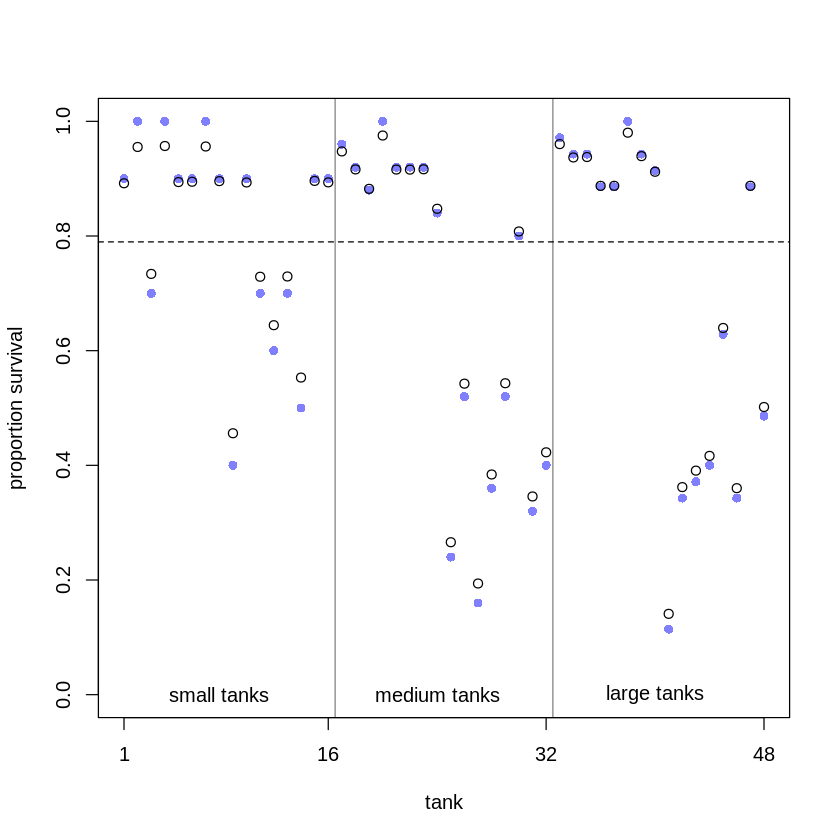

In [8]:
# extract Ulam (Stan) samples
post <- extract.samples(m13.2)

# compute median intercept for each tank
# also transform to probability with logistic
# d$propsurv.est <- logistic( apply( post$a , 2 , mean ) )
d$propsurv.est <- inv_logit( apply( post$a , 2 , mean ) )

# display raw proportions surviving in each tank
plot( d$propsurv , ylim=c(0,1) , pch=16 , xaxt="n" ,
xlab="tank" , ylab="proportion survival" , col=rangi2 )
axis( 1 , at=c(1,16,32,48) , labels=c(1,16,32,48) )

# overlay posterior means
points( d$propsurv.est )

# mark posterior mean probability across tanks
abline( h=mean(inv_logit(post$a_bar)) , lty=2 )

# draw vertical dividers between tank densities
abline( v=16.5 , lwd=0.5 )
abline( v=32.5 , lwd=0.5 )
text( 8 , 0 , "small tanks" )
text( 16+8 , 0 , "medium tanks" )
text( 32+8 , 0 , "large tanks" )

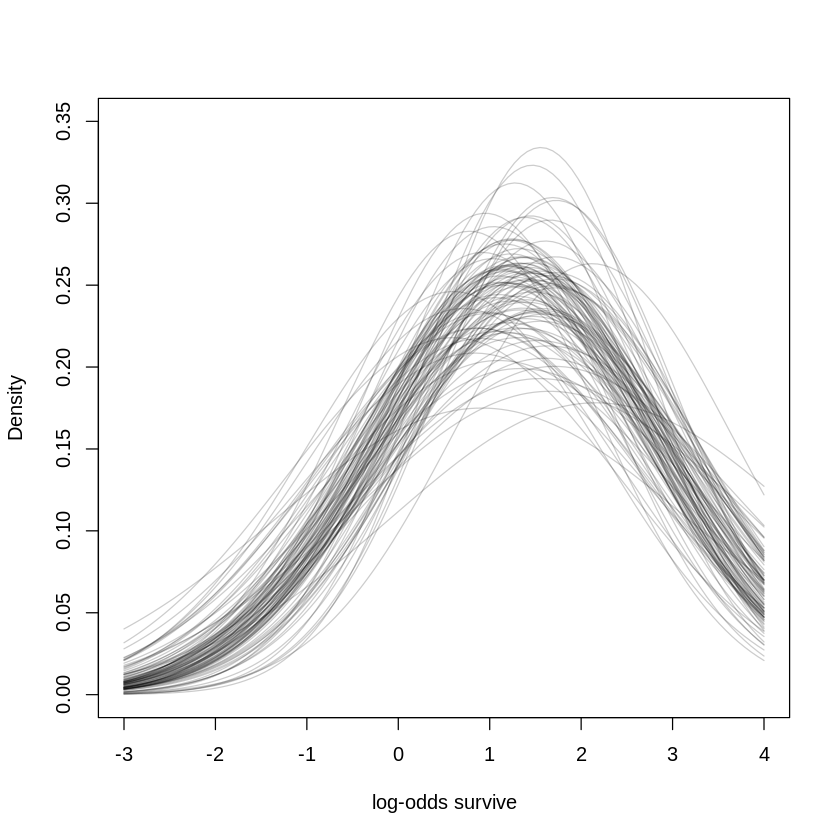

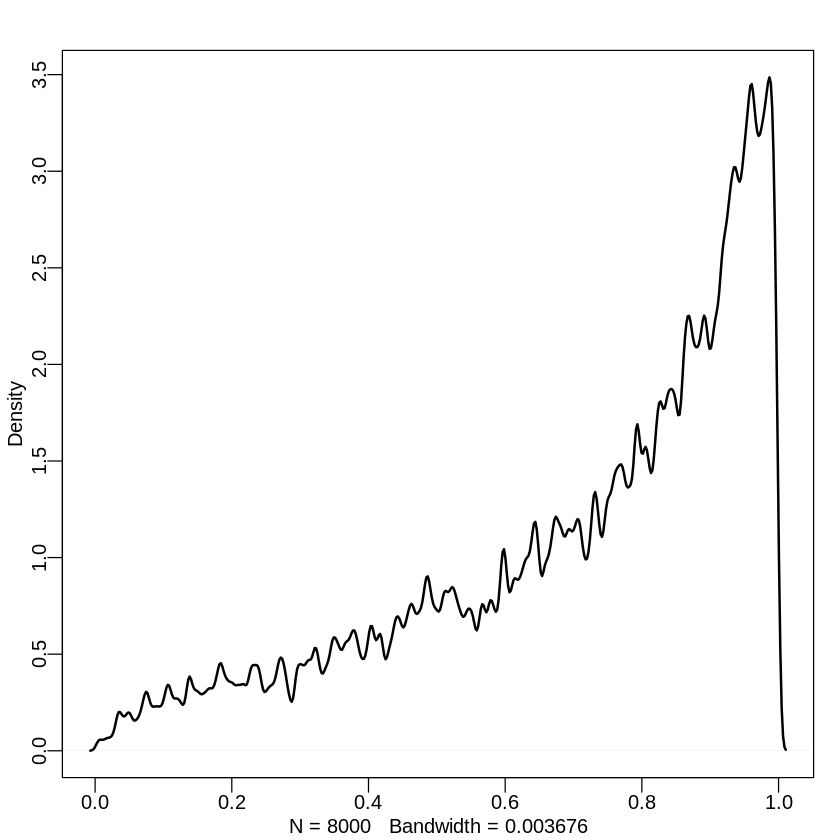

In [9]:
# show first 100 populations in the posterior
plot( NULL , xlim=c(-3,4) , ylim=c(0,0.35) ,
xlab="log-odds survive" , ylab="Density" )
for ( i in 1:100 )
curve( dnorm(x,post$a_bar[i],post$sigma[i]) , add=TRUE ,
col=col.alpha("black",0.2) )

# sample 8000 imaginary tanks from the posterior distribution
sim_tanks <- rnorm( 8000 , post$a_bar , post$sigma )
# transform to probability and visualize
dens( inv_logit(sim_tanks) , lwd=2 , adj=0.1 )

In [10]:
a_bar <- 1.5
sigma <- 1.5
nponds <- 60
Ni <- as.integer( rep( c(5,10,25,35) , each=15 ) )

In [11]:
set.seed(5005)
a_pond <- rnorm( nponds , mean=a_bar , sd=sigma )

In [12]:
dsim <- data.frame( pond=1:nponds , Ni=Ni , true_a=a_pond )

In [13]:
dsim$Si <- rbinom( nponds , prob=logistic(dsim$true_a) , size=dsim$Ni )
# dsim$Si <- rbinom( nponds , prob=inv_logit(dsim$true_a) , size=dsim$Ni )

In [14]:
dsim$p_nopool <- dsim$Si / dsim$Ni

In [15]:
dat <- list( Si=dsim$Si , Ni=dsim$Ni , pond=dsim$pond )

m13.3 <- ulam(
            alist(
                Si ~ dbinom( Ni , p ),
                logit(p) <- a_pond[pond],
                a_pond[pond] ~ dnorm( a_bar , sigma ),
                a_bar ~ dnorm( 0 , 1.5 ),
                sigma ~ dexp( 1 )
            ), data=dat , chains=3, cores=3 )

In [16]:
precis( m13.3 , depth=2 )

mean        sd        5.5%        94.5%      n_eff    Rhat     
a_pond[1]   1.65120418 1.0304315  0.11660158  3.4278921 2687.327 0.9991394
a_pond[2]   2.86912658 1.2618695  0.98803614  5.0146231 2628.705 0.9988357
a_pond[3]  -0.63515317 0.9165306 -2.16923999  0.8364399 1969.208 0.9987505
a_pond[4]   2.89712285 1.3556636  0.92821509  5.1472193 1690.262 1.0003438
a_pond[5]   2.87933503 1.2787226  1.03647799  5.0779457 1952.768 0.9984819
a_pond[6]   2.92359428 1.2440379  1.09696464  5.0397566 2091.655 0.9983115
a_pond[7]   0.05239305 0.8415479 -1.29184843  1.3764321 2837.823 0.9987630
a_pond[8]   2.90637710 1.2512277  1.16085883  4.9624297 2094.997 1.0001012
a_pond[9]   1.64325024 0.9889520  0.19435827  3.3290116 2810.213 0.9983614
a_pond[10]  1.64134830 1.0108178  0.15636467  3.3211365 2125.345 1.0015407
a_pond[11]  2.90986061 1.3374286  0.99588603  5.1440192 1923.596 0.9985782
a_pond[12]  0.07753190 0.8396004 -1.23270876  1.4175554 2302.722 0.9994239
a_pond[13]  2.88920786 1.2497107  1.06332077  5.0976659 2134.152 1.0002662
a_pond[14]  2.87557251 1.2608762  0.98554573  5.0744036 2099.790 0.9985053
a_pond[15]  2.88433755 1.2808264  1.05486063  5.0131536 2814.572 0.9983323
a_pond[16]  1.55521882 0.7674821  0.45392317  2.8324975 3942.516 0.9992309
a_pond[17] -1.43521360 0.7618628 -2.70661451 -0.3153177 2867.312 0.9985082
a_pond[18]  1.05766933 0.6729624  0.01127513  2.1387391 3711.322 0.9985661
a_pond[19] -0.94795355 0.6698477 -2.06340408  0.0661832 2751.746 0.9997166
a_pond[20]  1.55696183 0.7211628  0.47480744  2.7319959 2778.070 0.9996180
a_pond[21] -0.14789002 0.6408199 -1.16539980  0.8889937 3897.836 0.9984223
a_pond[22]  2.24242452 0.8736773  0.96990047  3.6879286 2549.000 1.0000270
a_pond[23]  3.27587037 1.1405212  1.64328340  5.2518759 2160.898 0.9997913
a_pond[24]  0.64676798 0.6264958 -0.33120188  1.6824099 2573.558 0.9995171
a_pond[25]  3.29591931 1.1817936  1.61032769  5.3656316 1827.293 0.9999730
a_pond[26]  2.25788039 0.9210127  0.96146240  3.9276024 2197.866 0.9983807
a_pond[27]  1.07980878 0.6711287  0.05861864  2.1716247 2578.147 0.9986228
a_pond[28]  2.24672158 0.8834345  0.94640291  3.7295499 2493.524 0.9998165
a_pond[29]  1.55773231 0.7221825  0.46253579  2.7798542 2894.238 0.9983928
a_pond[30]  1.05348126 0.6226258  0.12342146  2.0702763 2175.782 0.9992888
⋮          ⋮           ⋮         ⋮           ⋮          ⋮        ⋮        
a_pond[33]  1.73603876 0.5130916  0.94391829  2.5754293 2958.625 1.0002071
a_pond[34]  1.24656540 0.5026997  0.46164826  2.0823805 3203.170 0.9985563
a_pond[35]  0.67675223 0.4242427  0.01089569  1.3757707 3066.504 0.9990578
a_pond[36]  3.85438817 1.0951303  2.29311743  5.7630819 2508.059 0.9987704
a_pond[37] -0.99935065 0.4513595 -1.69611665 -0.2938012 2599.460 0.9984353
a_pond[38] -1.19029136 0.4396458 -1.90850093 -0.5322666 3469.285 0.9988511
a_pond[39]  0.65678357 0.4330344 -0.02065189  1.3644453 3145.139 0.9987664
a_pond[40]  3.83386633 1.0432721  2.36129850  5.6192255 1753.822 0.9996641
a_pond[41]  3.85354411 1.0834983  2.37523077  5.6625826 2190.405 0.9990047
a_pond[42]  2.46535905 0.7075821  1.40130775  3.6914146 2799.339 0.9994930
a_pond[43] -0.14265686 0.3980857 -0.76918799  0.4660145 3008.754 0.9986777
a_pond[44]  0.66663156 0.4040351  0.02671222  1.3300380 3273.303 0.9987419
a_pond[45] -1.20366870 0.4816514 -2.03063801 -0.4703128 2951.000 0.9993146
a_pond[46]  0.01261431 0.3353033 -0.52228954  0.5433624 2870.054 0.9987518
a_pond[47]  4.09510272 1.0285122  2.65799004  5.8492600 1464.639 1.0035067
a_pond[48]  2.09942718 0.5060877  1.30926913  2.9383676 3674.464 0.9982555
a_pond[49]  1.86242671 0.4871008  1.14191685  2.6909566 2926.439 0.9987400
a_pond[50]  2.78057994 0.6991970  1.77573197  3.9672525 2650.787 0.9997357
a_pond[51]  2.42558148 0.6161183  1.51649438  3.4275337 2355.622 0.9991623
a_pond[52]  0.34789918 0.3389638 -0.16924626  0.9272260 3115.358 0.9984426
a_pond[53]  2.09605571 0.5292483  1.31337582  2.9845950 2701.104 1.0000252
a_pond[54]  4.05633215 0.9892307  2.

Waiting to draw page 2 of 5
Waiting to draw page 3 of 5


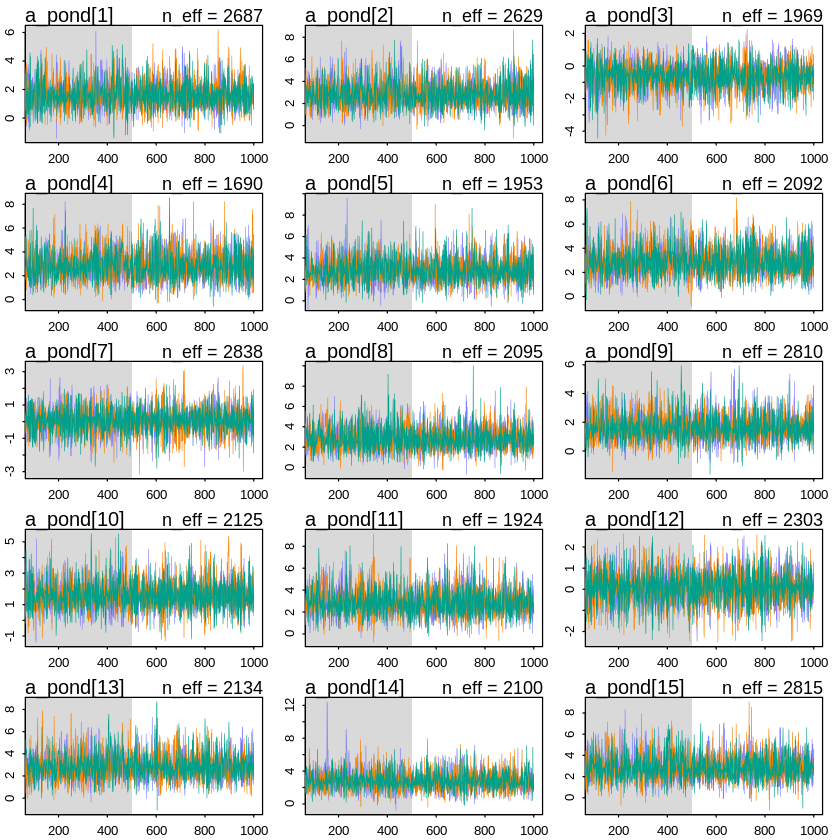

Waiting to draw page 4 of 5


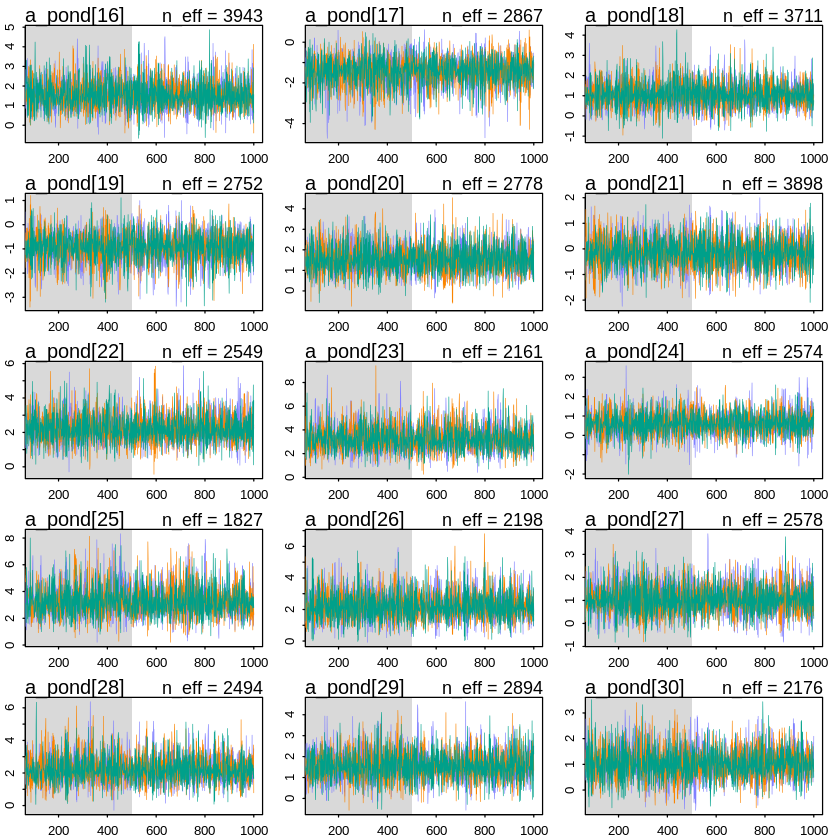

Waiting to draw page 5 of 5


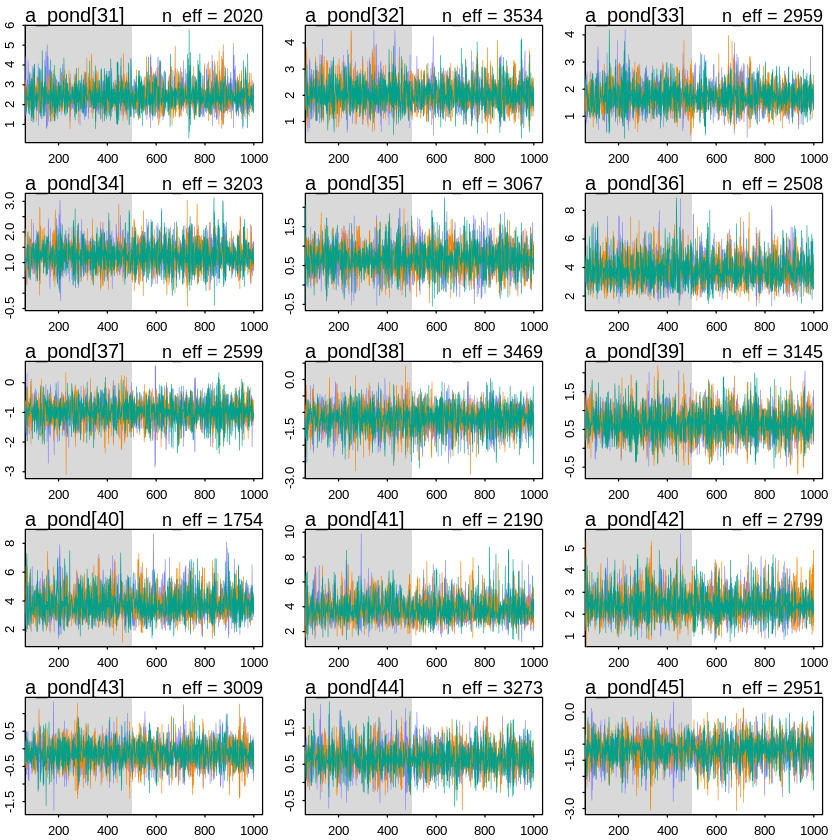

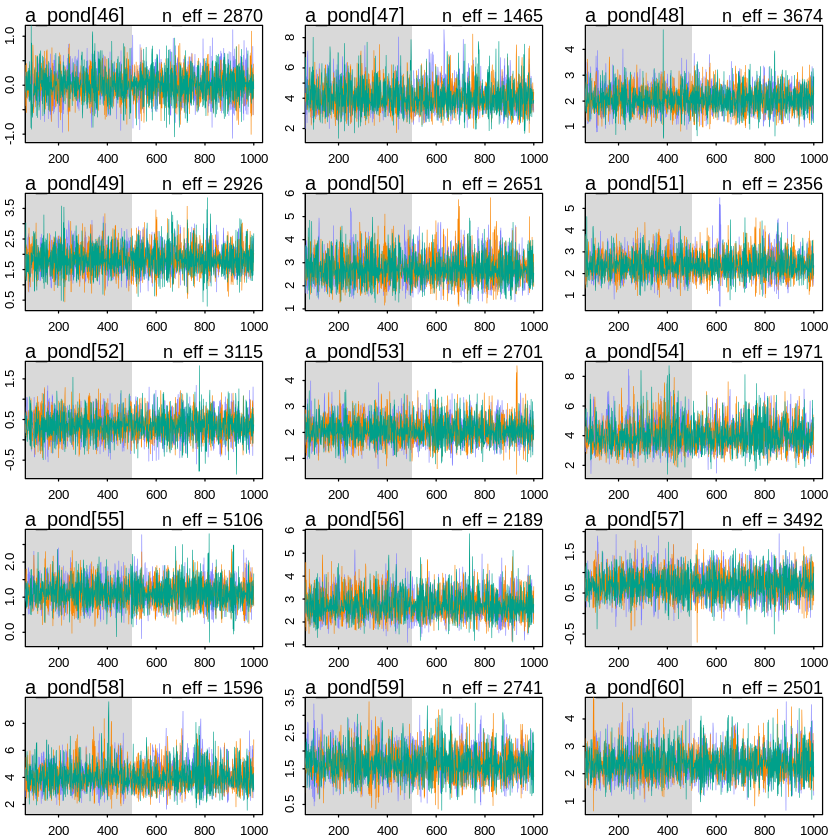

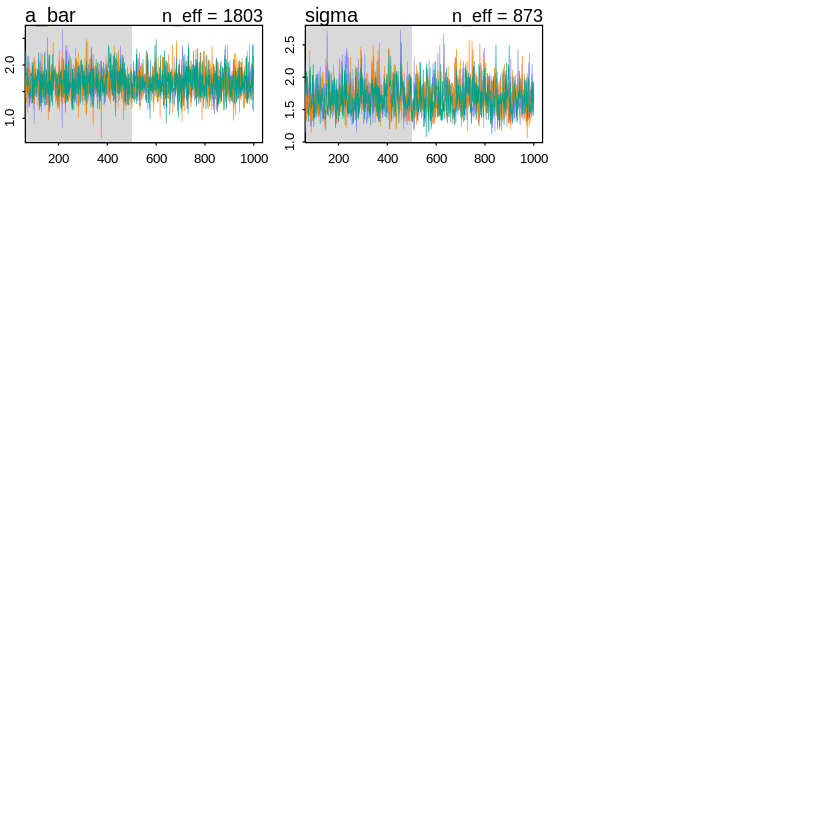

In [17]:
traceplot(m13.3)

In [18]:
post <- extract.samples( m13.3 )
dsim$p_partpool <- apply( inv_logit(post$a_pond) , 2 , mean )

In [19]:
dsim$p_true <- inv_logit( dsim$true_a )

In [20]:
nopool_error <- abs( dsim$p_nopool - dsim$p_true )
partpool_error <- abs( dsim$p_partpool - dsim$p_true )

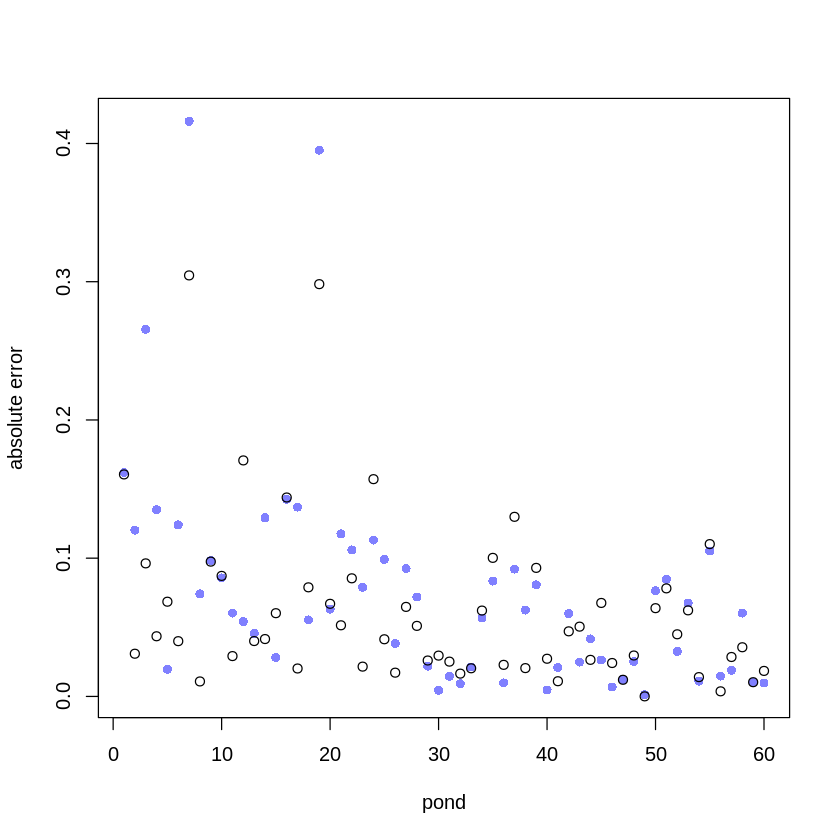

In [21]:
plot( 1:nponds , nopool_error , xlab="pond" , ylab="absolute error" ,
col=rangi2 , pch=16 )
points( 1:nponds , partpool_error )

In [22]:
nopool_avg <- aggregate(nopool_error,list(dsim$Ni),mean)
partpool_avg <- aggregate(partpool_error,list(dsim$Ni),mean)

In [23]:
data.frame(nopool_avg, partpool_avg)

Group.1 x          Group.1.1 x.1       
1  5      0.12122935  5        0.08543477
2 10      0.10245961 10        0.07691438
3 25      0.04057566 25        0.04803104
4 35      0.03583510 35        0.03571761

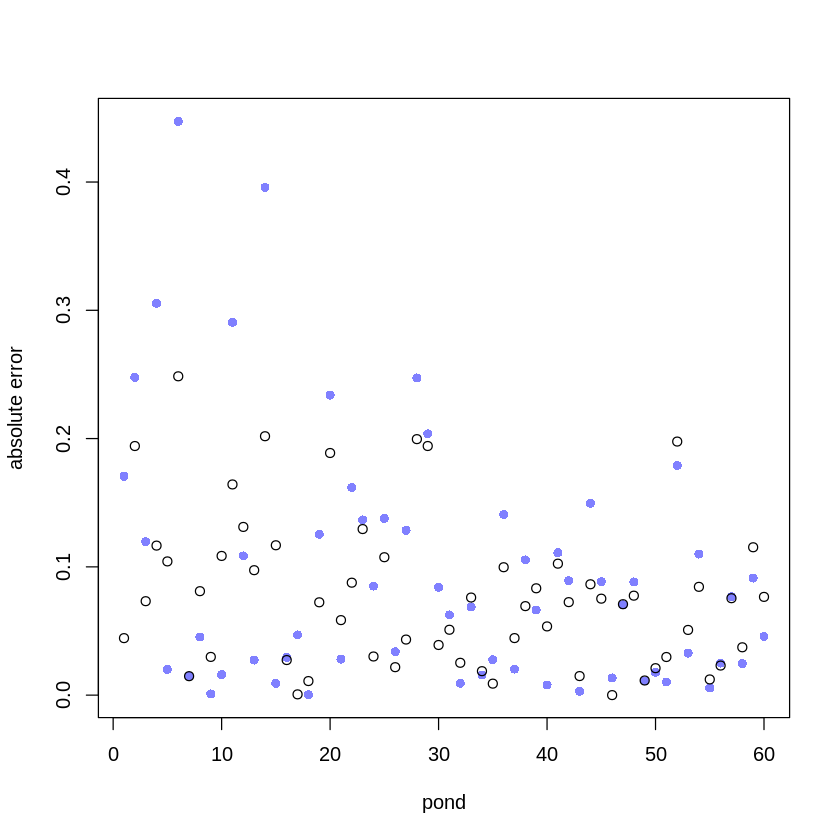

In [24]:
a <- 1.5
sigma <- 1.5
nponds <- 60
Ni <- as.integer( rep( c(5,10,25,35) , each=15 ) )

a_pond <- rnorm( nponds , mean=a , sd=sigma )
dsim <- data.frame( pond=1:nponds , Ni=Ni , true_a=a_pond )
dsim$Si <- rbinom( nponds,prob=inv_logit( dsim$true_a ),size=dsim$Ni )
dsim$p_nopool <- dsim$Si / dsim$Ni
newdat <- list(Si=dsim$Si,Ni=dsim$Ni,pond=1:nponds)

m13.3new <- stan( fit=m13.3@stanfit , data=newdat , chains=3, cores=3 )

post <- extract.samples( m13.3new )
dsim$p_partpool <- apply( inv_logit(post$a_pond) , 2 , mean )
dsim$p_true <- inv_logit( dsim$true_a )
nopool_error <- abs( dsim$p_nopool - dsim$p_true )
partpool_error <- abs( dsim$p_partpool - dsim$p_true )

plot( 1:nponds , nopool_error , xlab="pond" , ylab="absolute error" , col=rangi2 , pch=16 )
points( 1:nponds , partpool_error )

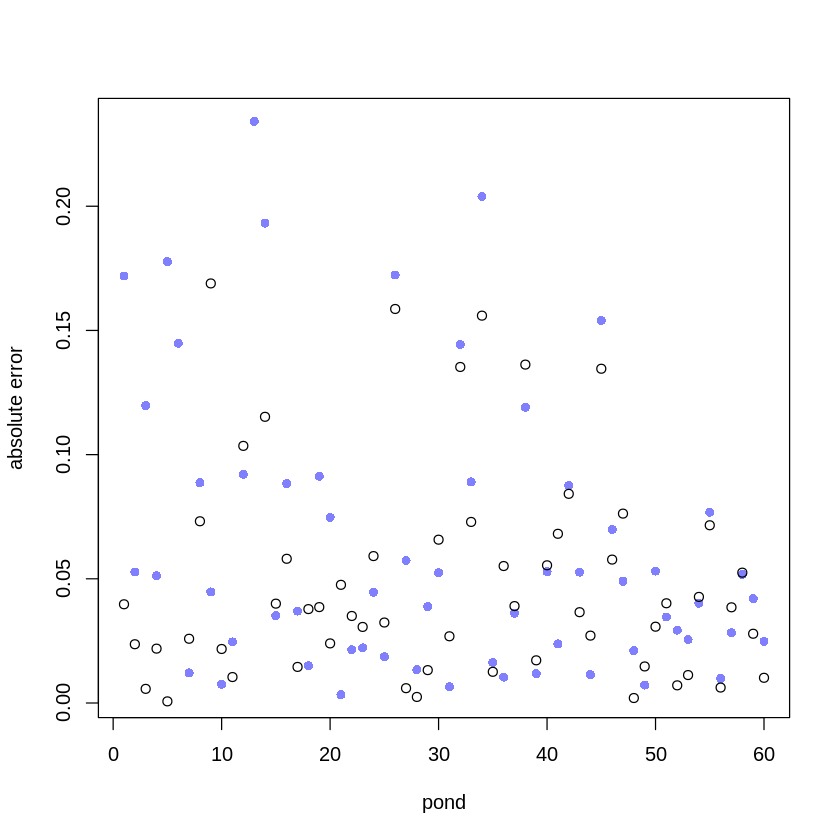

In [25]:
a <- 1.5
sigma <- 1.5
nponds <- 60
Ni <- as.integer( rep( c(5,10,25,35) , each=15 ) )

a_pond <- rnorm( nponds , mean=a , sd=sigma )
dsim <- data.frame( pond=1:nponds , Ni=Ni , true_a=a_pond )
dsim$Si <- rbinom( nponds,prob=inv_logit( dsim$true_a ),size=dsim$Ni )
dsim$p_nopool <- dsim$Si / dsim$Ni
newdat <- list(Si=dsim$Si,Ni=dsim$Ni,pond=1:nponds)

m13.3new <- stan( fit=m13.3@stanfit , data=newdat , chains=3, cores=3 )

post <- extract.samples( m13.3new )
dsim$p_partpool <- apply( inv_logit(post$a_pond) , 2 , mean )
dsim$p_true <- inv_logit( dsim$true_a )
nopool_error <- abs( dsim$p_nopool - dsim$p_true )
partpool_error <- abs( dsim$p_partpool - dsim$p_true )

plot( 1:nponds , nopool_error , xlab="pond" , ylab="absolute error" , col=rangi2 , pch=16 )
points( 1:nponds , partpool_error )

In [2]:
library(rethinking)
data(chimpanzees)
d <- chimpanzees

d$treatment <- 1 + d$prosoc_left + 2*d$condition

dat_list <- list(
                pulled_left = d$pulled_left,
                actor = d$actor,
                block_id = d$block,
                treatment = as.integer(d$treatment) )

set.seed(13)

m13.4 <- ulam(
            alist(
                pulled_left ~ dbinom( 1 , p ) ,
                logit(p) <- a[actor] + g[block_id] + b[treatment] ,
                b[treatment] ~ dnorm( 0 , 0.5 ),
                # adaptive priors
                a[actor] ~ dnorm( a_bar , sigma_a ),
                g[block_id] ~ dnorm( 0 , sigma_g ),
                # hyper-priors
                a_bar ~ dnorm( 0 , 1.5 ),
                sigma_a ~ dexp(1),
                sigma_g ~ dexp(1)
            ) , data=dat_list , chains=4 , cores=4 , log_lik=TRUE
#             , control=list(adapt_delta=0.99)
        )

Warning message:
“There were 18 divergent transitions after warmup. Increasing adapt_delta above 0.95 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

Waiting to draw page 2 of 2


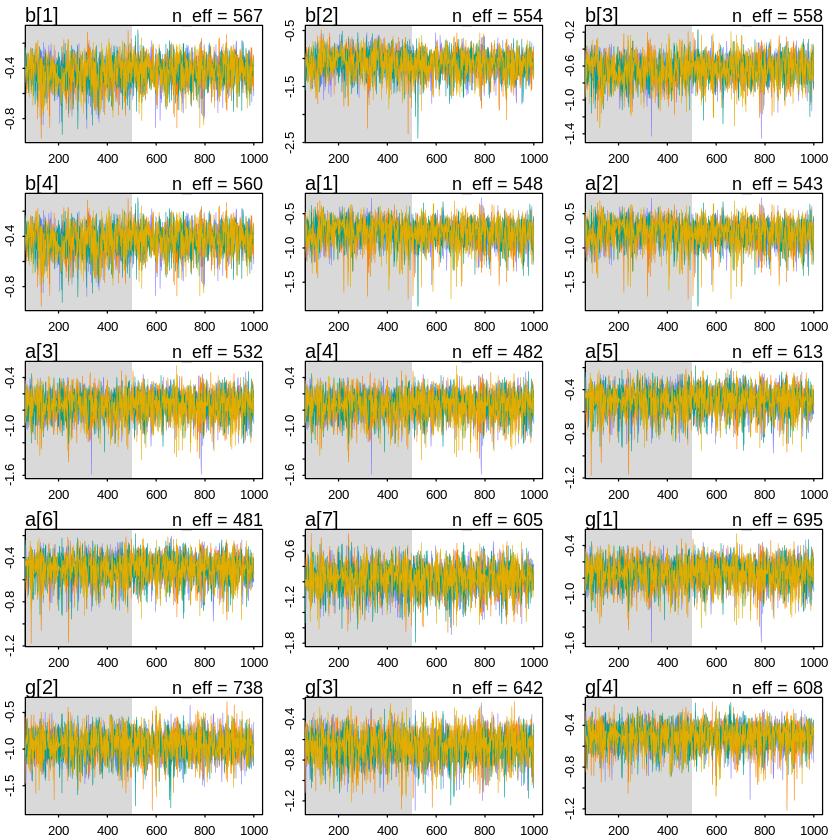

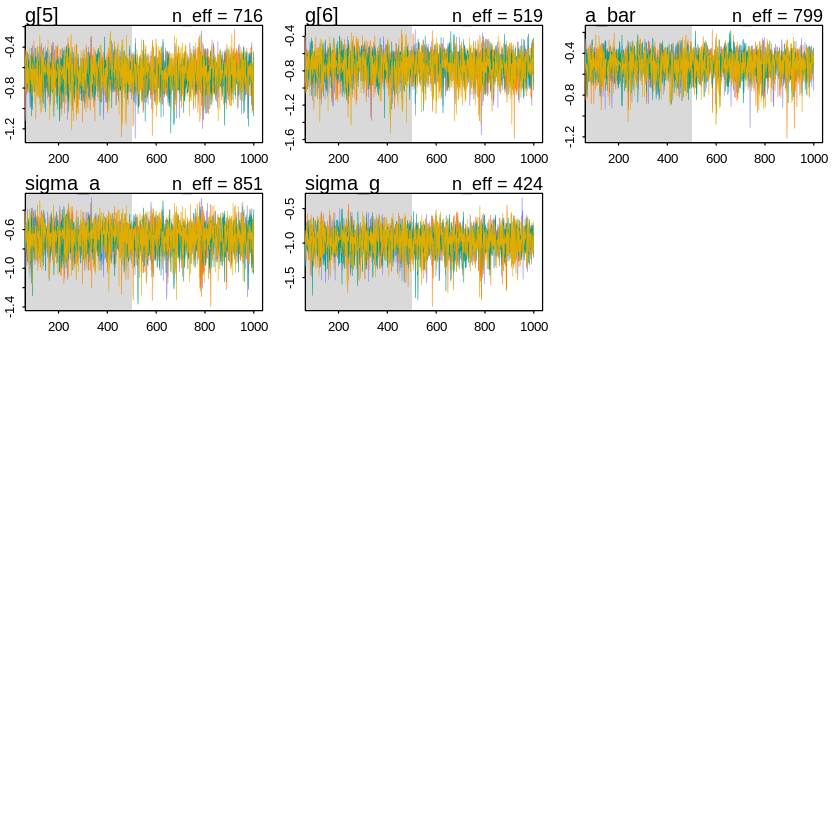

In [36]:
traceplot(m13.4)

mean        sd        5.5%        94.5%       n_eff    Rhat     
b[1]    -0.13573361 0.2903389 -0.58539561  0.34442516 567.2867 1.0049161
b[2]     0.38549608 0.3036437 -0.07370508  0.90633057 553.7388 1.0029199
b[3]    -0.48597583 0.2953764 -0.95842835 -0.01013355 557.9897 1.0043998
b[4]     0.26579607 0.2988552 -0.20037928  0.73804194 560.3435 1.0034726
a[1]    -0.36373647 0.3550971 -0.92452629  0.18943732 547.8234 1.0044214
a[2]     4.73251058 1.4254752  3.02855194  7.20115854 542.7133 1.0058413
a[3]    -0.65899368 0.3638165 -1.25594129 -0.07602941 532.4982 1.0025537
a[4]    -0.64780378 0.3741998 -1.26049008 -0.07340904 481.7827 1.0021878
a[5]    -0.34647991 0.3625964 -0.92942265  0.21521656 612.5580 1.0019546
a[6]     0.59195971 0.3641217  0.01031817  1.17153300 481.2097 1.0039439
a[7]     2.11119836 0.4673731  1.40265389  2.85460121 604.8386 1.0011518
g[1]    -0.18225359 0.2159440 -0.58640517  0.08274894 695.3178 1.0043758
g[2]     0.04144855 0.2012584 -0.24653116  0.38830762 737.7580 0.9996006
g[3]     0.07036836 0.2121676 -0.21622317  0.43467374 641.8727 1.0034736
g[4]     0.01503392 0.1891759 -0.26824169  0.31960553 607.6550 1.0065041
g[5]    -0.02666881 0.1927393 -0.33681665  0.27523247 715.6066 0.9988229
g[6]     0.13583205 0.2151271 -0.11670424  0.52867240 519.1692 1.0068834
a_bar    0.60361774 0.7207367 -0.53111415  1.75477877 799.0201 1.0033107
sigma_a  2.03411084 0.6753617  1.19893660  3.23902800 850.9842 1.0056925
sigma_g  0.23884127 0.1857819  0.04180946  0.55219495 423.9758 1.0117066

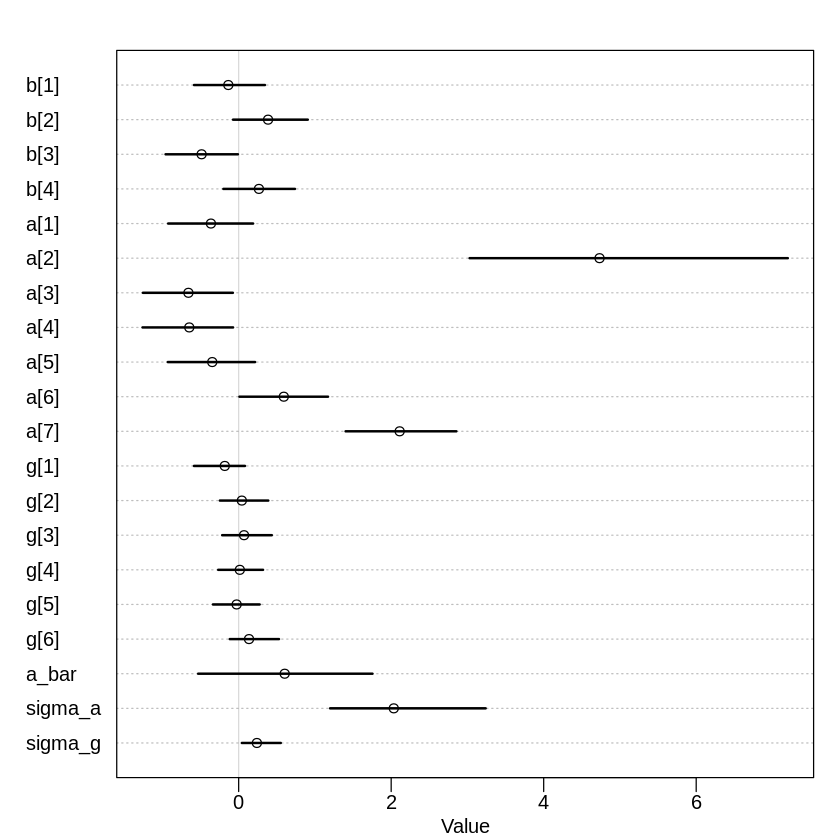

In [37]:
precis( m13.4 , depth=2 )
plot( precis(m13.4,depth=2) ) # also plot

In [38]:
set.seed(14)

m13.5 <- ulam(
            alist(
                pulled_left ~ dbinom( 1 , p ) ,
                logit(p) <- a[actor] + b[treatment] ,
                b[treatment] ~ dnorm( 0 , 0.5 ),
                a[actor] ~ dnorm( a_bar , sigma_a ),
                a_bar ~ dnorm( 0 , 1.5 ),
                sigma_a ~ dexp(1)
            ) , data=dat_list , chains=4 , cores=4 , log_lik=TRUE )

In [39]:
compare( m13.4 , m13.5 )

WAIC     pWAIC    dWAIC    weight  SE       dSE    
m13.5 531.2631  8.56021 0.000000 0.66569 19.25395      NA
m13.4 532.6406 10.96645 1.377511 0.33431 19.36820 1.88721

In [45]:
set.seed(15)

m13.6 <- ulam(
            alist(
                pulled_left ~ dbinom( 1 , p ) ,
                logit(p) <- a[actor] + g[block_id] + b[treatment] ,
                b[treatment] ~ dnorm( 0 , sigma_b ),
                a[actor] ~ dnorm( a_bar , sigma_a ),
                g[block_id] ~ dnorm( 0 , sigma_g ),
                a_bar ~ dnorm( 0 , 1.5 ),
                sigma_a ~ dexp(1),
                sigma_g ~ dexp(1),
                sigma_b ~ dexp(1)
            ) , data=dat_list , chains=4 , cores=4 , log_lik=TRUE
#                 , control=list(adapt_delta=0.99)
            )

coeftab(m13.4,m13.6)

recompiling to avoid crashing R session
Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.95 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

        m13.4   m13.6  
b[1]      -0.14   -0.11
b[2]       0.39    0.39
b[3]      -0.49   -0.43
b[4]       0.27    0.28
a[1]      -0.36   -0.36
a[2]       4.73    4.68
a[3]      -0.66   -0.67
a[4]      -0.65   -0.67
a[5]      -0.35   -0.36
a[6]       0.59    0.58
a[7]       2.11    2.09
g[1]      -0.18   -0.18
g[2]       0.04    0.04
g[3]       0.07    0.05
g[4]       0.02    0.00
g[5]      -0.03   -0.04
g[6]       0.14    0.10
a_bar      0.60    0.54
sigma_a    2.03    2.04
sigma_g    0.24    0.22
sigma_b      NA    0.58
nobs        504     504

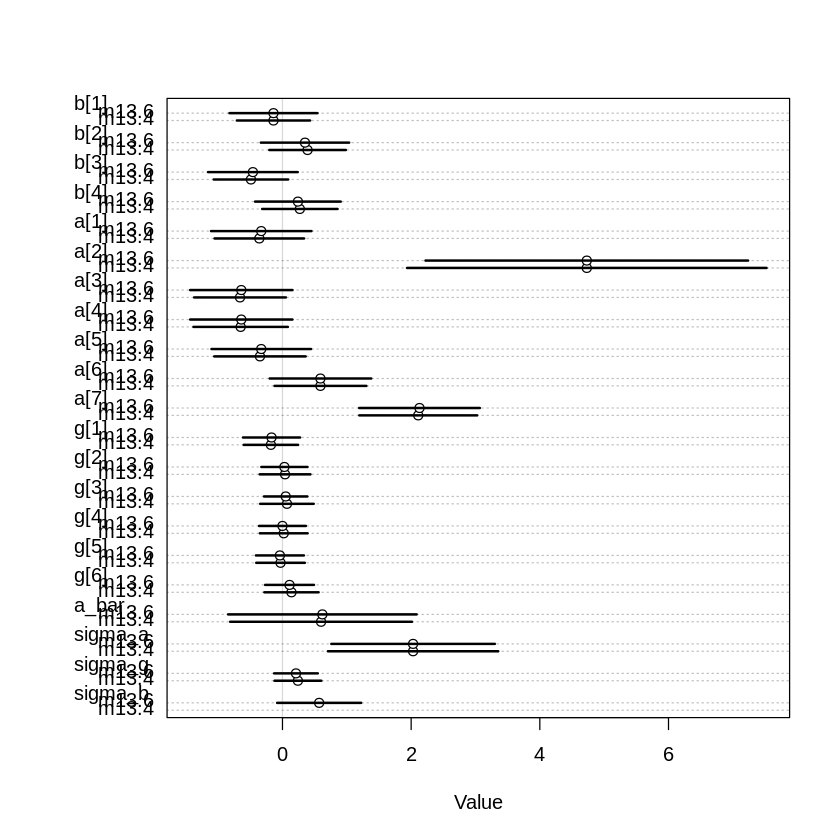

In [43]:
plot(coeftab(m13.4,m13.6))

In [47]:
divergent(m13.4)

[1] 2

In [48]:
set.seed(13)
m13.4b <- ulam( m13.4 , chains=4 , cores=4 , control=list(adapt_delta=0.99) )
divergent(m13.4b)

[1] 0

In [49]:
precis(m13.4b)

17 vector or matrix parameters hidden. Use depth=2 to show them.


mean      sd        5.5%        94.5%    n_eff    Rhat    
a_bar   0.6036177 0.7207367 -0.53111415 1.754779 799.0201 1.003311
sigma_a 2.0341108 0.6753617  1.19893660 3.239028 850.9842 1.005692
sigma_g 0.2388413 0.1857819  0.04180946 0.552195 423.9758 1.011707

In [50]:
set.seed(13)

m13.4nc <- ulam(
                alist(
                    pulled_left ~ dbinom( 1 , p ) ,
                    logit(p) <- a_bar + z[actor]*sigma_a + x[block_id]*sigma_g + b[treatment] ,
                    b[treatment] ~ dnorm( 0 , 0.5 ),
                    z[actor] ~ dnorm( 0 , 1 ),
                    x[block_id] ~ dnorm( 0 , 1 ),
                    a_bar ~ dnorm( 0 , 1.5 ),
                    sigma_a ~ dexp(1),
                    sigma_g ~ dexp(1)
                ) , data=dat_list , chains=4 , cores=4
                , log_lik=TRUE
                )

In [51]:
divergent(m13.4nc)

[1] 0

In [52]:
neff_c <- precis( m13.4 , depth=2 )[['n_eff']]
neff_nc <- precis( m13.4nc , depth=2 )[['n_eff']]
par_names <- rownames( precis( m13.4 , depth=2 ) )
neff_table <- cbind( neff_c , neff_nc )
rownames(neff_table) <- par_names
round(t(neff_table))

b[1] b[2] b[3] b[4] a[1] a[2] a[3] a[4] a[5] a[6] a[7] g[1] g[2] g[3]
neff_c   434  457  401  420 438  719  410  430  432  434  618   582  975  865
neff_nc 1168 1165 1261 1215 427  897  423  428  426  463  688  1677 2088 1975
        g[4] g[5] g[6] a_bar sigma_a sigma_g
neff_c   865 1061  509 943   883      224   
neff_nc 2046 1706 1778 448   587     1022

In [17]:
# chimp <- 2
# d_pred <- list(
#             actor = rep(chimp,4),
#             treatment = 1:4,
#             block_id = rep(1,4)
#             )


d_pred <- list( actor=rep(1:7,each=4) , treatment=rep(1:4,times=7), block_id = rep(1,28) )

p <- link( m13.4 , data=d_pred )
p_mu <- apply( p , 2 , mean )
p_ci <- apply( p , 2 , PI )

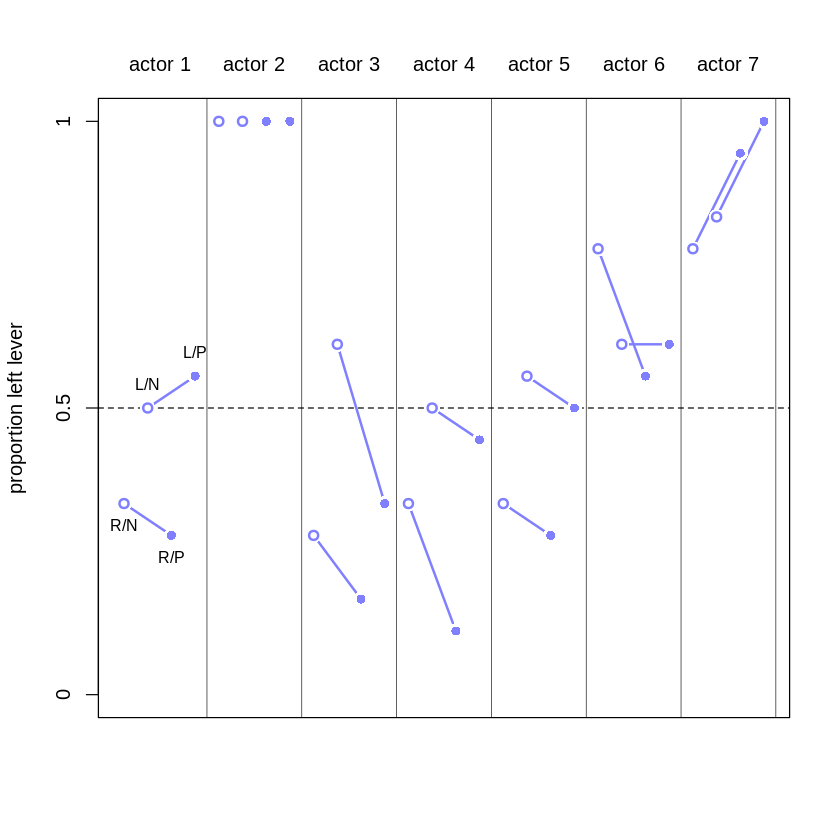

In [11]:
pl <- by( d$pulled_left , list( d$actor , d$treatment ) , mean )

plot( NULL , xlim=c(1,28) , ylim=c(0,1) , xlab="" ,
ylab="proportion left lever" , xaxt="n" , yaxt="n" )
axis( 2 , at=c(0,0.5,1) , labels=c(0,0.5,1) )
abline( h=0.5 , lty=2 )
for ( j in 1:7 ) abline( v=(j-1)*4+4.5 , lwd=0.5 )
for ( j in 1:7 ) text( (j-1)*4+2.5 , 1.1 , concat("actor ",j) , xpd=TRUE )
for ( j in (1:7)[-2] ) {
lines( (j-1)*4+c(1,3) , pl[j,c(1,3)] , lwd=2 , col=rangi2 )
lines( (j-1)*4+c(2,4) , pl[j,c(2,4)] , lwd=2 , col=rangi2 )
}
points( 1:28 , t(pl) , pch=16 , col="white" , cex=1.7 )
points( 1:28 , t(pl) , pch=c(1,1,16,16) , col=rangi2 , lwd=2 )
yoff <- 0.01
text( 1 , pl[1,1]-yoff , "R/N" , pos=1 , cex=0.8 )
text( 2 , pl[1,2]+yoff , "L/N" , pos=3 , cex=0.8 )
text( 3 , pl[1,3]-yoff , "R/P" , pos=1 , cex=0.8 )
text( 4 , pl[1,4]+yoff , "L/P" , pos=3 , cex=0.8 )
# mtext( "observed proportions\n" )

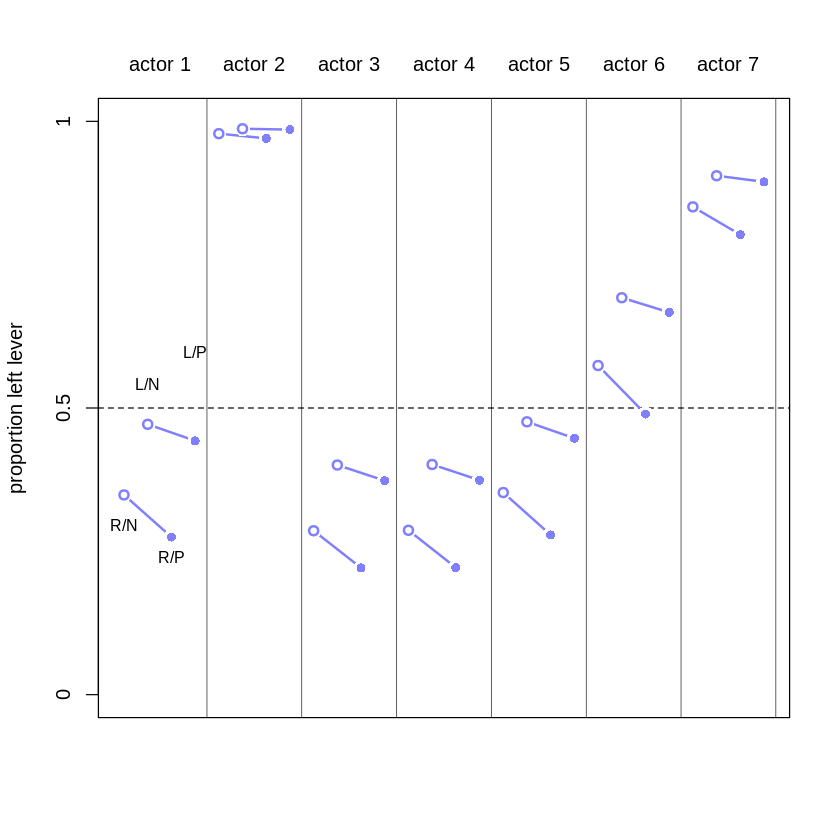

In [18]:
plot( NULL , xlim=c(1,28) , ylim=c(0,1) , xlab="" ,
ylab="proportion left lever" , xaxt="n" , yaxt="n" )
axis( 2 , at=c(0,0.5,1) , labels=c(0,0.5,1) )
abline( h=0.5 , lty=2 )
for ( j in 1:7 ) abline( v=(j-1)*4+4.5 , lwd=0.5 )
for ( j in 1:7 ) text( (j-1)*4+2.5 , 1.1 , concat("actor ",j) , xpd=TRUE )
for ( j in (1:7) ) {
    lines( (j-1)*4+c(1,3) , p_mu[4*(j-1)+c(1,3)] , lwd=2 , col=rangi2 )
    lines( (j-1)*4+c(2,4) , p_mu[4*(j-1)+c(2,4)] , lwd=2 , col=rangi2 )
}
points( 1:28 , t(p_mu) , pch=16 , col="white" , cex=1.7 )
points( 1:28 , t(p_mu) , pch=c(1,1,16,16) , col=rangi2 , lwd=2 )
yoff <- 0.01
text( 1 , pl[1,1]-yoff , "R/N" , pos=1 , cex=0.8 )
text( 2 , pl[1,2]+yoff , "L/N" , pos=3 , cex=0.8 )
text( 3 , pl[1,3]-yoff , "R/P" , pos=1 , cex=0.8 )
text( 4 , pl[1,4]+yoff , "L/P" , pos=3 , cex=0.8 )
#mtext( "predicted proportions\n" )

In [35]:
post <- extract.samples(m13.4)
str(post)

List of 6
 $ b      : num [1:2000, 1:4] -0.0437 0.0256 0.169 0.2031 0.1274 ...
 $ a      : num [1:2000, 1:7] -0.226 -0.25 -0.229 -0.103 -0.446 ...
 $ g      : num [1:2000, 1:6] -0.0286 -0.3852 -0.3023 -0.1308 -0.1363 ...
 $ a_bar  : num [1:2000(1d)] 0.723 1.321 0.241 0.294 1.037 ...
 $ sigma_a: num [1:2000(1d)] 2.83 3.6 2.01 1.88 1.3 ...
 $ sigma_g: num [1:2000(1d)] 0.0384 0.2269 0.194 0.1205 0.1289 ...
 - attr(*, "source")= chr "ulam posterior: 2000 samples from m13.4"


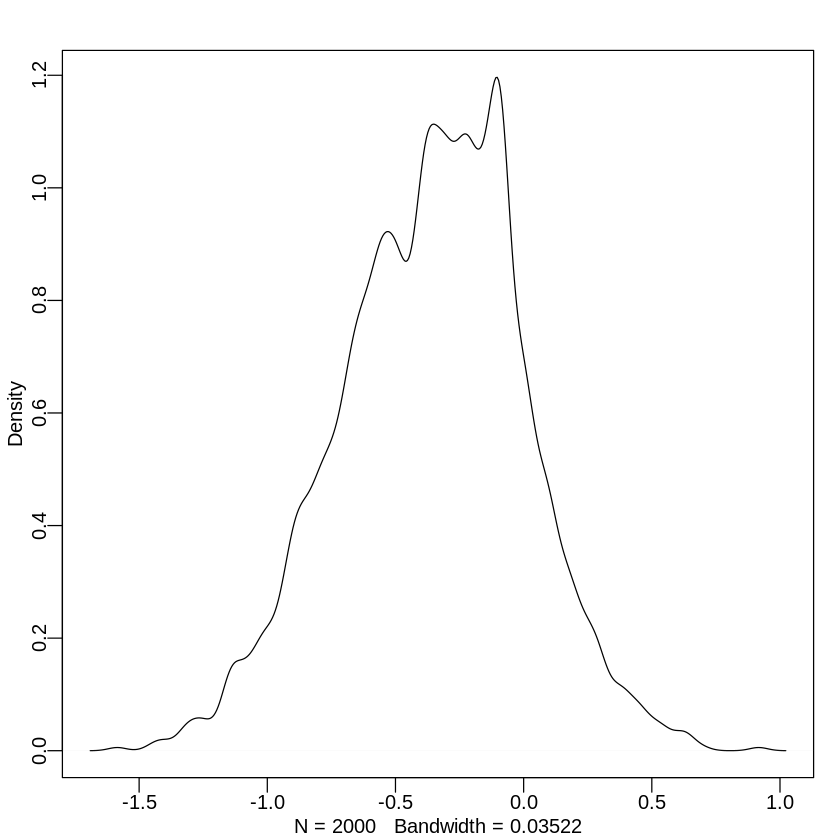

In [36]:
dens( post$a[,5] )

In [38]:
p_link <- function( treatment , actor=1 , block_id=1 ) {
                logodds <- with( post ,
                                    a[,actor] + g[,block_id] + b[,treatment] )
                return( inv_logit(logodds) )
            }

In [44]:
p_raw <- sapply( 1:28 , function(i) p_link( 1+((i-1)%%4) , actor=1+((i-1)%/%4) , block_id=1 ) )
p_mu <- apply( p_raw , 2 , mean )
p_ci <- apply( p_raw , 2 , PI )

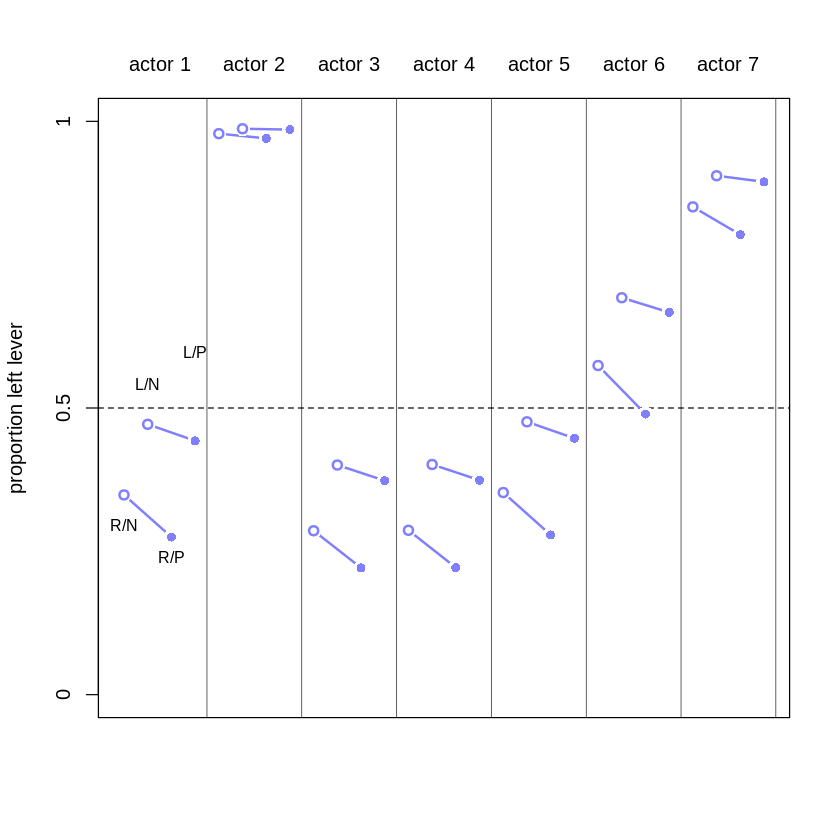

In [45]:
plot( NULL , xlim=c(1,28) , ylim=c(0,1) , xlab="" ,
ylab="proportion left lever" , xaxt="n" , yaxt="n" )
axis( 2 , at=c(0,0.5,1) , labels=c(0,0.5,1) )
abline( h=0.5 , lty=2 )
for ( j in 1:7 ) abline( v=(j-1)*4+4.5 , lwd=0.5 )
for ( j in 1:7 ) text( (j-1)*4+2.5 , 1.1 , concat("actor ",j) , xpd=TRUE )
for ( j in (1:7) ) {
    lines( (j-1)*4+c(1,3) , p_mu[4*(j-1)+c(1,3)] , lwd=2 , col=rangi2 )
    lines( (j-1)*4+c(2,4) , p_mu[4*(j-1)+c(2,4)] , lwd=2 , col=rangi2 )
}
points( 1:28 , t(p_mu) , pch=16 , col="white" , cex=1.7 )
points( 1:28 , t(p_mu) , pch=c(1,1,16,16) , col=rangi2 , lwd=2 )
yoff <- 0.01
text( 1 , pl[1,1]-yoff , "R/N" , pos=1 , cex=0.8 )
text( 2 , pl[1,2]+yoff , "L/N" , pos=3 , cex=0.8 )
text( 3 , pl[1,3]-yoff , "R/P" , pos=1 , cex=0.8 )
text( 4 , pl[1,4]+yoff , "L/P" , pos=3 , cex=0.8 )
#mtext( "predicted proportions\n" )

In [46]:
p_link_abar <- function( treatment ) {
                                        logodds <- with( post , a_bar + b[,treatment] )
                                        return( inv_logit(logodds) )
                                        }

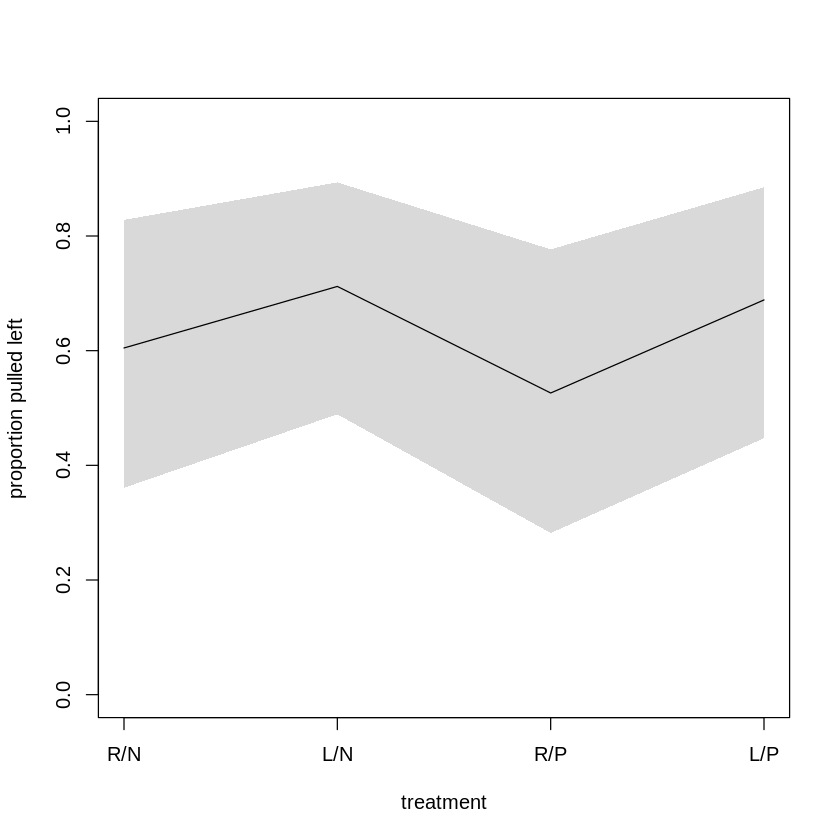

In [49]:
p_raw <- sapply( 1:4 , function(i) p_link_abar( i ) )
p_mu <- apply( p_raw , 2 , mean )
p_ci <- apply( p_raw , 2 , PI )

plot( NULL , xlab="treatment" , ylab="proportion pulled left" ,
            ylim=c(0,1) , xaxt="n" , xlim=c(1,4) )
axis( 1 , at=1:4 , labels=c("R/N","L/N","R/P","L/P") )
lines( 1:4 , p_mu )
shade( p_ci , 1:4 )

In [53]:
a_sim <- with( post , rnorm( length(post$a_bar) , a_bar , sigma_a ) )

p_link_asim <- function( treatment ) {
                    logodds <- with( post , a_sim + b[,treatment] )
                    return( inv_logit(logodds) )
                }

p_raw_asim <- sapply( 1:4 , function(i) p_link_asim( i ) )
        
p_mu <- apply( p_raw_asim , 2 , mean )
p_ci <- apply( p_raw_asim , 2 , PI )

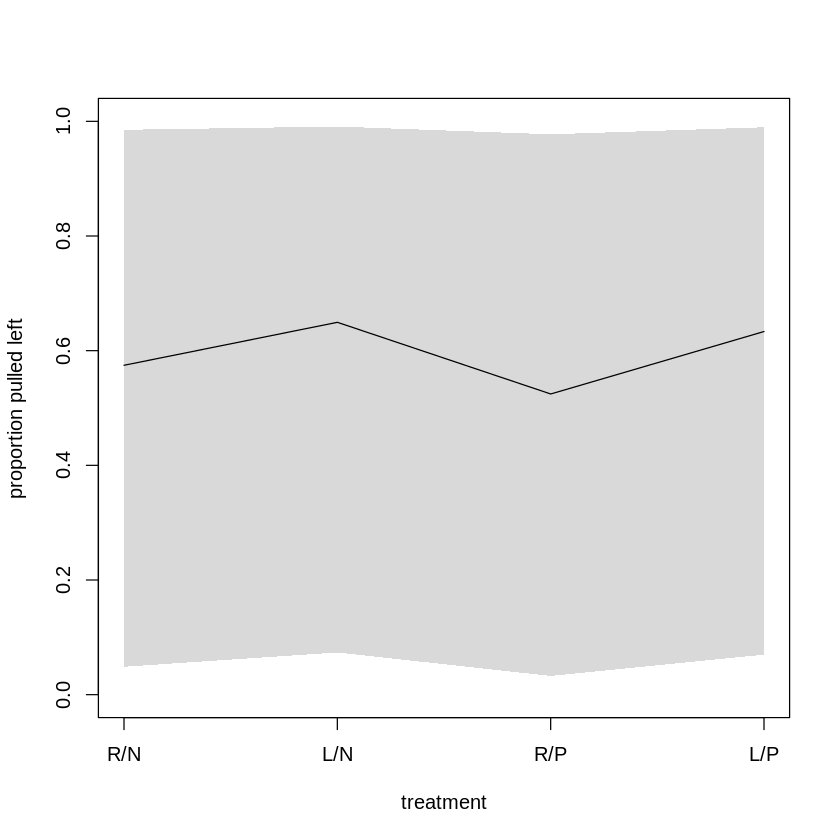

In [54]:
plot( NULL , xlab="treatment" , ylab="proportion pulled left" ,
ylim=c(0,1) , xaxt="n" , xlim=c(1,4) )
axis( 1 , at=1:4 , labels=c("R/N","L/N","R/P","L/P") )
lines( 1:4 , p_mu )
shade( p_ci , 1:4 )

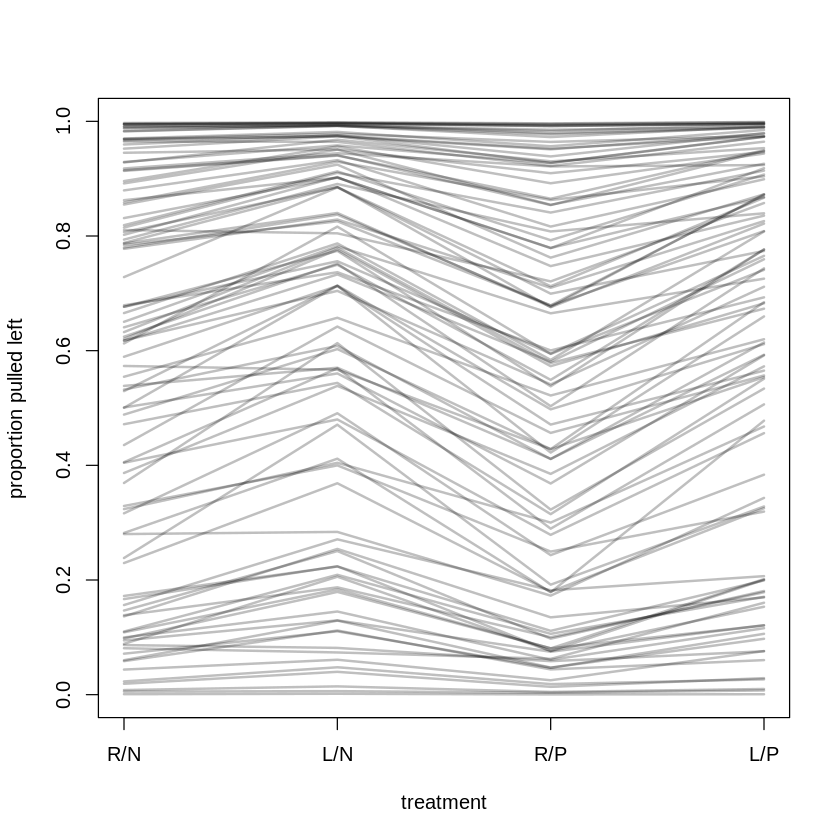

In [60]:
plot( NULL , xlab="treatment" , ylab="proportion pulled left" ,
    ylim=c(0,1) , xaxt="n" , xlim=c(1,4) )

axis( 1 , at=1:4 , labels=c("R/N","L/N","R/P","L/P") )
for ( i in 1:100 ) lines( 1:4 , p_raw_asim[i,] , col=col.alpha("black",0.25) , lwd=2 )

PRACTICE

12E1

<s>b will produce more shrinkage, because the prior standard deviation is larger, reflecting a greater uncertainty (less confidence) in the data from that alpha_tank.  This means that the model will allow the estimate for alpha to be shrunk more towards the average population of tanks, rather than believe in the data for that specific tank.</s>

Note that my initial opinion differs from that in https://github.com/jffist/statistical-rethinking-solutions/blob/master/ch12_hw.R:

"First one, as it is more 'regularising'(narrow because of lower sigma), thus I expect it forces estimates to be shifted to the mean more than the second option. 
 It results in stronger shrinkage."

Thinking about it, I think this explanation is correct, and my initial opinion was wrong.  The prior for alpha_tank is centered on 0, so a smaller sd will reduce the possibility of overfitting to the sample data for the specific tank.  Hence, the estimates in a multi-level model will be shrunk more towards the average population of tanks.

12E2

Note that the intercept is the case (cluster?) specific value, and we create and estimate an additional distribution for the population of a[i].  HOWEVER, we do not create a hyper-prior for beta, because beta already IS a population specific parameter!

Note also that we use the fixed effects model's standard deviation for prior a[i] (=10) to create the parameter for sigma in an exponential distribution (1/10), because an Exp(lambda) distribution has a mean of 1/lambda.

12E3

12E4

12E5

12M1

Note that this question is Question 1 in the Homework for Week 8, so the author's solutions are available there.

In [1]:
library(rethinking)
options(mc.cores = parallel::detectCores())
data(reedfrogs)
d <- reedfrogs
head(d)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
rethinking (Version 1.88)


density pred size  surv propsurv
1 10      no   big    9   0.9     
2 10      no   big   10   1.0     
3 10      no   big    7   0.7     
4 10      no   big   10   1.0     
5 10      no   small  9   0.9     
6 10      no   small  9   0.9

In [2]:
# make the tank cluster variable
d$tank <- 1:nrow(d)
d$P <- as.integer(d$pred)                 # "no" = 1, "pred" = 2
d$sz <- ifelse(d$size=="small",1L, 2L)      # "small" = 1, "big" = 2

dat <- list(
            S = d$surv,
            N = d$density,
            tank = d$tank,
            P = d$P,
            sz = d$sz,
            k = as.integer(2*(d$sz-1) + d$P)
        )

In [31]:
m12M1 <- ulam(
            alist(
                S ~ dbinom( N , p ) ,
                logit(p) <- a[tank] ,
                a[tank] ~ dnorm( a_bar , sigma_a ) ,
                a_bar ~ dnorm( 0 , 1.5 ) ,
                sigma_a ~ dexp( 1 )
            ), data=dat , chains=4 , cores=4, log_lik=TRUE )

In [5]:
m12M1_P <- ulam(
            alist(
                S ~ dbinom( N , p ) ,
                logit(p) <- a[tank] + b[P] ,
                a[tank] ~ dnorm( a_bar , sigma_a ) ,
                a_bar ~ dnorm( 0 , 1.5 ) ,
                sigma_a ~ dexp( 1 ) ,
                b[P] ~ dnorm( 0 , sigma_P) ,
                sigma_P ~ dexp( 1 )
            ), data=dat , chains=4 , cores=4, log_lik=TRUE )

In [9]:
m12M1_sz <- ulam(
            alist(
                S ~ dbinom( N , p ) ,
                logit(p) <- a[tank] + c[sz] ,
                a[tank] ~ dnorm( a_bar , sigma_a ) ,
                a_bar ~ dnorm( 0 , 1.5 ) ,
                sigma_a ~ dexp( 1 ) ,
                c[sz] ~ dnorm( 0 , sigma_sz) ,
                sigma_sz ~ dexp( 1 )
            ), data=dat , chains=4 , cores=4, log_lik=TRUE 
            , control=list(adapt_delta=0.99)
            )

Warning message:
“There were 36 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

In [10]:
m12M1_szP <- ulam(
            alist(
                S ~ dbinom( N , p ) ,
                logit(p) <- a[tank] + b[P] + c[sz] ,
                a[tank] ~ dnorm( a_bar , sigma_a ) ,
                a_bar ~ dnorm( 0 , 1.5 ) ,
                sigma_a ~ dexp( 1 ) ,
                b[P] ~ dnorm( 0 , sigma_P) ,
                sigma_P ~ dexp( 1 ) ,
                c[sz] ~ dnorm( 0 , sigma_sz) ,
                sigma_sz ~ dexp( 1 )
            ), data=dat , chains=4 , cores=4, log_lik=TRUE 
#             , control=list(adapt_delta=0.99)
            )

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.95 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

In [3]:
m12M1_int <- ulam(
            alist(
                S ~ dbinom( N , p ) ,
                logit(p) <- a[tank] + b[P] + c[sz] + d[k],
                a[tank] ~ dnorm( a_bar , sigma_a ) ,
                a_bar ~ dnorm( 0 , 1.5 ) ,
                sigma_a ~ dexp( 1 ) ,
                b[P] ~ dnorm( 0 , sigma_P) ,
                sigma_P ~ dexp( 1 ) ,
                c[sz] ~ dnorm( 0 , sigma_sz) ,
                sigma_sz ~ dexp( 1 ) ,
                d[k] ~ dnorm( 0, sigma_szP) ,
                sigma_szP ~ dexp(0.5)
            ), data=dat , chains=4 , cores=4, log_lik=TRUE 
#             , control=list(adapt_delta=0.99)
            )

Warning message:
“There were 11 divergent transitions after warmup. Increasing adapt_delta above 0.95 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

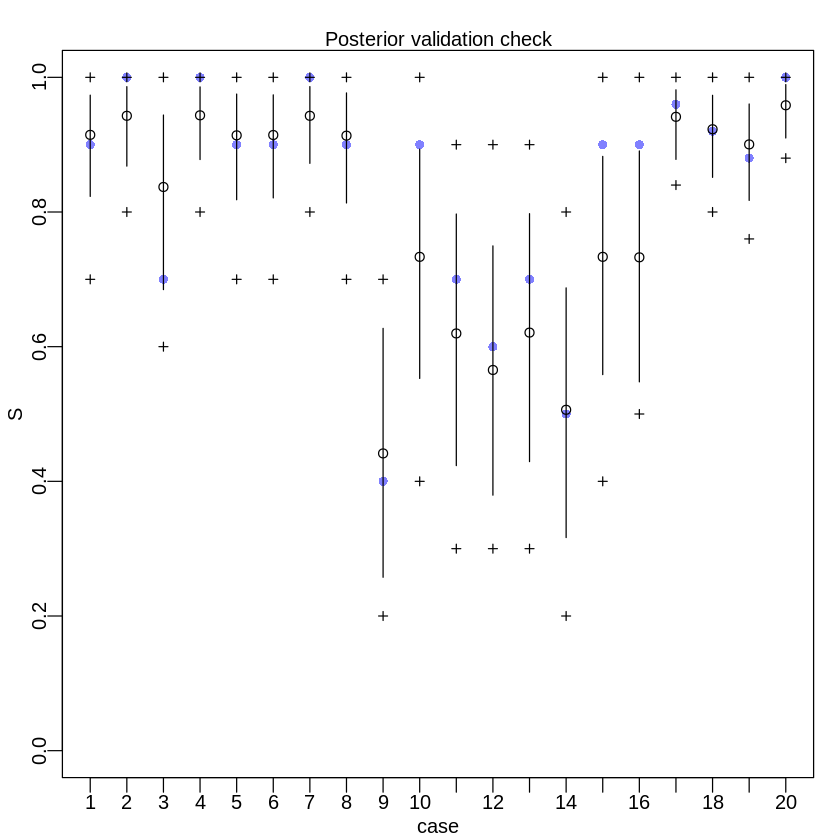

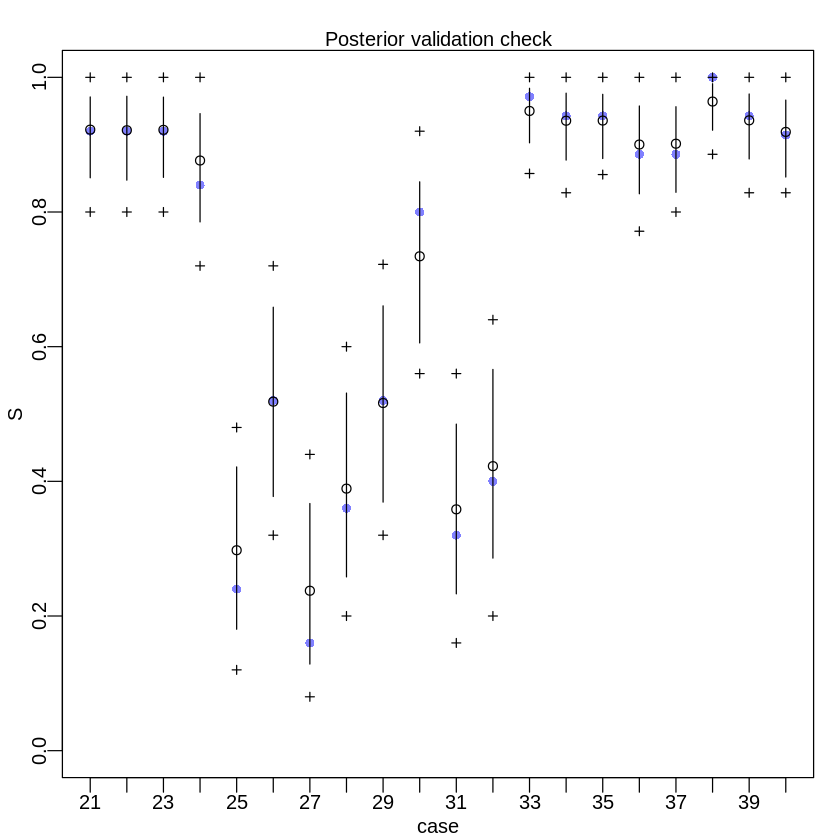

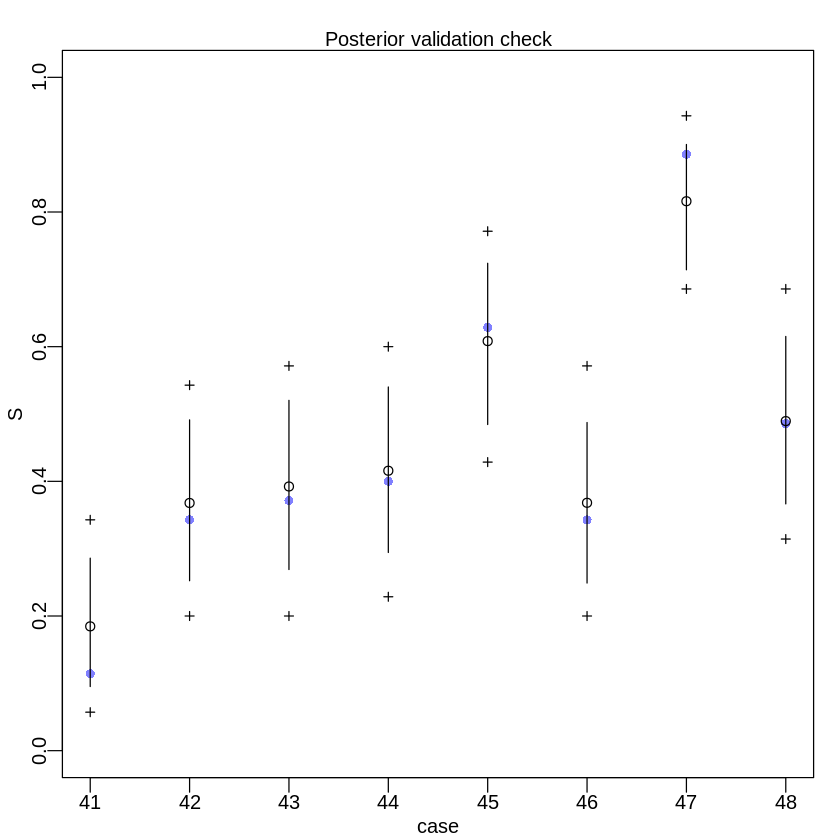

In [29]:
postcheck(m12M1_P)

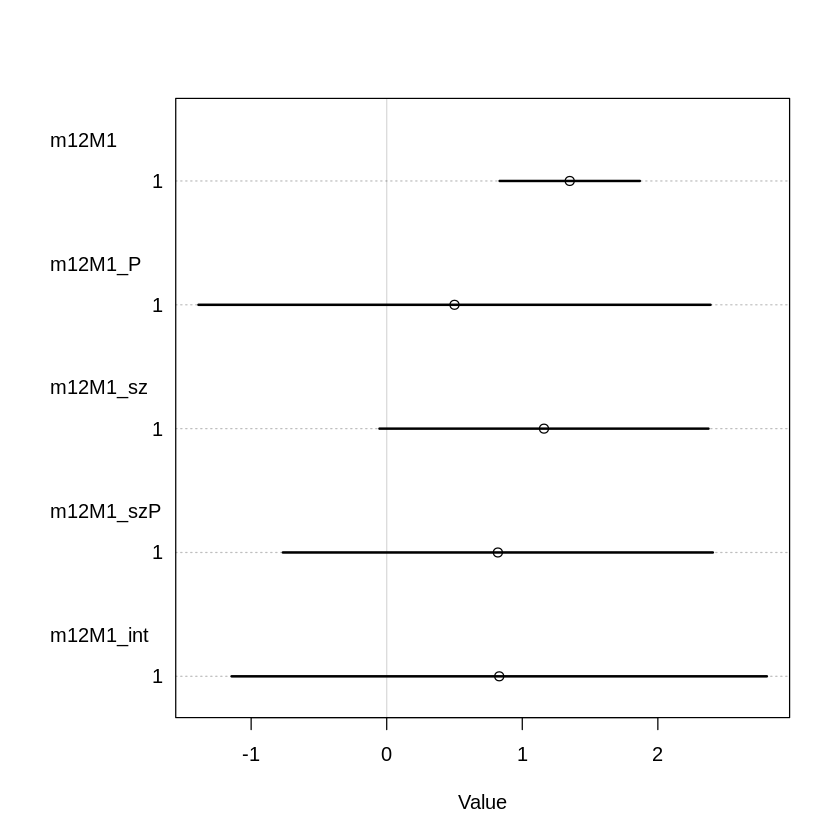

In [35]:
plot(coeftab(m12M1, m12M1_P, m12M1_sz, m12M1_szP, m12M1_int), pars="a_bar")

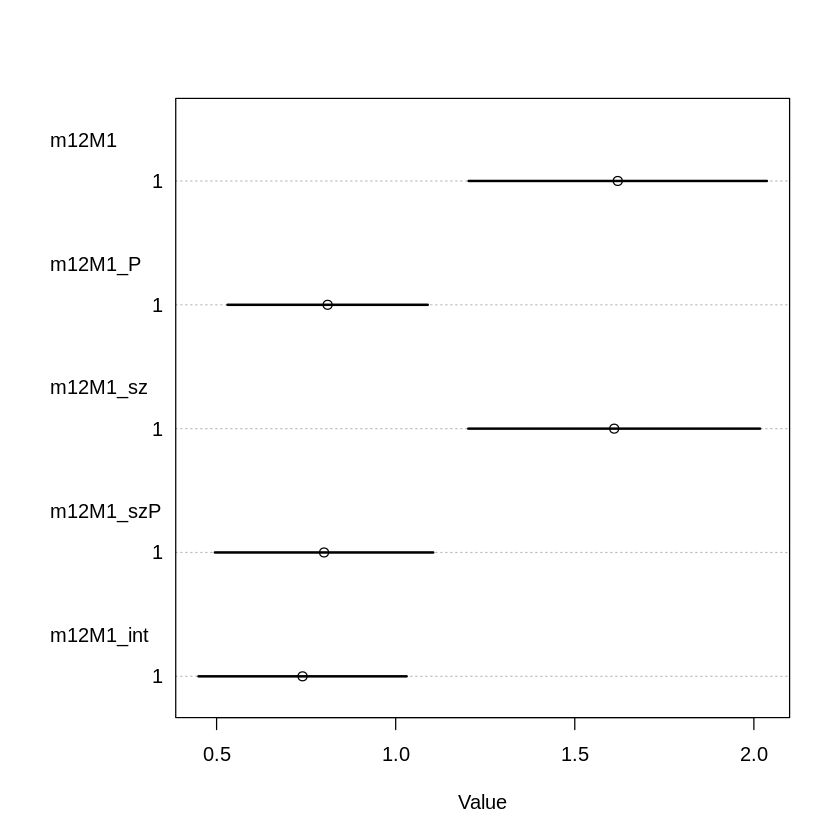

In [32]:
plot(coeftab(m12M1, m12M1_P, m12M1_sz, m12M1_szP, m12M1_int), pars="sigma_a")

It seems that models without the Predator predictor have a significantly larger estimation of sigma_a, the population wide variance of survival across tanks.  When information about the existence (or not) of predators is included in the model, the likely values for sigma_a is shifted to a much lower range, meaning that the estimated variance of survival rates across the tanks is much smaller.  This makes sense: clearer the existence of predators has should have a big impact on the survival rate of reedfrogs in any given tank.  If we know this information, we can be more confident of our survival rate estimates for a specific tank, hence the smaller values of sigma_a.

Interestingly enough, the inclusion of the predator variable increasing the variance of a_bar, the average survival rate across all tanks.  So the average survival rate becomes more uncertain when preditors are a factor in the model.  As shown below, a_bar (average survival rate across all tanks) is highly negatively correlated with the predator b intercepts (the adjustment to the intercept a, that has mean a_bar).

Could it be that, because a_bar is more uncertain, sigma_a doesn't need to be so large?  So they compensate each other?

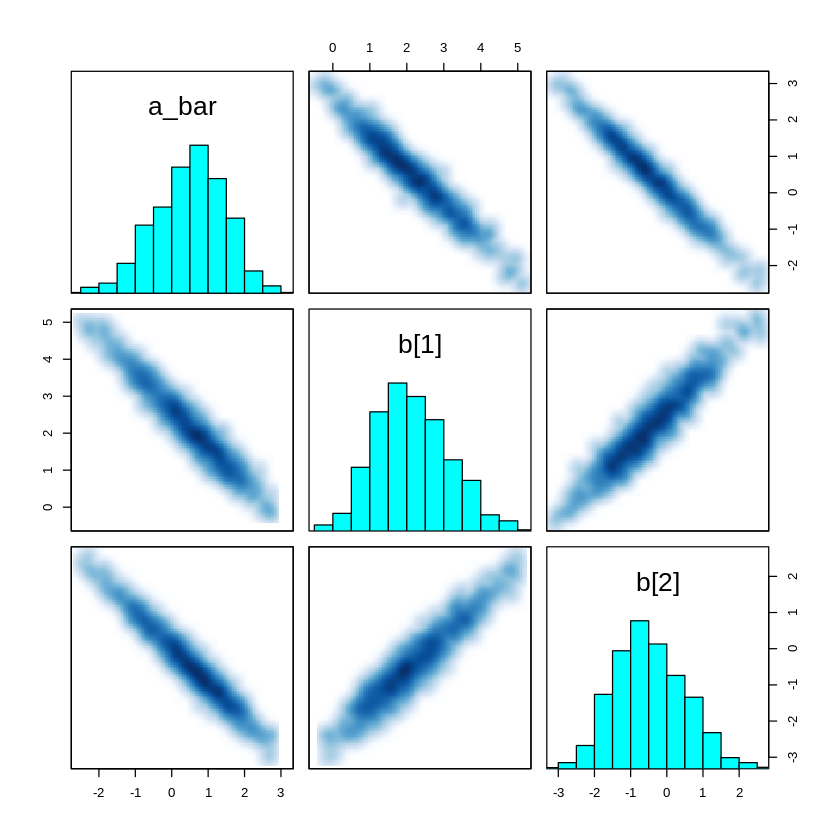

In [39]:
pairs(m12M1_P@stanfit, pars=c("a_bar", "b"))

12M2

In [33]:
compare(m12M1, m12M1_P, m12M1_sz, m12M1_szP, m12M1_int) 

WAIC     pWAIC    dWAIC     weight    SE       dSE     
m12M1_P   198.6385 18.99359 0.0000000 0.3365887 9.293501       NA
m12M1_szP 199.3323 19.04276 0.6937776 0.2379292 8.737720 1.821542
m12M1_int 200.0694 19.15668 1.4308917 0.1645832 9.455295 3.080055
m12M1_sz  200.3063 20.97961 1.6677742 0.1461999 7.210738 6.313933
m12M1     200.7916 21.13413 2.1530998 0.1146991 7.350511 6.131223

In [34]:
compare(m12M1, m12M1_P, m12M1_sz, m12M1_szP, m12M1_int, func=LOO) 

Warning message:
“Some Pareto k diagnostic values are too high. See help('pareto-k-diagnostic') for details.
”Warning message:
“Some Pareto k diagnostic values are too high. See help('pareto-k-diagnostic') for details.
”Warning message in log(z):
“NaNs produced”Warning message:
“Some Pareto k diagnostic values are too high. See help('pareto-k-diagnostic') for details.
”Warning message:
“Some Pareto k diagnostic values are too high. See help('pareto-k-diagnostic') for details.
”Warning message:
“Some Pareto k diagnostic values are too high. See help('pareto-k-diagnostic') for details.
”

LOO      pLOO     dLOO      weight      SE        dSE     
m12M1_int 210.4036 24.32382 0.0000000 0.355213011 10.993198       NA
m12M1_szP 210.5037 24.62847 0.1000467 0.337881181 10.181256 3.068497
m12M1_P   210.7589 25.05379 0.3552261 0.297407904 11.044951 4.700726
m12M1_sz  218.7735 30.21322 8.3698311 0.005407582  8.116633 8.209339
m12M1     219.3318 30.40425 8.9281883 0.004090321  8.547637 8.048591

The LOO version is much clearer, but WAIC also demonstrates that models with the predictor variable for Preditor make better out of sample predictions (almost significantly so, judged by the LOO measure).  Those models without P have worse predictions, and also wider values of sigma_a (variance of survival rate across tanks).

As discussed in the previous question, it makes intuitive sense that models featuring the preditor variable are able to exploit useful information about the specific tank (i.e. whether or note preditors are present) that aid in predicting the survival rate of reedfrogs in a particular tank (i.e. tanks with preditors are likely to have lower survival rates of reed frogs).  The predator variable explains part of the variance across tanks, thus sigma_a is reduced.

12M3

From the wikipedia page about Cauchy distributions:

"The Cauchy distribution is often used in statistics as the canonical example of a "pathological" distribution since both its expected value and its variance are undefined. (But see the section Explanation of undefined moments below.) The Cauchy distribution does not have finite moments of order greater than or equal to one; only fractional absolute moments exist.[1] The Cauchy distribution has no moment generating function."

Given variance is undefined (infinite), this would suggest that the prior would allow a particularly large range of plausible values, thus the prior should not be very regularizing.  In this case, I expect we will see the extreme values (on the probability scale) of 0 and 1.

The fact that the mean is also undefined makes me wonder whether this will have any impact on calculating the posterior by updating the prior?  As long as the prior has a well-defined start point in which to explore the space of possible values on the log-posterior space, I don't see why it would cause an issue....

In [84]:
m12M1_normal1 <- ulam(
            alist(
                S ~ dbinom( N , p ) ,
                logit(p) <- a[tank] ,
                a[tank] ~ dnorm( a_bar , sigma_a ) ,
                a_bar ~ dnorm( 0 , 1 ) ,
                sigma_a ~ dexp( 1 )
            ), data=dat , chains=4 , cores=4, log_lik=TRUE )

In [42]:
m12M1_cauchy <- ulam(
            alist(
                S ~ dbinom( N , p ) ,
                logit(p) <- a[tank] ,
                a[tank] ~ dcauchy( a_bar , sigma_a ) ,
                a_bar ~ dnorm( 0 , 1 ) ,
                sigma_a ~ dhalfcauchy( 0, 1 )
            ), data=dat , chains=4 , cores=4, 
            control=list(adapt_delta=0.99),
            log_lik=TRUE )

recompiling to avoid crashing R session
Warning message:
“There were 110 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

One observation is the existence of divergent transitions, even when adapt_delta is set to 0.99.  Perhaps we should try to re-parameterize?

In [44]:
precis(m12M1_cauchy, depth=2)

mean        sd        5.5%       94.5%       n_eff     Rhat     
a[1]     1.99558454 0.8553501  0.8783444  3.41714479 1192.2894 1.0017207
a[2]     5.16495567 5.2433831  1.4469614 14.52905775  182.5673 1.0115755
a[3]     1.11382638 0.6072248  0.1732641  2.09719654 1615.1114 0.9999424
a[4]     5.88135349 6.1348041  1.5107394 18.46238378  212.2671 1.0342434
a[5]     2.07740225 0.9004617  0.9174484  3.64696595  892.0154 1.0048604
a[6]     2.06288115 0.9443706  0.8714548  3.69527012  622.0037 1.0092518
a[7]     4.92950266 4.6493298  1.4941455 14.05301049  234.2274 1.0119889
a[8]     2.07439447 0.9134082  0.8342216  3.68829163  975.4618 1.0004488
a[9]    -0.07627652 0.6597879 -1.1655173  0.96340517 1830.1079 1.0032772
a[10]    2.01094926 0.8177586  0.8770911  3.40955095 1691.9437 1.0006763
a[11]    1.09878776 0.6099279  0.1107056  2.05905098 1831.3310 1.0006653
a[12]    0.71755919 0.6133518 -0.2638411  1.68507569 1793.1165 0.9996349
a[13]    1.08754577 0.6008177  0.1585326  2.04990169 1870.5445 0.9993973
a[14]    0.32975837 0.6201469 -0.6905349  1.29343367 1514.3320 0.9994740
a[15]    1.98607576 0.8000492  0.9443008  3.40873347 1007.6824 0.9996976
a[16]    2.02196383 0.9059869  0.8660026  3.45617370  917.3341 1.0018324
a[17]    2.93796389 0.9969286  1.6833535  4.72709812  849.7187 1.0041473
a[18]    2.27873005 0.6601077  1.3719528  3.42824609 1263.8696 0.9999604
a[19]    1.93437584 0.5552219  1.1400800  2.89666976 1434.1005 1.0017861
a[20]    7.21190229 6.2560319  2.3943745 21.32431138  276.0925 1.0146861
a[21]    2.26872771 0.6359055  1.3757824  3.33278780 1267.0910 0.9997911
a[22]    2.26999697 0.6624066  1.3276097  3.43600444 1489.8864 1.0028772
a[23]    2.29271231 0.6625267  1.3566911  3.42779186 1477.0753 1.0014470
a[24]    1.64902435 0.4904194  0.9531929  2.46349933 1671.9339 0.9999437
a[25]   -1.06155924 0.4781265 -1.8348185 -0.32939208 1816.3510 0.9998469
a[26]    0.24786915 0.4076056 -0.4048413  0.89986459 1607.0565 0.9990277
a[27]   -1.58228991 0.5757486 -2.5118985 -0.71517594 2175.9519 1.0002240
a[28]   -0.46060247 0.4215646 -1.1270736  0.20730922 2082.4113 1.0000271
a[29]    0.22536767 0.4119531 -0.4510518  0.88446050 1833.5824 0.9989076
a[30]    1.43096301 0.4533057  0.7374884  2.14192503 1864.4016 1.0010392
a[31]   -0.63988408 0.4264167 -1.3527845  0.02717758 2023.8328 0.9997499
a[32]   -0.26521214 0.4123052 -0.8986225  0.37708006 1765.4332 0.9994981
a[33]    3.23317255 0.9444877  1.9812704  4.88752347 1418.0323 1.0012307
a[34]    2.61858448 0.6904442  1.6621048  3.82600409 1575.2953 0.9996632
a[35]    2.61508139 0.6944467  1.6620197  3.86666408 1461.0564 1.0031650
a[36]    1.97335411 0.4849527  1.2837135  2.78345732  925.7091 1.0052704
a[37]    1.97491991 0.4737028  1.2647566  2.76529287 1704.5671 0.9991981
a[38]    7.72718158 5.7867121  2.7749073 20.39752373  275.4610 1.0051679
a[39]    2.59880573 0.6825194  1.6600071  3.75198436 1227.1039 1.0025604
a[40]    2.21846491 0.5515070  1.4266387  3.17556615 1726.6263 1.0024055
a[41]   -1.99328198 0.5255569 -2.8662418 -1.21062940 1660.4118 1.0012564
a[42]   -0.55069730 0.3505191 -1.1292207 -0.03523660 1736.9942 0.9993764
a[43]   -0.45300257 0.3665410 -1.0294019  0.13067105 1893.8402 1.0028793
a[44]   -0.31952963 0.3611447 -0.8991352  0.23921934 1753.8834 1.0008005
a[45]    0.64801146 0.3374250  0.1224398  1.19648601 1902.5583 1.0015934
a[46]   -0.57755065 0.3624219 -1.1715872 -0.01814682 2275.1648 0.9998983
a[47]    1.98464452 0.5133224  1.2261791  2.82459738 1596.7214 1.0003473
a[48]    0.04485396 0.3519092 -0.5294365  0.60039735 1969.2534 0.9992637
a_bar    1.42258873 0.2895099  0.9706735  1.87819062 1184.1083 0.9986965
sigma_a  1.02919629 0.2256426  0.6956319  1.41846820 1074.3707 1.0030738

It seems that, on the whole the posterior is well sampled, except for a few specific intercepts such as a[2], a[4], a[7], a[20], and a[38].  In these cases, the values of a are estimated to be extremely high, with values around 5 or almost 8!  These correspond, in the probability space to ~ 1.

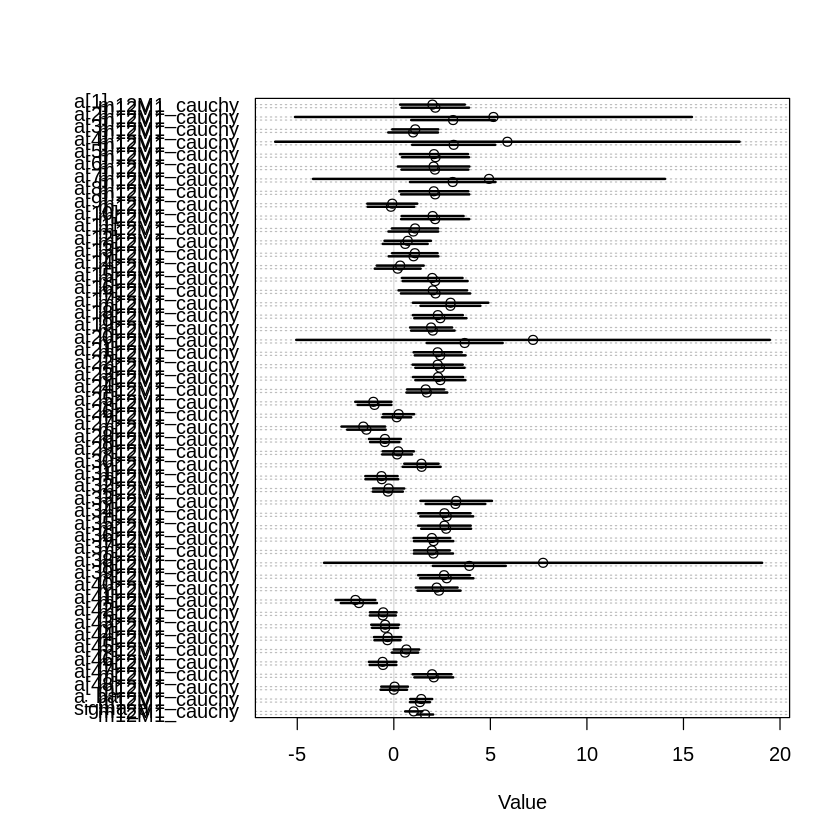

In [53]:
plot(coeftab(m12M1, m12M1_cauchy))

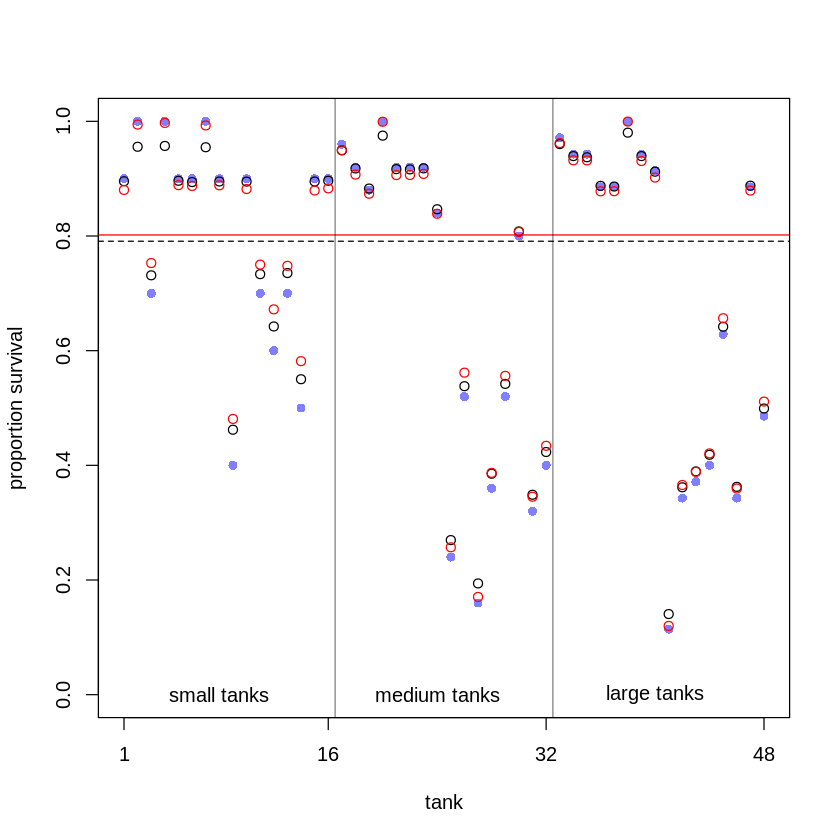

In [87]:
# extract Ulam (Stan) samples
post <- extract.samples(m12M1)
post_c <- extract.samples(m12M1_cauchy)
post_n1 <- extract.samples(m12M1_normal1)

# compute median intercept for each tank
# also transform to probability with logistic
d$propsurv.est <- inv_logit( apply( post$a , 2 , mean ) )
d$propsurv.est_c <- inv_logit( apply( post_c$a , 2 , mean ) )
# d$propsurv.est_n1 <- inv_logit( apply( post_n1$a , 2 , mean ) )

# display raw proportions surviving in each tank
plot( d$propsurv , ylim=c(0,1) , pch=16 , xaxt="n" ,
xlab="tank" , ylab="proportion survival" , col=rangi2 )
axis( 1 , at=c(1,16,32,48) , labels=c(1,16,32,48) )

# overlay posterior means
points( d$propsurv.est )
points( d$propsurv.est_c, col=col.alpha("red",1) )
# points( d$propsurv.est_n1, col=col.alpha("purple",1) )

# mark posterior mean probability across tanks
abline( h=mean(inv_logit(post$a_bar)) , lty=2 )
abline( h=mean(inv_logit(post_c$a_bar)) , lty=1, col=col.alpha("red",1) )
# abline( h=mean(inv_logit(post_n1$a_bar)) , lty=1, col=col.alpha("purple",1) )

# draw vertical dividers between tank densities
abline( v=16.5 , lwd=0.5 )
abline( v=32.5 , lwd=0.5 )
text( 8 , 0 , "small tanks" )
text( 16+8 , 0 , "medium tanks" )
text( 32+8 , 0 , "large tanks" )

As expected, when extreme values such as prob survival = 1 occur in the experiments, the Cauchy distribution 'overfits' and matches these values closely, in contrast to the normal prior.  These p=1 events occurred a lot more than low p events (there are no p=0 events in any of the tanks).  As such the a_bar for the cauchy prior is a little bit higher than for the model fitted with a normal prior.  As such, there is generally an upward bias on predictions from the Cauchy prior model compared to the normal prior (or even the actual data points), at least for those points below the average a_bar in small tanks.  

Note however, that when the data is more extreme, even for the low prob events, as expected, the Cauchy prior points overfit the data points, in contrast to the normal prior points which are more skeptical of the very low data points.

<s>There seems to be a threshold however, where the Cauchy prior points within an interval around the average a_bar experience more shrinkage to the mean a_bar than those of the normal prior.  This can be understood by comparing the densities of the normal(0,1.5) and the cauchy distributions(0,1), where the normal density has a higher 'middle' values, yet lower tails and central values???</s>

As size of tank is larger, the choice of prior has less affect as the extra data means the priors are less important.  

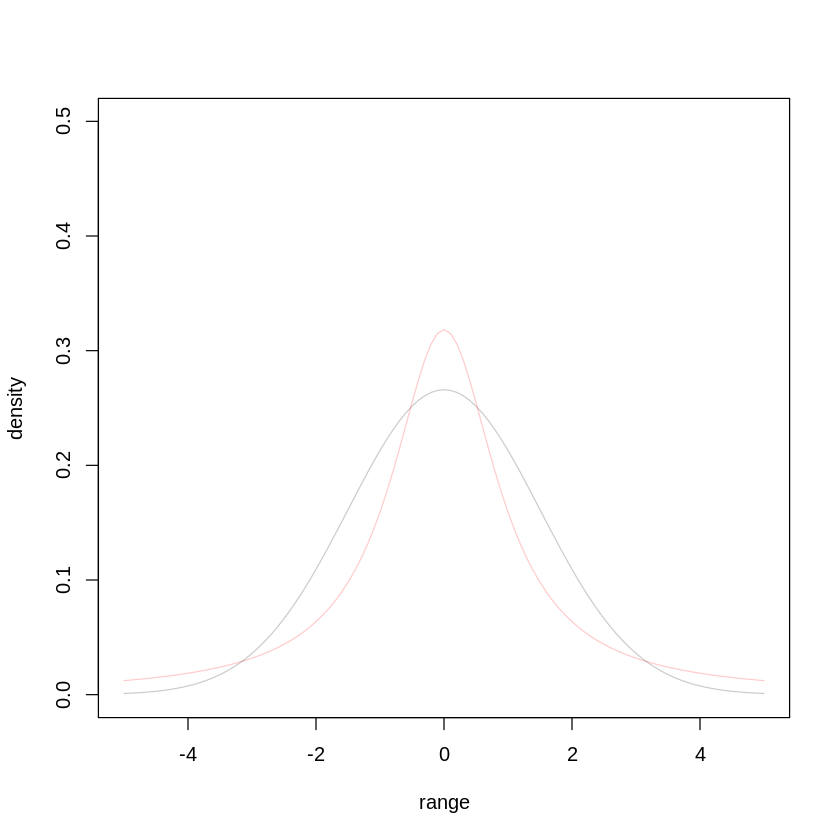

In [88]:
plot( NULL , xlim=c(-5,5) , ylim=c(0,0.5) ,
xlab="range" , ylab="density" )
curve( dnorm(x,0,1.5) , add=TRUE , col=col.alpha("black",0.2) )
curve( dcauchy(x,0,1) , add=TRUE , col=col.alpha("red",0.2) )

12M4

In [93]:
data(chimpanzees)
d <- chimpanzees
head(d)

actor recipient condition block trial prosoc_left chose_prosoc pulled_left
1 1     NA        0         1      2    0           1            0          
2 1     NA        0         1      4    0           0            1          
3 1     NA        0         1      6    1           0            0          
4 1     NA        0         1      8    0           1            0          
5 1     NA        0         1     10    1           1            1          
6 1     NA        0         1     12    1           1            1

The model in the question does not define the variables C and P.  It's probably C for condition and P for prosoc_left, however not sure.  

Also, the model is specified in a different way, with dummy variables for the interaction terms involving C * P, and the priors using half-cauchy distributions instead of exponential ones, and the priors all centered with hyper-parameters.  Therefore, I think this formulation is from the 1st edition.  

As the question asks to compare this specification to the model in the chapter, it is difficult to do a fair comparison because the model in the chapter is different in several ways.  So it's difficult to really know what the author is asking for here.  I'm not sure if it is to compare having the priors centered with new hyper-parameters, the massively increased standard deviation for the priors (i.e. for a_bar, sd=10), which suggests an attempt to overfit by having a flat prior...

Therefore, I will use my own interpretation of what the author is asking for, given that in the chapter he says not to bother with the hyper-parameters for centring of the priors, and in general in the book, he has used index variables rather than dummy variables.

In [94]:
d$treatment <- 1 + d$prosoc_left + 2*d$condition

dat_list <- list(
                pulled_left = d$pulled_left,
                actor = d$actor,
                block_id = d$block,
                treatment = as.integer(d$treatment) )

set.seed(13)

m12M4 <- ulam(
            alist(
                pulled_left ~ dbinom( 1 , p ) ,
                logit(p) <- a[actor] + g[block_id] + b[treatment] ,
                b[treatment] ~ dnorm( 0 , sigma_b ),
                # adaptive priors
                a[actor] ~ dnorm( a_bar , sigma_a ),
                g[block_id] ~ dnorm( 0 , sigma_g ),
                # hyper-priors
#                 c(a_bar, gamma, beta) ~ dnorm( 0 , 10 ),
                a_bar ~ dnorm( 0 , 10 ),
                c(sigma_a, sigma_g, sigma_b) ~ dexp(1)
#                 sigma_g ~ dexp(1),
#                 sigma_b ~ dexp(1)
            ) , data=dat_list , chains=4 , cores=4 , log_lik=TRUE
#             , control=list(adapt_delta=0.99)
        )

Warning message:
“There were 3 divergent transitions after warmup. Increasing adapt_delta above 0.95 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

In [95]:
m13.4 <- ulam(
            alist(
                pulled_left ~ dbinom( 1 , p ) ,
                logit(p) <- a[actor] + g[block_id] + b[treatment] ,
                b[treatment] ~ dnorm( 0 , 0.5 ),
                # adaptive priors
                a[actor] ~ dnorm( a_bar , sigma_a ),
                g[block_id] ~ dnorm( 0 , sigma_g ),
                # hyper-priors
                a_bar ~ dnorm( 0 , 1.5 ),
                sigma_a ~ dexp(1),
                sigma_g ~ dexp(1)
            ) , data=dat_list , chains=4 , cores=4 , log_lik=TRUE
#             , control=list(adapt_delta=0.99)
        )

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.95 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

In [105]:
m12M4_b <- ulam(
            alist(
                pulled_left ~ dbinom( 1 , p ) ,
                logit(p) <- a[actor] + g[block_id] + b[treatment] ,
                b[treatment] ~ dnorm( beta , sigma_b ),
                # adaptive priors
                a[actor] ~ dnorm( a_bar , sigma_a ),
                g[block_id] ~ dnorm( gamma , sigma_g ),
                # hyper-priors
                c(a_bar, gamma, beta) ~ dnorm( 0 , 10 ),
#                 a_bar ~ dnorm( 0 , 10 ),
                c(sigma_a, sigma_g, sigma_b) ~ dexp(1)
#                 sigma_g ~ dexp(1),
#                 sigma_b ~ dexp(1)
            ) , data=dat_list , chains=4 , cores=4 , log_lik=TRUE
#             , control=list(adapt_delta=0.99)
        )

Warning message:
“There were 111 divergent transitions after warmup. Increasing adapt_delta above 0.95 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“There were 709 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

In [109]:
compare(m12M4, m13.4, m12M4_b)

WAIC     pWAIC    dWAIC     weight    SE       dSE      
m13.4   532.5026 10.91416 0.0000000 0.4067602 19.43068        NA
m12M4   533.0307 11.02999 0.5280196 0.3123780 19.26369 0.5223226
m12M4_b 533.2434 11.26779 0.7407220 0.2808618 19.38000 0.3743096

In [110]:
compare(m12M4, m13.4, m12M4_b, func=LOO)

LOO      pLOO     dLOO      weight    SE       dSE      
m13.4   532.5896 10.95765 0.0000000 0.4067885 19.45476        NA
m12M4   533.1109 11.07013 0.5213279 0.3134467 19.28585 0.5228192
m12M4_b 533.3383 11.31526 0.7486888 0.2797647 19.40394 0.3743492

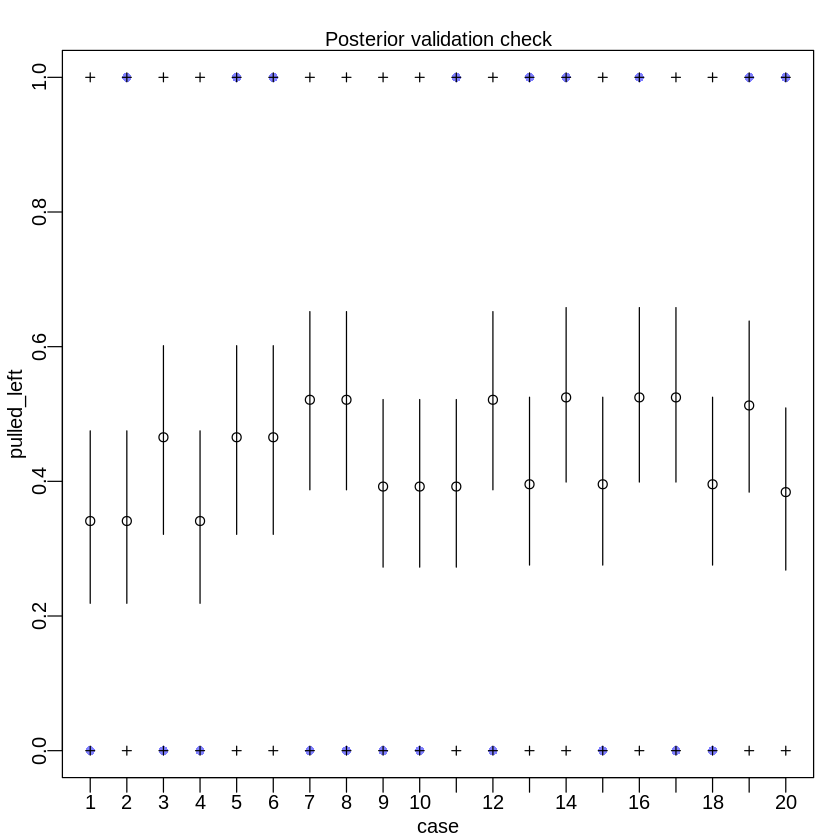

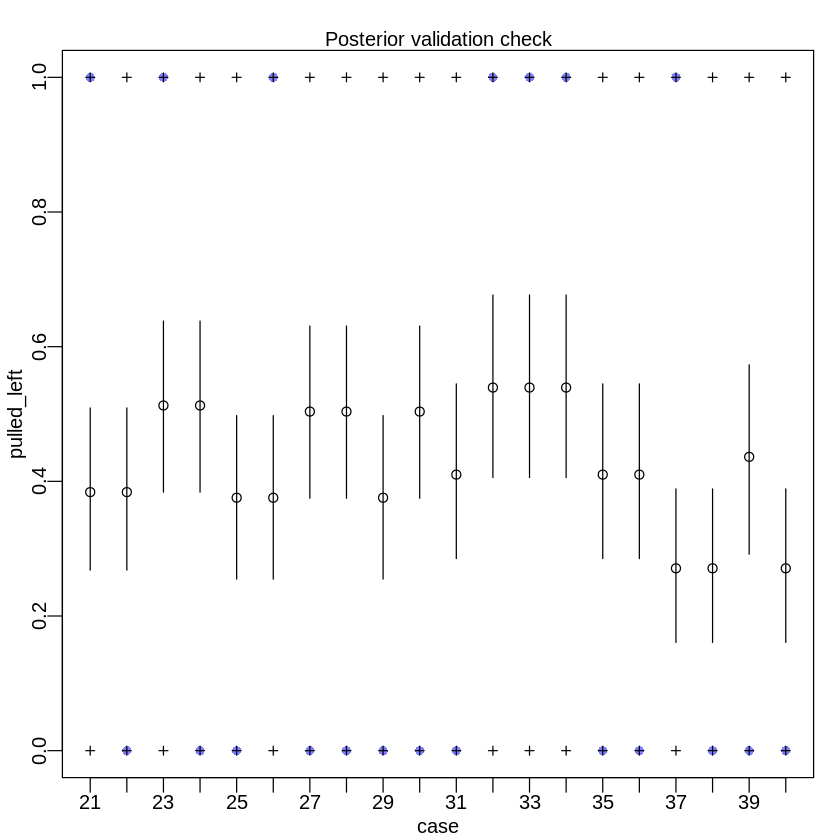

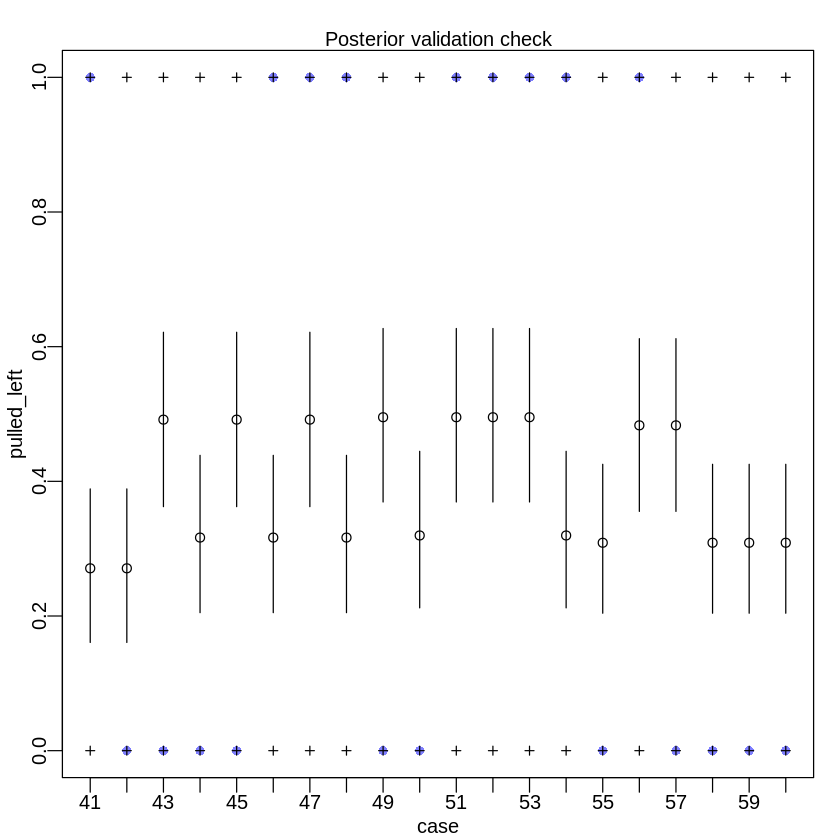

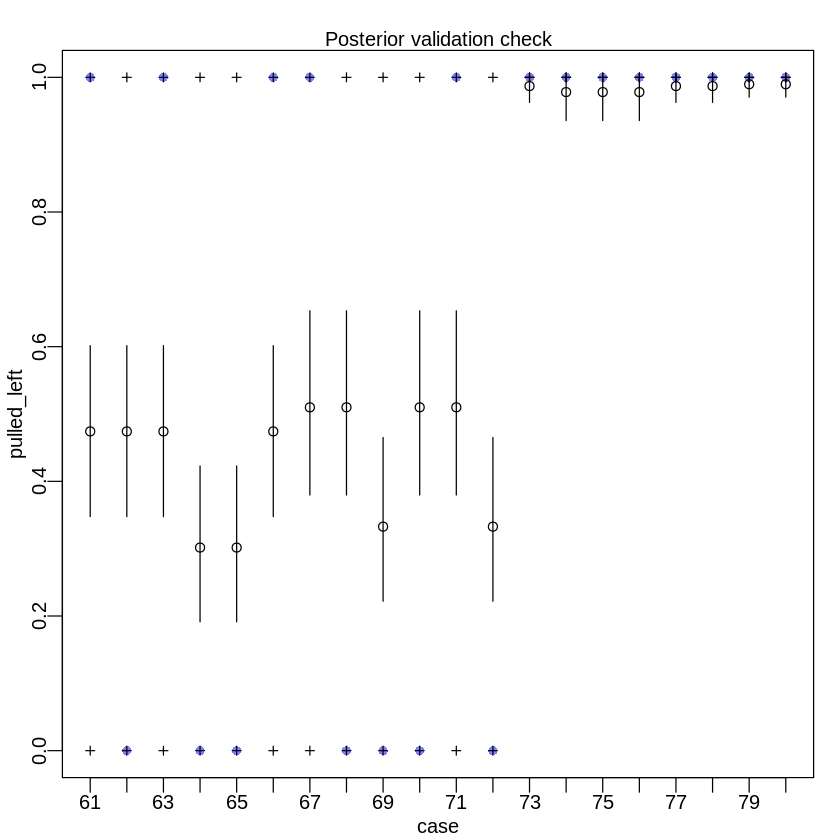

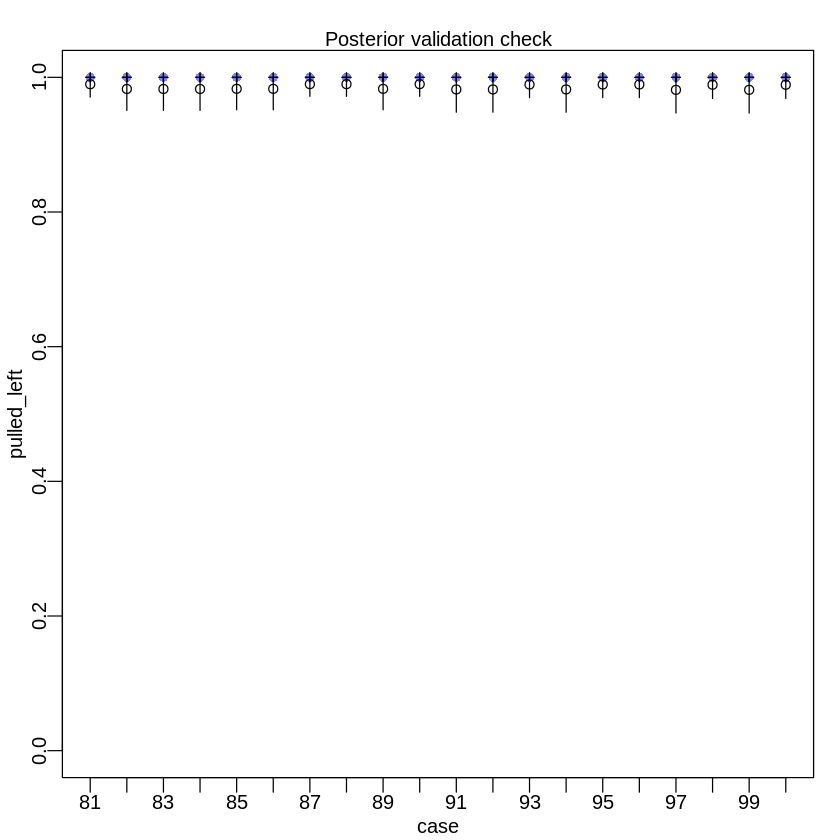

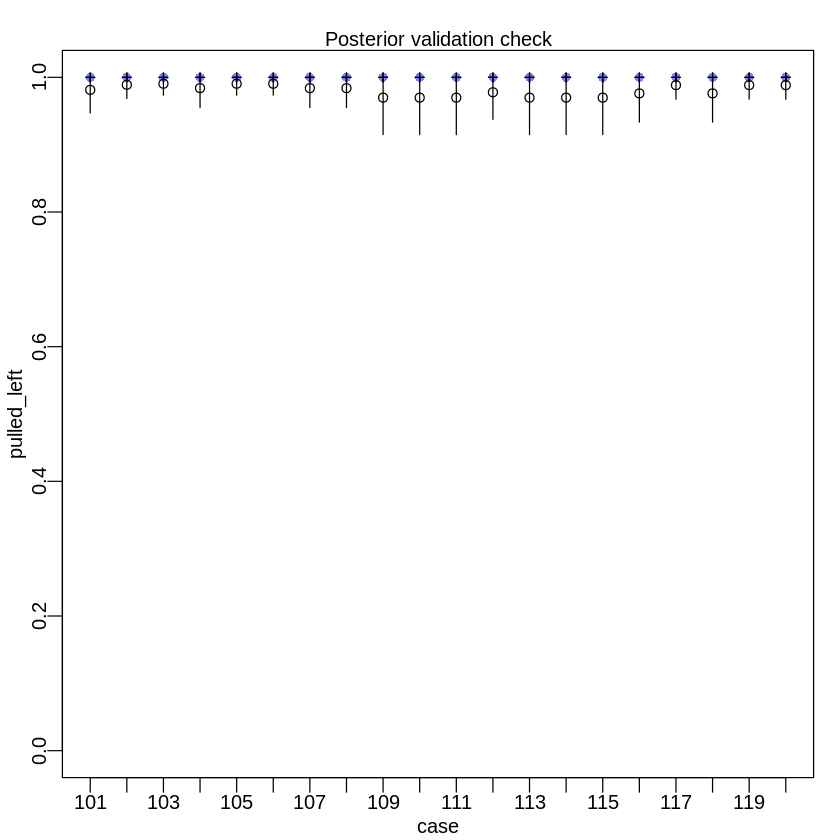

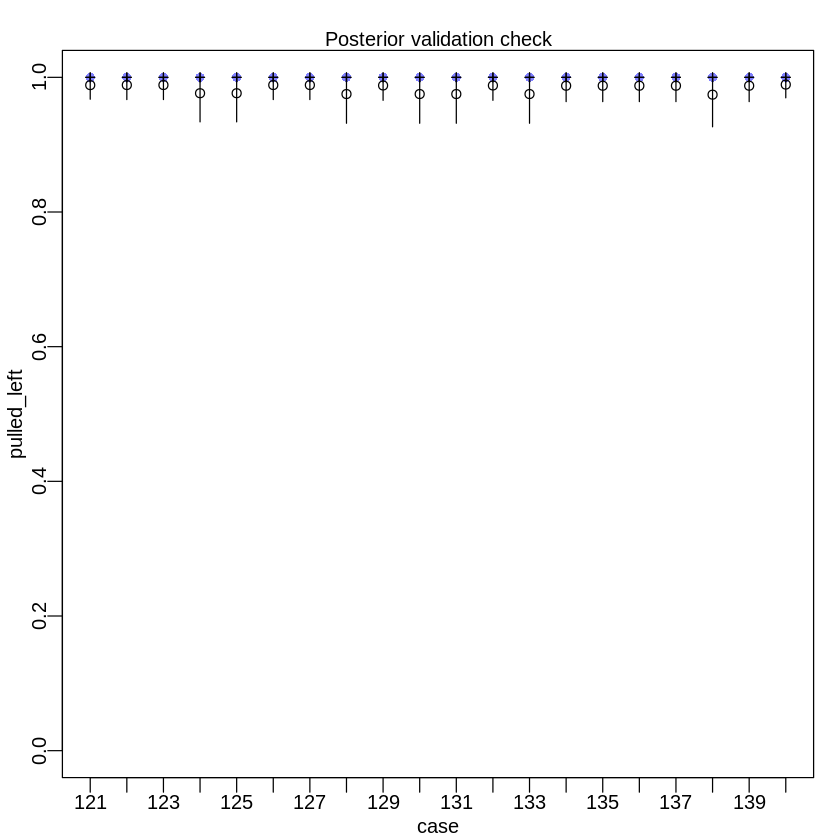

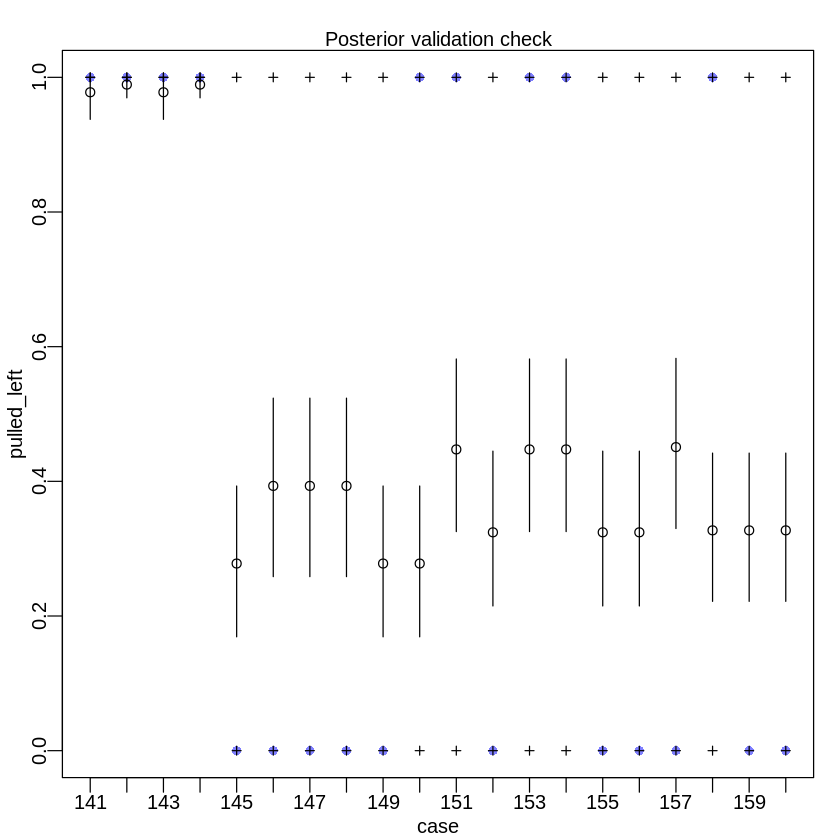

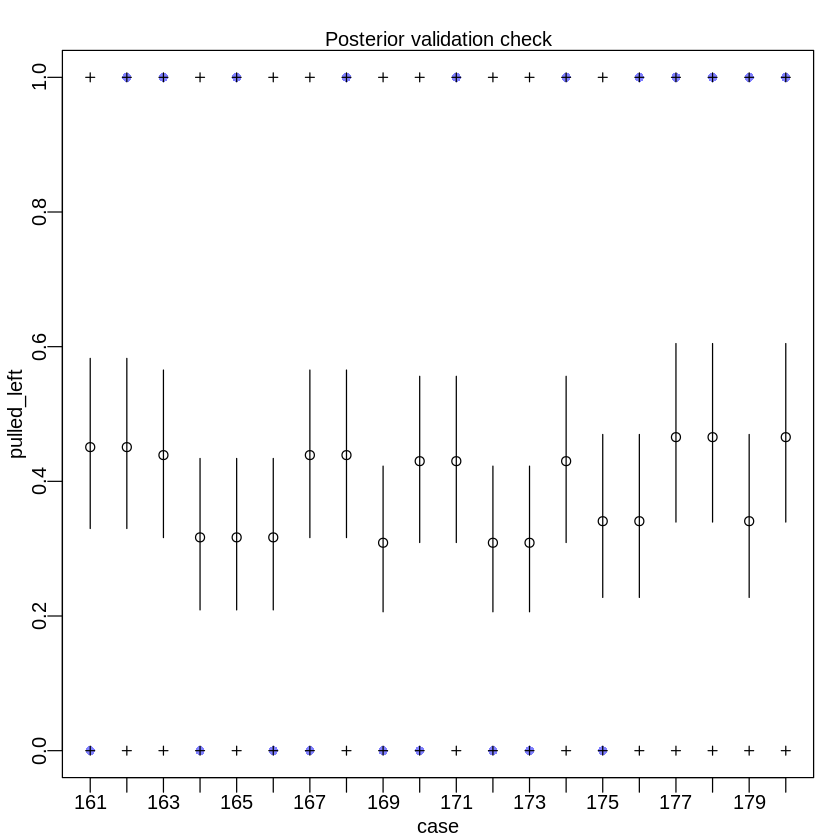

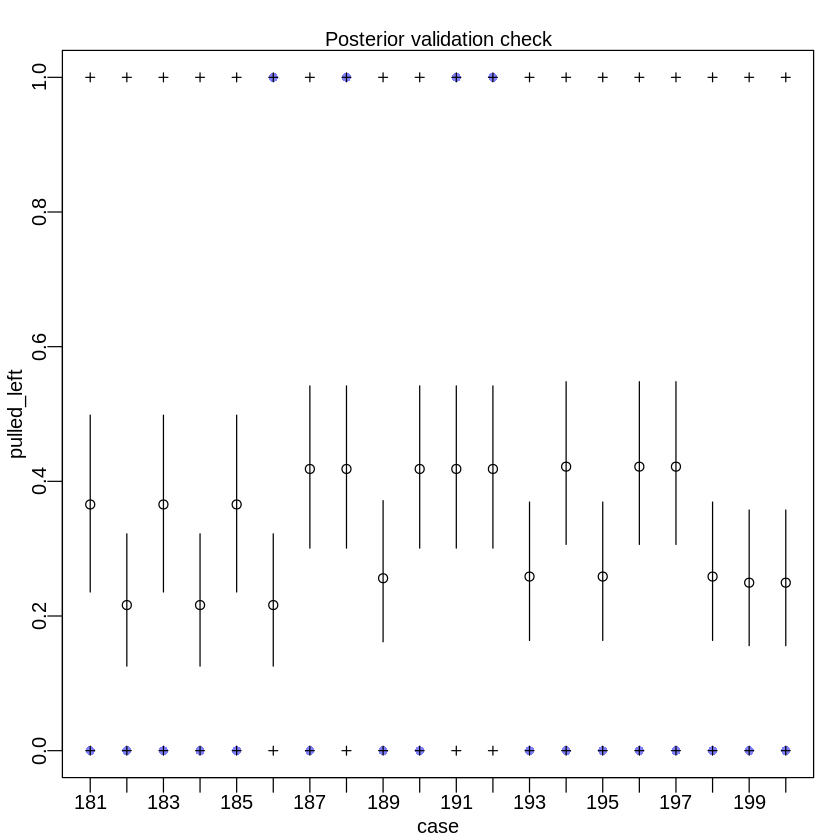

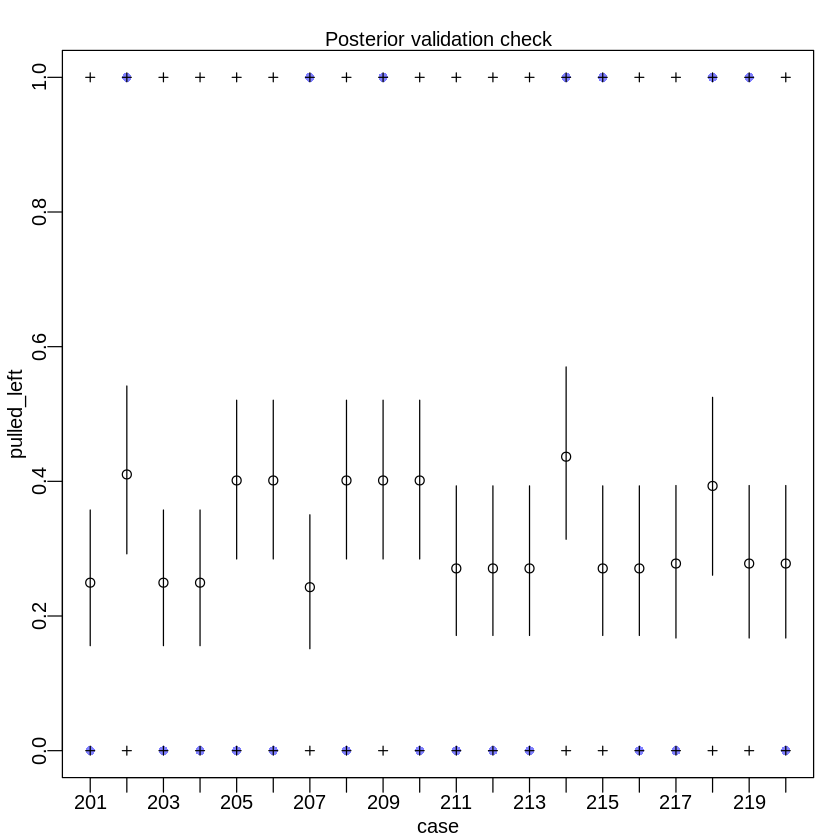

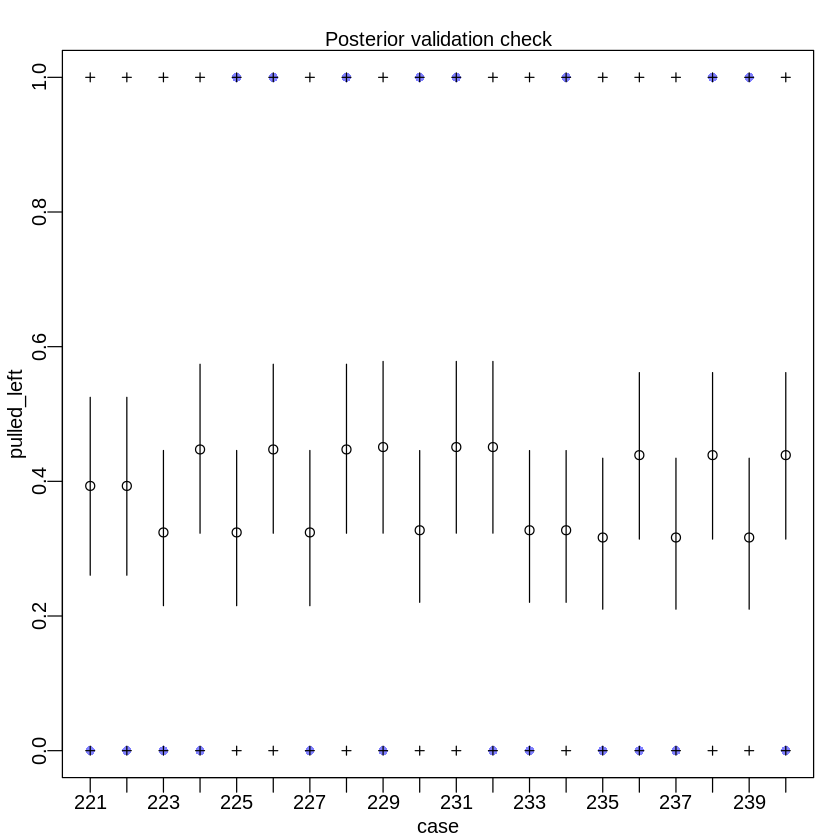

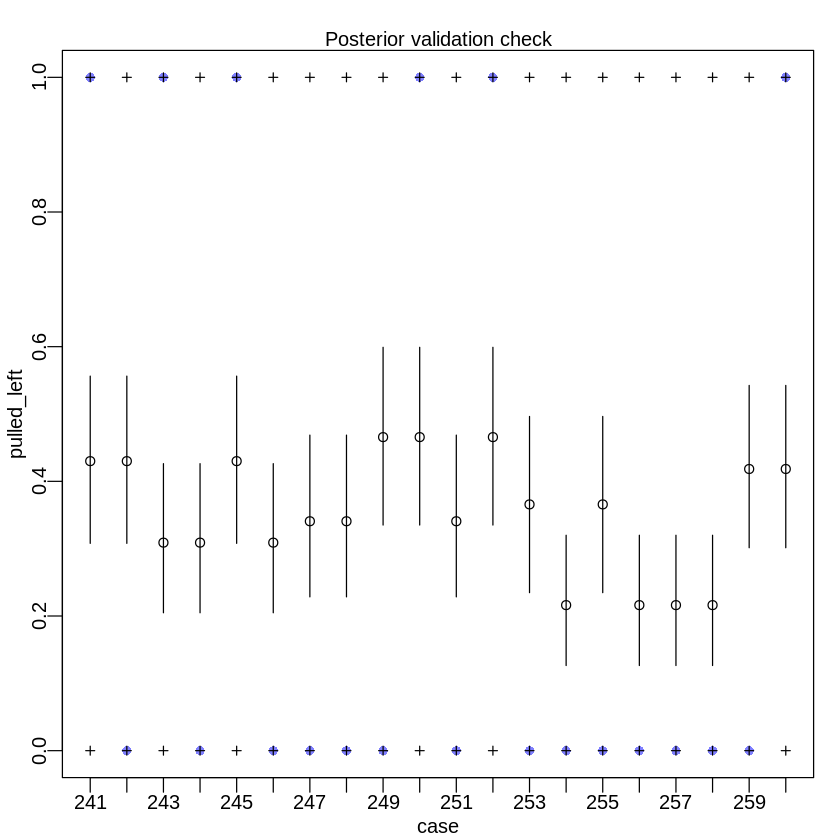

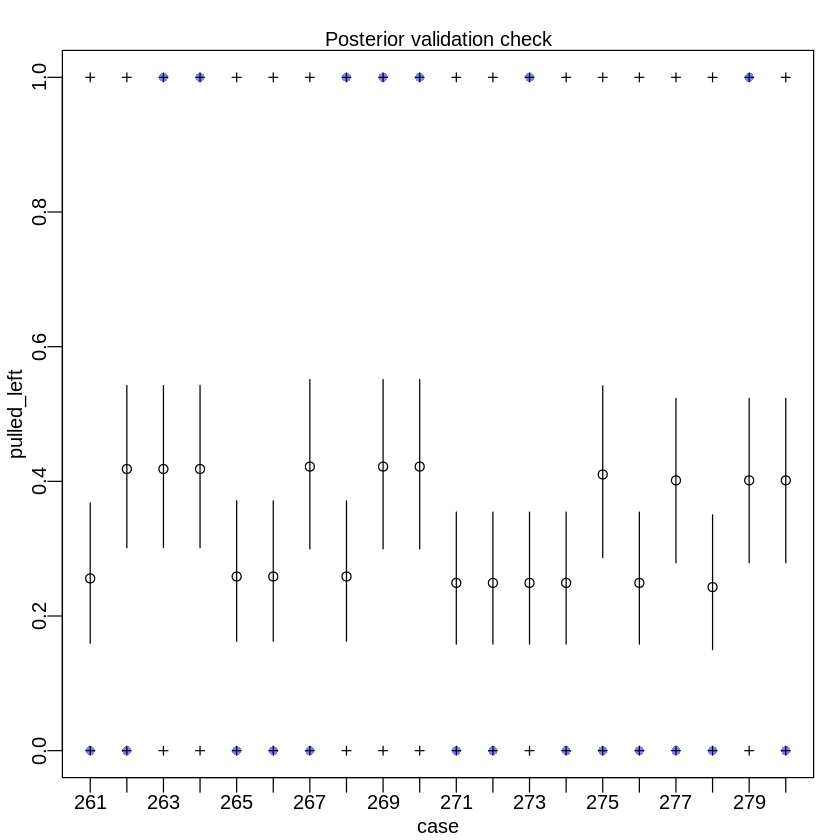

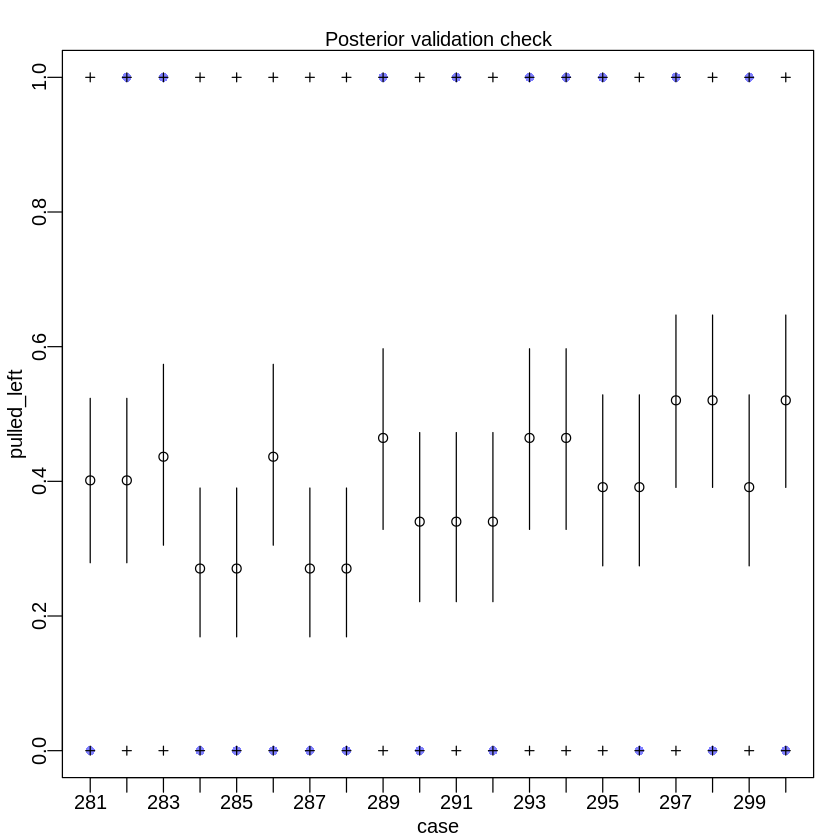

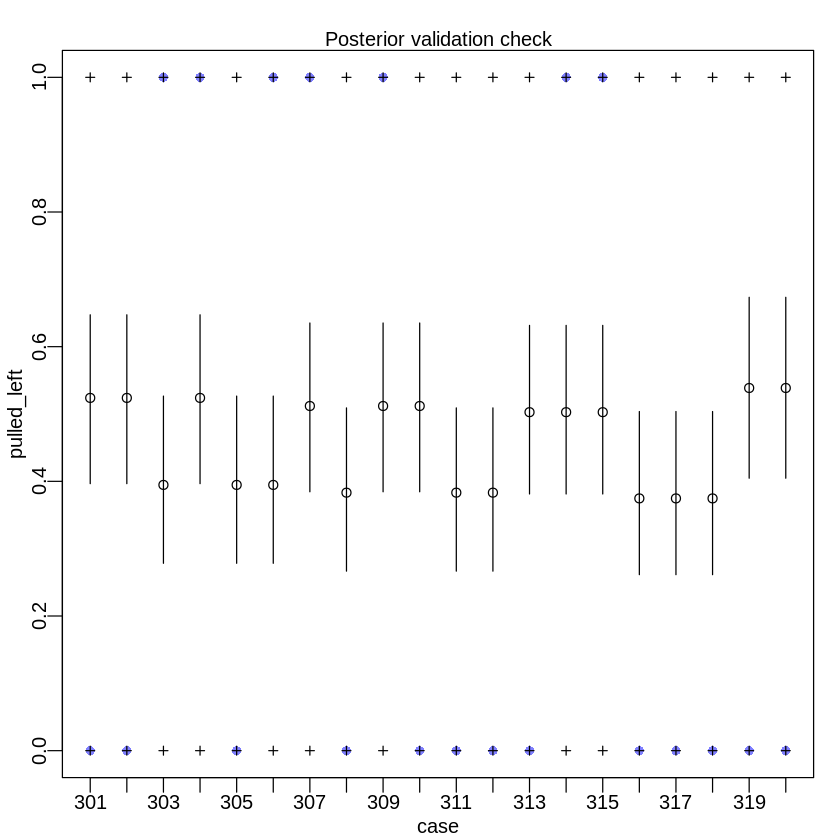

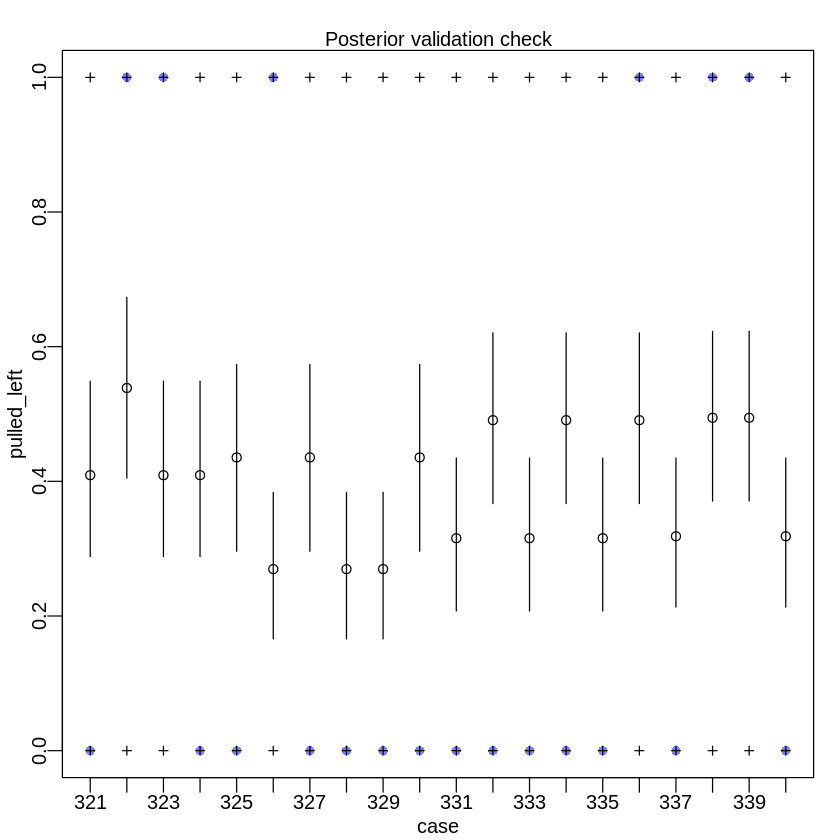

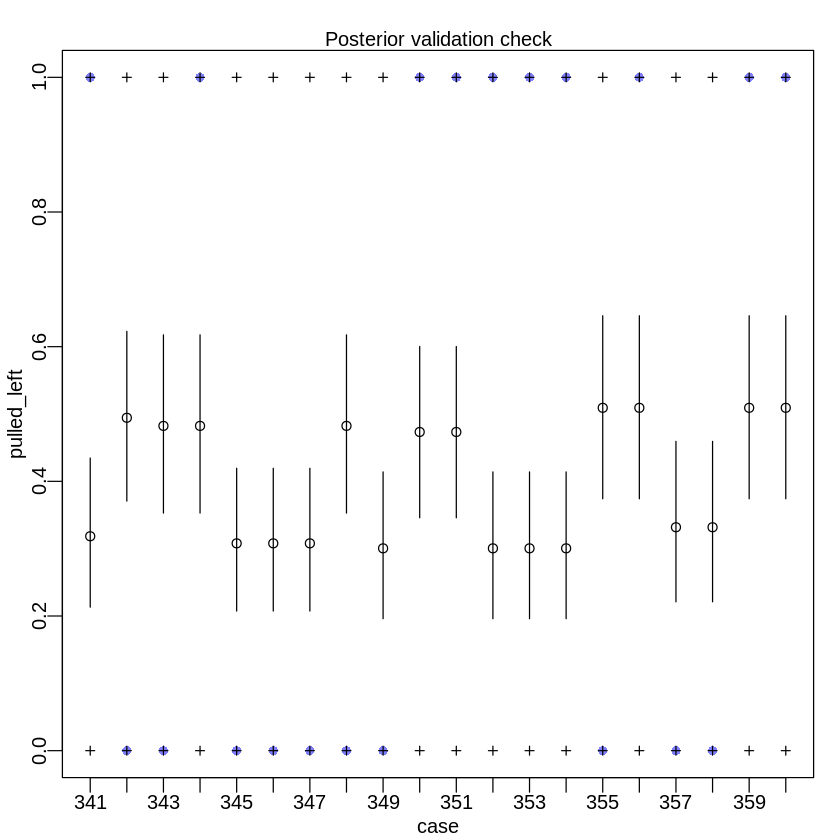

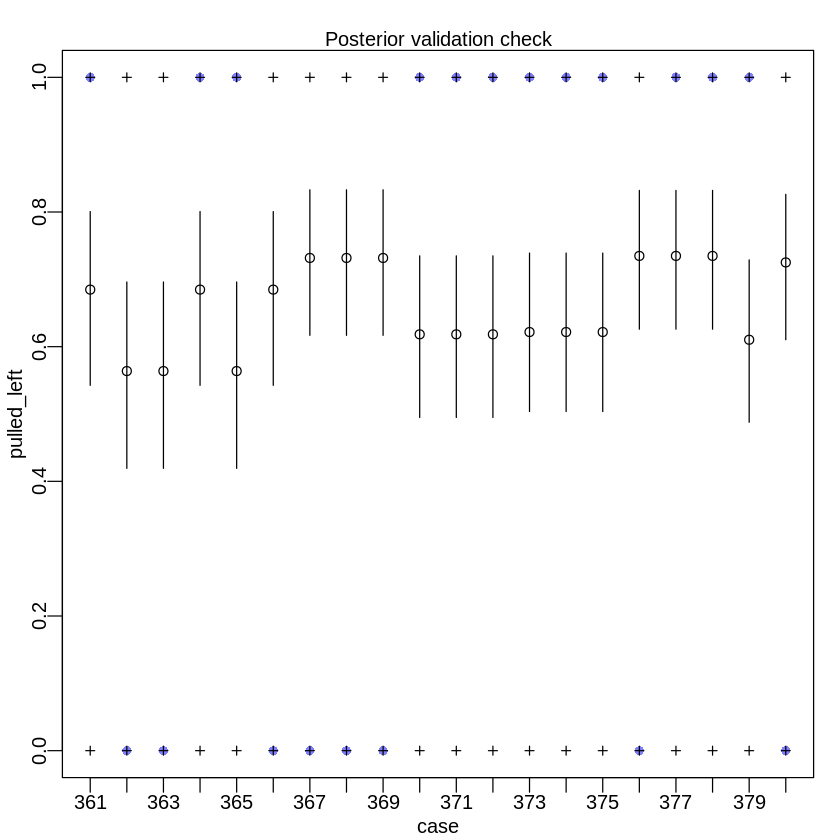

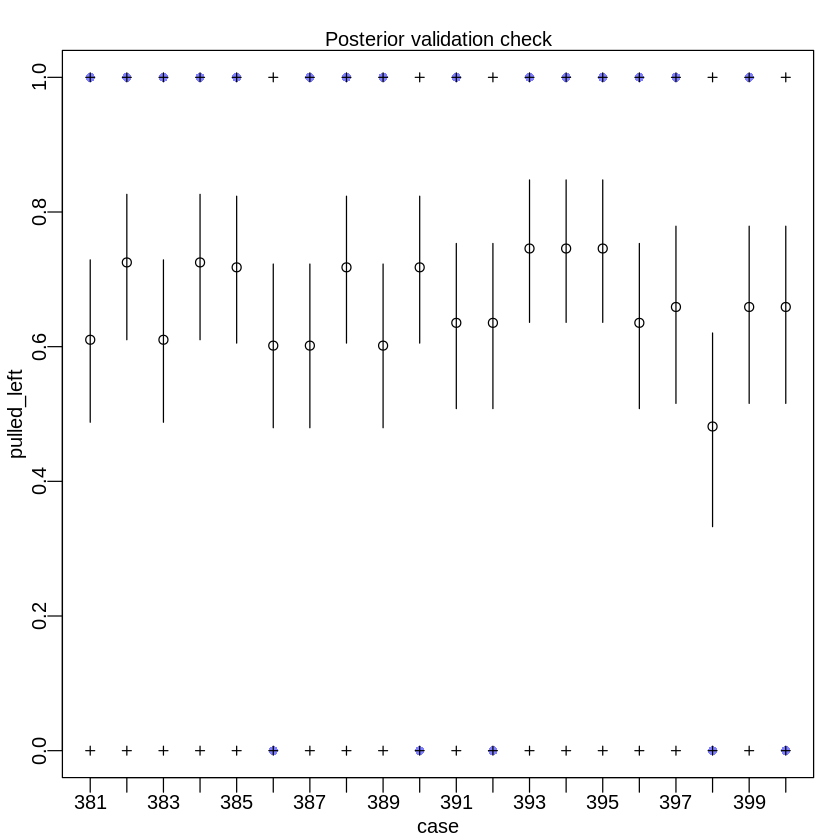

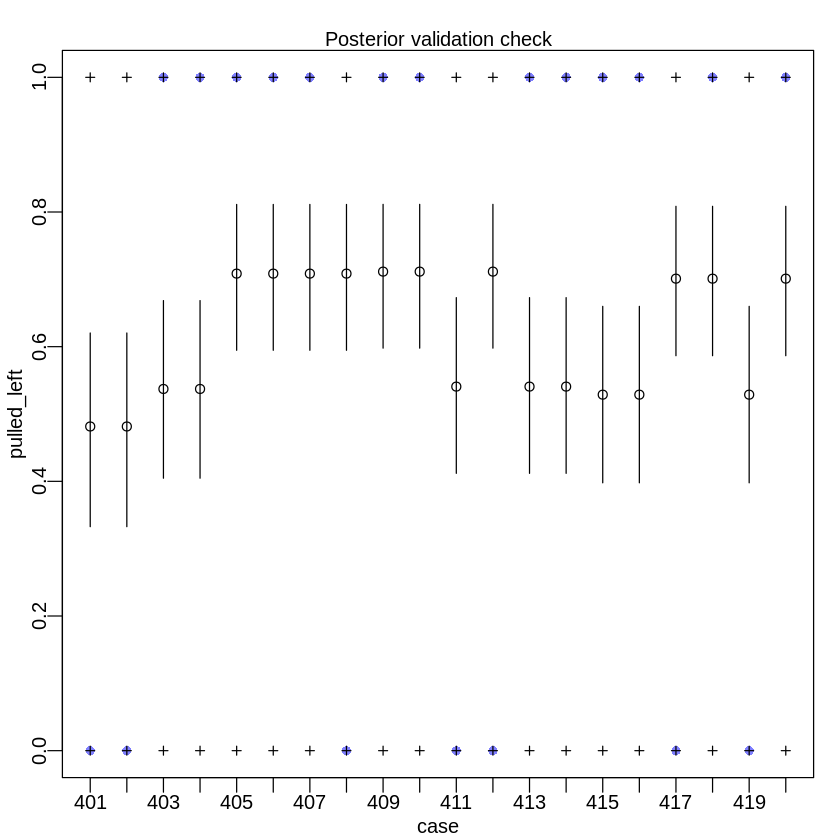

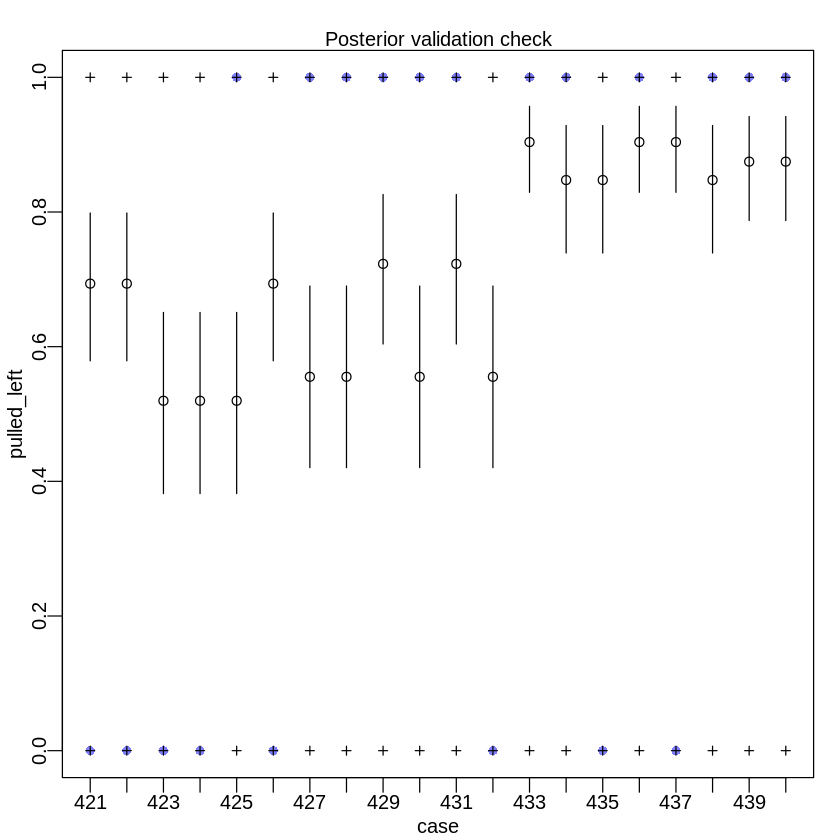

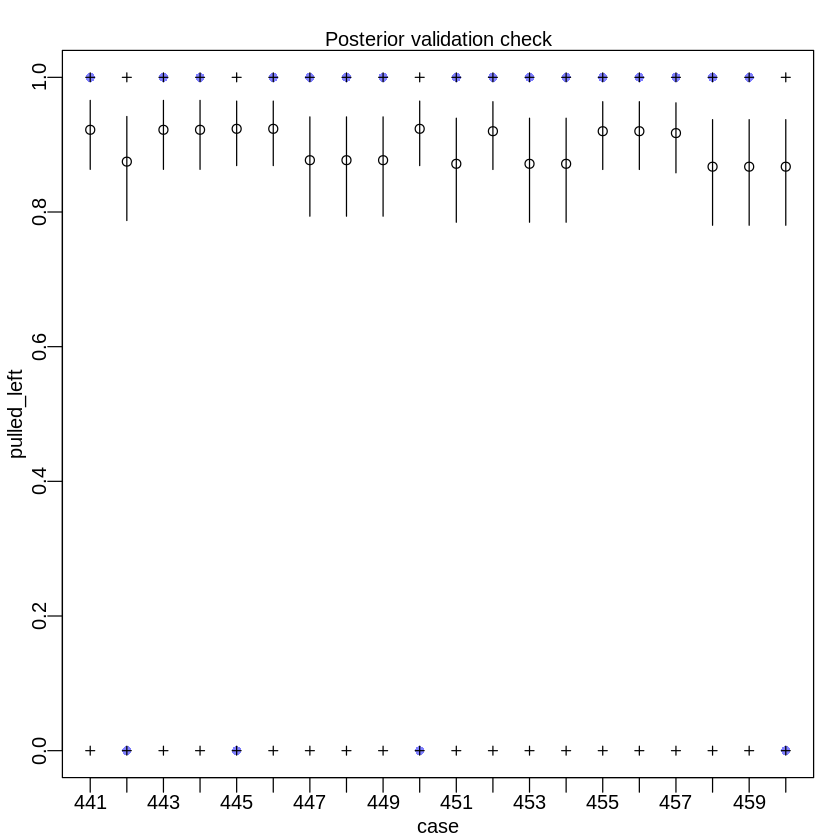

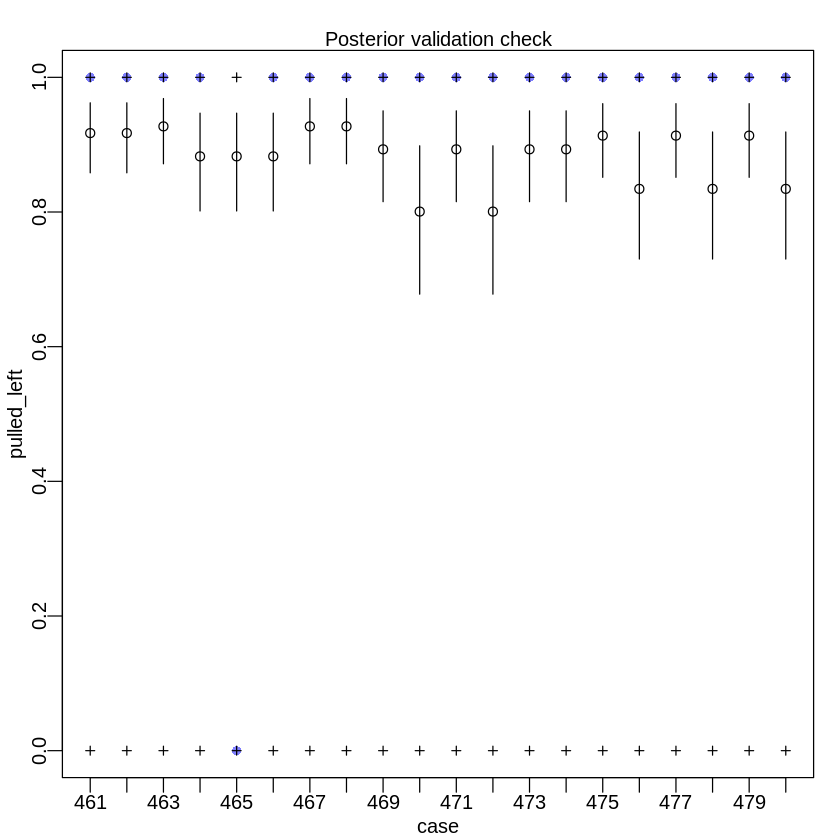

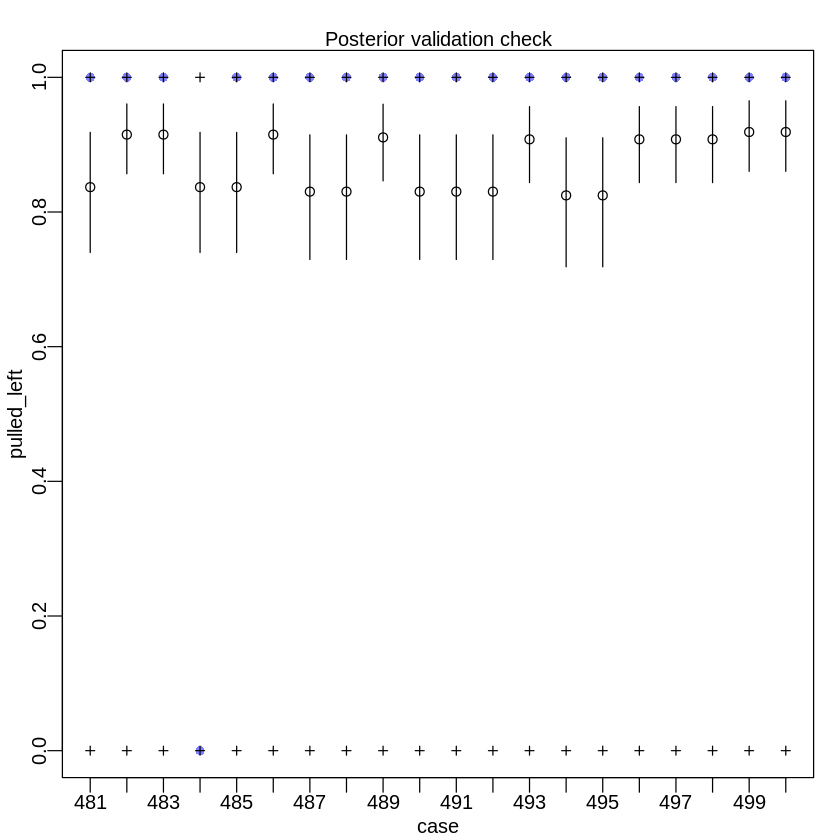

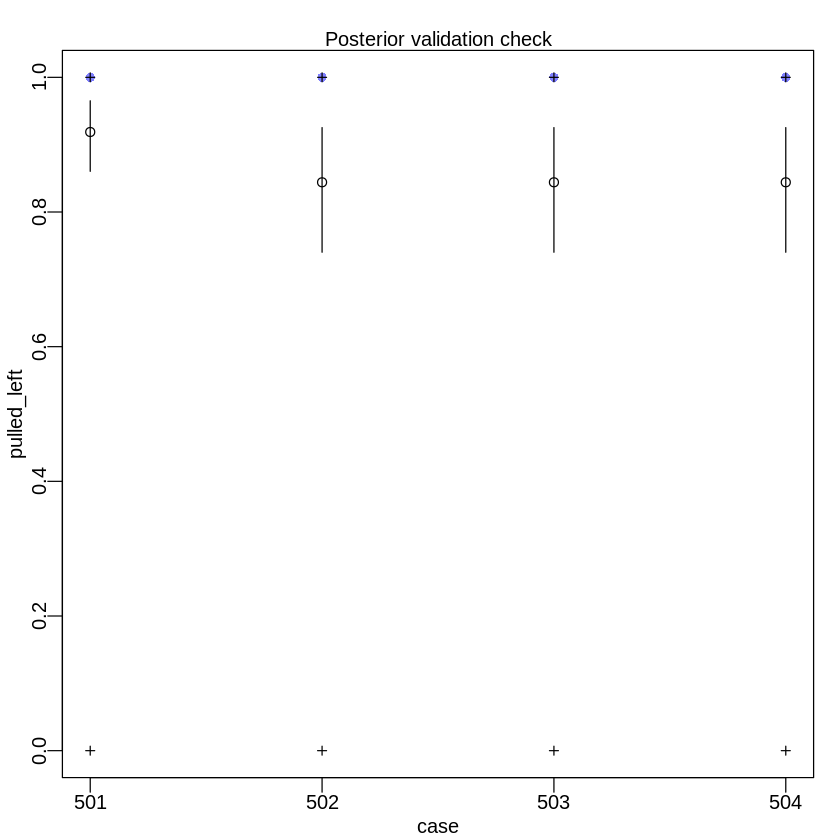

In [102]:
postcheck(m13.4)

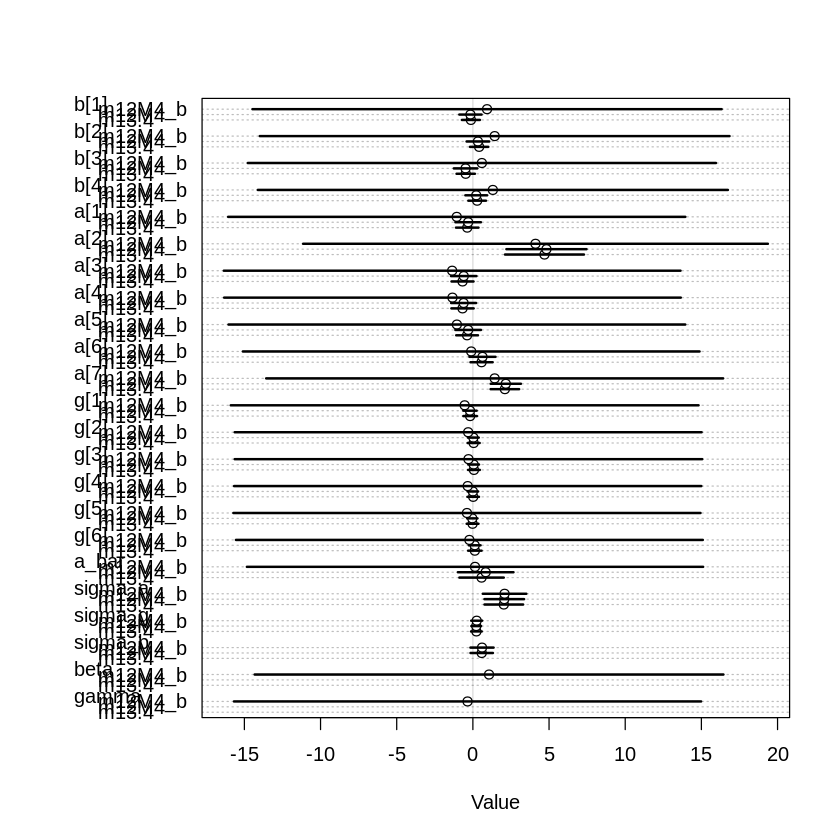

In [108]:
plot(coeftab(m13.4, m12M4, m12M4_b))

With this formulation, the coefficients all look very similar for m12M4 and m13.4, but of course, the m12M4_b has massive uncertainty and some variation.  This is down to the addition of the hyper-parameters beta and gamma, which also have very flat priors.

Note that there were a large number of divergent transitions and even more that exceeded maximum treedepth (whatever that is).  I will try again increasing max_treedepth and adapt_delta

In [111]:
m12M4_b <- ulam(
            alist(
                pulled_left ~ dbinom( 1 , p ) ,
                logit(p) <- a[actor] + g[block_id] + b[treatment] ,
                b[treatment] ~ dnorm( beta , sigma_b ),
                # adaptive priors
                a[actor] ~ dnorm( a_bar , sigma_a ),
                g[block_id] ~ dnorm( gamma , sigma_g ),
                # hyper-priors
                c(a_bar, gamma, beta) ~ dnorm( 0 , 10 ),
#                 a_bar ~ dnorm( 0 , 10 ),
                c(sigma_a, sigma_g, sigma_b) ~ dexp(1)
#                 sigma_g ~ dexp(1),
#                 sigma_b ~ dexp(1)
            ) , data=dat_list , chains=4 , cores=4 , log_lik=TRUE
            , control=list(adapt_delta=0.99, max_treedepth=15)
        )

recompiling to avoid crashing R session
Warning message:
“There were 34 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“There were 15 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 15. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

In [117]:
precis(m12M4_b, depth=2)

mean        sd        5.5%         94.5%      n_eff    Rhat    
b[1]     0.30031366 7.8480990 -12.31595725 13.6257813 299.1097 1.011135
b[2]     0.79972292 7.8502030 -11.85575676 14.1821674 299.2134 1.011063
b[3]    -0.01843344 7.8518669 -12.73841832 13.3684672 298.9040 1.011046
b[4]     0.69331440 7.8521527 -11.80567173 14.0901840 297.8916 1.010982
a[1]    -1.21641622 7.4495936 -12.74901616 11.4296222 335.6081 1.009731
a[2]     3.84348878 7.5364640  -7.97900645 16.3308308 339.0893 1.009857
a[3]    -1.50929646 7.4618380 -13.12980165 11.1079961 333.9278 1.009767
a[4]    -1.52365365 7.4639964 -13.03000435 11.1694464 333.9824 1.009797
a[5]    -1.20785471 7.4599853 -12.80813685 11.4863177 333.8094 1.009733
a[6]    -0.27049367 7.4576715 -11.79151097 12.3779226 334.1480 1.009672
a[7]     1.25729925 7.4625768 -10.33253232 13.7753693 336.7872 1.009604
g[1]     0.26104975 7.6668638 -11.60911149 12.5666980 342.5926 1.003725
g[2]     0.47832588 7.6726347 -11.35192080 12.8752618 343.0442 1.003876
g[3]     0.48173775 7.6715570 -11.39713789 12.8902172 342.4745 1.003954
g[4]     0.43553356 7.6725997 -11.35129526 12.8923614 343.6259 1.003827
g[5]     0.39863966 7.6794844 -11.50387679 12.9063008 342.6130 1.003858
g[6]     0.54954015 7.6793709 -11.26090043 12.9823850 342.9290 1.003928
beta     0.44357664 7.8401322 -12.21754789 13.8278124 299.8517 1.010951
gamma    0.43437362 7.6704715 -11.40300934 12.8106044 342.6538 1.003898
a_bar   -0.09880515 7.4523600 -12.13135583 12.6507674 340.3213 1.009853
sigma_b  0.58585199 0.3803636   0.18624607  1.2249936 711.0728 1.001774
sigma_g  0.21383771 0.1606138   0.03995028  0.5187818 244.1748 1.012687
sigma_a  2.07593653 0.7108491   1.21522001  3.4581728 654.1756 1.003710

In [113]:
compare(m12M4, m13.4, m12M4_b)

WAIC     pWAIC    dWAIC     weight    SE       dSE      
m13.4   532.5026 10.91416 0.0000000 0.4033246 19.43068        NA
m12M4   533.0307 11.02999 0.5280196 0.3097395 19.26369 0.5223226
m12M4_b 533.1836 11.01270 0.6809656 0.2869359 19.29371 0.4778179

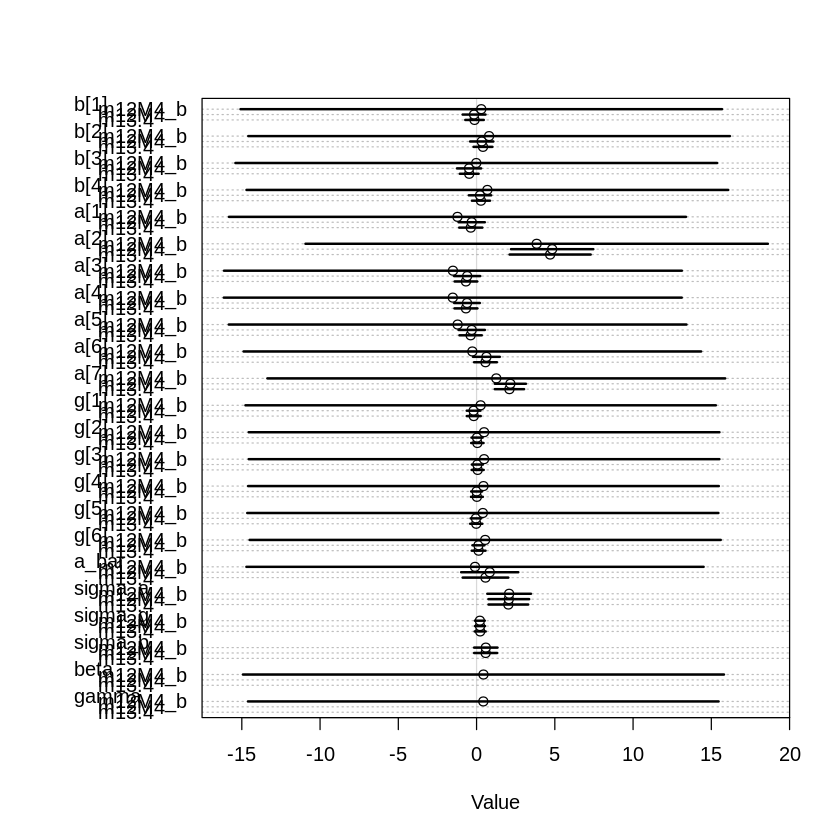

In [115]:
plot(coeftab(m13.4, m12M4, m12M4_b))

Same results when adjusting control parameters of ulam.

In [118]:
m12M4_c <- ulam(
            alist(
                pulled_left ~ dbinom( 1 , p ) ,
                logit(p) <- a[actor] + g[block_id] + b[treatment] ,
                b[treatment] ~ dnorm( beta , sigma_b ),
                # adaptive priors
                a[actor] ~ dnorm( a_bar , sigma_a ),
                g[block_id] ~ dnorm( gamma , sigma_g ),
                # hyper-priors
                c(a_bar, gamma, beta) ~ dnorm( 0 , 10 ),
#                 a_bar ~ dnorm( 0 , 10 ),
                c(sigma_a, sigma_g, sigma_b) ~ dexp(1)
#                 sigma_g ~ dexp(1),
#                 sigma_b ~ dexp(1)
            ) , data=dat_list , chains=4 , cores=4 , log_lik=TRUE
#             , control=list(adapt_delta=0.99, max_treedepth=15)
        )

recompiling to avoid crashing R session
Warning message:
“There were 124 divergent transitions after warmup. Increasing adapt_delta above 0.95 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“There were 607 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

In [120]:
precis(m12M4_c, depth=2)

mean       sd        5.5%         94.5%      n_eff     Rhat    
b[1]    -1.0055629 7.8573245 -14.42988188 11.1441607 182.37430 1.013968
b[2]    -0.5060885 7.8537286 -13.92702898 11.5574676 182.92370 1.014119
b[3]    -1.3439754 7.8582089 -14.75269291 10.6553721 183.25637 1.013640
b[4]    -0.6182676 7.8493412 -14.02854291 11.3465577 182.95334 1.014075
a[1]    -0.7569587 7.8469197 -13.59133773 12.1615118 120.13890 1.032187
a[2]     4.4249240 7.9424193  -8.32919151 17.4485965 126.64417 1.032322
a[3]    -1.0678577 7.8567041 -13.89928833 11.7392157 120.47229 1.032424
a[4]    -1.0703942 7.8590332 -13.73347372 11.7786192 120.37601 1.032298
a[5]    -0.7692641 7.8572446 -13.49516290 11.9492482 120.02871 1.032299
a[6]     0.1800982 7.8520647 -12.62810624 13.0214839 120.16512 1.032422
a[7]     1.7044634 7.8612958 -10.93997293 14.5143699 120.75489 1.032058
g[1]     1.1122892 8.0375041 -11.66109240 13.8610320  63.52181 1.063188
g[2]     1.3461624 8.0401094 -11.47759068 14.0878153  66.98370 1.062125
g[3]     1.3527476 8.0429459 -11.44347380 14.0453035  66.15799 1.061941
g[4]     1.3101054 8.0442311 -11.52450171 14.0729637  65.69222 1.062129
g[5]     1.2634943 8.0395022 -11.47696282 14.0021245  64.22643 1.062549
g[6]     1.4158114 8.0457565 -11.34742066 14.2108634  67.65123 1.061839
beta    -0.8733315 7.8593475 -14.20732054 11.1955585 182.61444 1.013825
gamma    1.2966664 8.0376654 -11.50421334 14.0097846  65.46267 1.062263
a_bar    0.3751822 7.8275188 -12.50357641 13.0959166 121.32866 1.032893
sigma_b  0.6222510 0.3807000   0.21130486  1.3480714 580.56885 1.013677
sigma_g  0.2366525 0.1773987   0.06105001  0.5314807 343.96643 1.005383
sigma_a  2.1013775 0.7262366   1.21592194  3.3801572 330.57639 1.005900

If we hadn't adjusted the control parameters, the n_eff would have been very low and Rhat substantially greater than 1.

12H1

Note that this question is Question 2 of Homework for Week 8, so the author's solutions are available.

In [4]:
data(bangladesh)
d <- bangladesh
head(d)

woman district use.contraception living.children age.centered urban
1 1     1        0                 4                18.4400     1    
2 2     1        0                 1                -5.5599     1    
3 3     1        0                 3                 1.4400     1    
4 4     1        0                 4                 8.4400     1    
5 5     1        0                 1               -13.5590     1    
6 6     1        0                 1               -11.5600     1

In [6]:
sort(unique(d$district))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 55 56 57 58 59 60 61

Missing district 54, so create new contiguous variable district_id:

In [8]:
d$district_id <- as.integer(as.factor(d$district))
sort(unique(d$district_id))

head(d)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60

woman district use.contraception living.children age.centered urban
1 1     1        0                 4                18.4400     1    
2 2     1        0                 1                -5.5599     1    
3 3     1        0                 3                 1.4400     1    
4 4     1        0                 4                 8.4400     1    
5 5     1        0                 1               -13.5590     1    
6 6     1        0                 1               -11.5600     1    
  district_id
1 1          
2 1          
3 1          
4 1          
5 1          
6 1

In [9]:
dat = list(C=d$use.contraception, D=d$district_id)

In [21]:
m12H1.fixed <- ulam(
                    alist(
                        C ~ dbinom(1, p),
                        logit(p) <- a[D],
                        a[D] ~ dnorm(0, 1.5)                       
                    ), data=dat, chains=4, cores=4, log_lik=TRUE
                )

In [22]:
m12H1.varying <- ulam(
                    alist(
                        C ~ dbinom(1, p),
                        logit(p) <- a[D],
                        a[D] ~ dnorm(a_bar, sigma),
                        a_bar ~ dnorm(0, 1),
                        sigma ~ dexp(1)
                    ), data=dat, chains=4, cores=4, log_lik=TRUE
                )

In [23]:
compare(m12H1.fixed, m12H1.varying)

WAIC     pWAIC    dWAIC   weight     SE       dSE     
m12H1.varying 2514.645 35.98498 0.00000 0.98388859 25.03742       NA
m12H1.fixed   2522.869 53.42088 8.22397 0.01611141 28.88752 7.592758

In [24]:
compare(m12H1.fixed, m12H1.varying, func=LOO)

LOO      pLOO     dLOO     weight     SE       dSE     
m12H1.varying 2514.902 36.11334 0.000000 0.98645327 25.04810       NA
m12H1.fixed   2523.478 53.72522 8.575941 0.01354673 28.90948 7.602636

So the varying effects model is a little bit better than the fixed one.

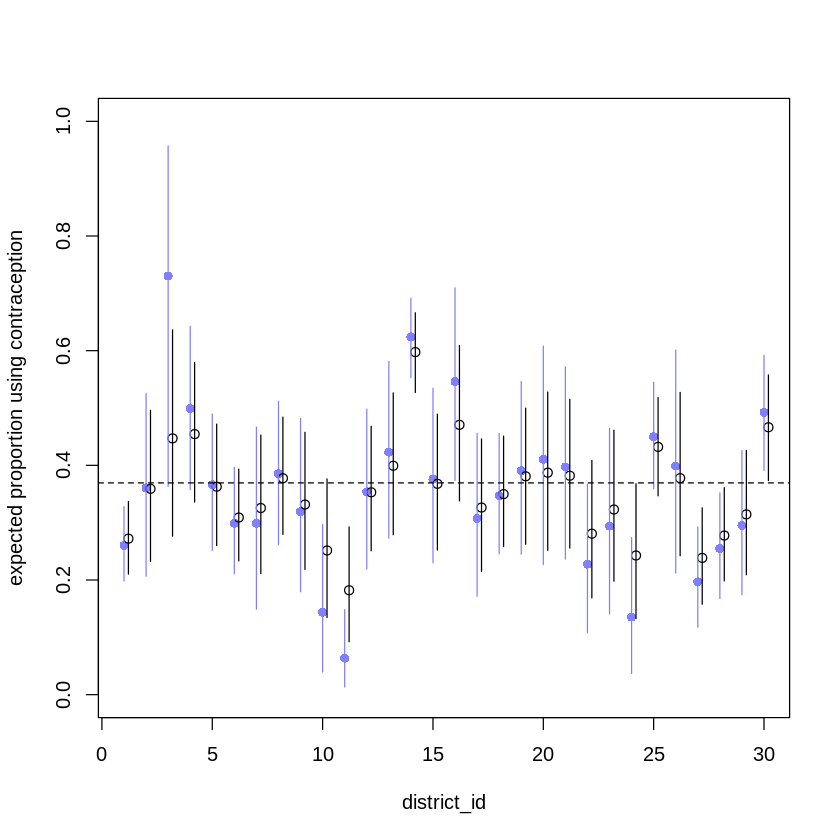

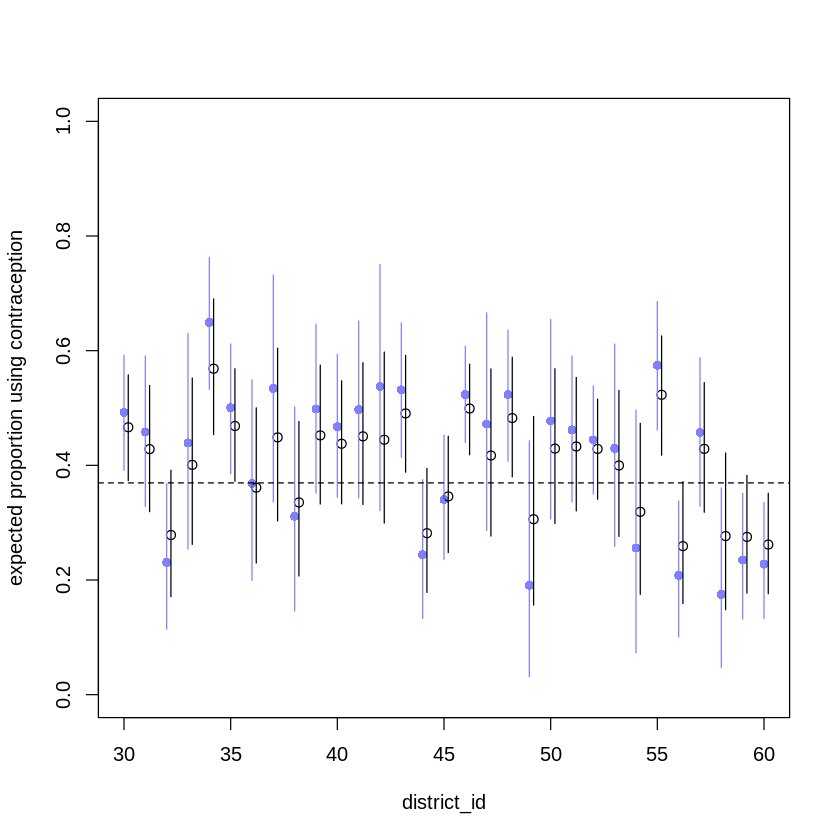

In [103]:
# post.f <- extract.samples(m12H1.fixed)
post.v <- extract.samples(m12H1.varying)

# D.seq <- 1:(max(d$district_id)/2)
D.seq <- 1:max(d$district_id)

# d_pred <- list( actor=rep(1:7,each=4) , treatment=rep(1:4,times=7), block_id = rep(1,28) )
d_pred <- list( D=D.seq )

p.f <- link( m12H1.fixed , data=d_pred )
p <- p.f
p.f_mu <- apply( p , 2 , mean )
p.f_ci <- apply( p , 2 , PI )

p.v <- link( m12H1.varying , data=d_pred )
p <- p.v
p.v_mu <- apply( p , 2 , mean )
p.v_ci <- apply( p , 2 , PI )


limit = max(d$district_id)/2
offset = 0.2
plot( D.seq[1:limit], p.f_mu[1:limit], ylim=c(0,1), #xlim=c(1,5.1) , 
     xlab="district_id" , ylab="expected proportion using contraception" ,
    pch=16 , col=rangi2 )
# mtext( concat( "N = ",N ) )
points( D.seq[1:limit]+offset , p.v_mu[1:limit] )
for ( i in D.seq[1:limit] ) {
    lines( c(i,i) , p.f_ci[,i] , col=rangi2 )
    lines( c(i,i)+offset , p.v_ci[,i] )
}
abline( h=mean(inv_logit(post.v$a_bar)) , lty=2 )


limit = max(d$district_id)/2
lim2 = max(d$district_id)
offset = 0.2
plot( D.seq[limit:lim2], p.f_mu[limit:lim2], ylim=c(0,1), #xlim=c(1,5.1) , 
     xlab="district_id" , ylab="expected proportion using contraception" ,
    pch=16 , col=rangi2 )
# mtext( concat( "N = ",N ) )
points( D.seq[limit:lim2]+offset , p.v_mu[limit:lim2] )
for ( i in D.seq[limit:lim2] ) {
    lines( c(i,i) , p.f_ci[,i] , col=rangi2 )
    lines( c(i,i)+offset , p.v_ci[,i] )
}
abline( h=mean(inv_logit(post.v$a_bar)) , lty=2 )

The fixed effects model is in blue.  Clearly, it is more prone to extreme values of probability compared to the varying effects model in black.  

The most glaring difference between the models occurs for district_id = 3 (which is also district = 3 in the data).  This case has an especially large credible interval, which may suggest that the sample of women taken from district 3 is quite small compared to other districts.  We should check this out, as it may support the likelihood of more extreme values (the joint-probability of a smaller number of people using contraception is higher than the joint-probability of a larger number of people).  And of course, more extreme cases are better regularized by the varying effects model, hence the big disparity in the results for district 3.  Compare district 3 to district 14, where the proportion using contraception is predicted to be higher by both models, while the credible interval of both models is much smaller.  This suggests that there is more data for district 14.

In [90]:
length(which(d$district==3))

[1] 2

In [96]:
d[which(d$district_id==3),]

woman district use.contraception living.children age.centered urban
138 138   3        1                 4               -3.5599      1    
139 139   3        1                 1               -8.5599      1    
    district_id
138 3          
139 3

In [97]:
length(which(d$district_id==14))

[1] 118

This supports the idea that the big difference in results for district 3 comes from its very small sample size.  Also, because there is 100% use of contraception amongst the 2 women, the fixed effect model is very prone to overfit to this extreme value.

Probably the next big difference is for district 49.  Let's check out the size of this district too:

In [98]:
length(which(d$district_id==49))

[1] 4

In [102]:
d[which(d$district_id==49),]

woman district use.contraception living.children age.centered urban
1600 1600  49       0                 1               -12.5590     0    
1601 1601  49       0                 1                -9.5599     0    
1602 1602  49       0                 1               -10.5590     0    
1603 1603  49       0                 4                 2.4400     0    
     district_id
1600 49         
1601 49         
1602 49         
1603 49

This is also very small (and with extreme values of 0 use of contraception).  Compare it to a similar valued district_id = 54, where the difference is smaller:

In [99]:
length(which(d$district_id==54))

[1] 6

In [101]:
d[which(d$district_id==54),]

woman district use.contraception living.children age.centered urban
1740 1740  55       0                 4                6.4400      1    
1741 1741  55       1                 1               -1.5599      1    
1742 1742  55       0                 4                4.4400      1    
1743 1743  55       0                 2                2.4400      1    
1744 1744  55       0                 3               13.4400      1    
1745 1745  55       0                 2                6.4400      1    
     district_id
1740 54         
1741 54         
1742 54         
1743 54         
1744 54         
1745 54

Interestingly, it's not a much smaller sample, but it has certainly reduced the difference in the models' predictions.  It probably helps that one of the people used contraception so that the fixed effect model didn't overfit to the 0 proportion of use, like it did in district_id = 49 case.

In [104]:
table(d$district_id)


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
117  20   2  30  39  65  18  37  23  13  21  29  24 118  22  20  24  47  26  15 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
 18  20  15  14  67  13  44  49  32  61  33  24  14  35  48  17  13  14  26  41 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
 26  11  45  27  39  86  15  42   4  19  37  61  19   6  45  27  33  10  32  42 

12H2

In [108]:
data(Trolley)
d <- Trolley
head(d)

case  response order id     age male edu           action intention contact
1 cfaqu 4         2    96;434 14  0    Middle School 0      0         1      
2 cfbur 3        31    96;434 14  0    Middle School 0      0         1      
3 cfrub 4        16    96;434 14  0    Middle School 0      0         1      
4 cibox 3        32    96;434 14  0    Middle School 0      1         1      
5 cibur 3         4    96;434 14  0    Middle School 0      1         1      
6 cispe 3         9    96;434 14  0    Middle School 0      1         1      
  story action2
1 aqu   1      
2 bur   1      
3 rub   1      
4 box   1      
5 bur   1      
6 spe   1

In [137]:
d$idx <- as.integer(as.factor(d$id))
# d$idx <- coerce_index( d$id )        # McElreath does it this way

dat <- list( R=d$response, A=d$action, I=d$intention, C=d$contact, idx=d$idx )

In [122]:
m12H2.fixed <- ulam(
            alist(
                R ~ dordlogit( phi , cutpoints ),
                phi <- bA*A + bC*C + BI*I ,
                BI <- bI + bIA*A + bIC*C ,
                c(bA,bI,bC,bIA,bIC) ~ dnorm( 0 , 0.5 ),
                cutpoints ~ dnorm( 0 , 1.5 )
            ) , data=dat , chains=4 , cores=4 , log_lik=TRUE )

precis( m12H2.fixed )

recompiling to avoid crashing R session
6 vector or matrix parameters hidden. Use depth=2 to show them.


mean       sd         5.5%       94.5%      n_eff     Rhat     
bIC -1.2364297 0.09572248 -1.3859208 -1.0824606 1104.0233 0.9989176
bIA -0.4343195 0.07759993 -0.5574689 -0.3128833  954.5991 0.9994504
bC  -0.3425666 0.06648310 -0.4500224 -0.2354692 1053.9309 1.0011920
bI  -0.2917278 0.05613372 -0.3797291 -0.2016627  866.9605 0.9995925
bA  -0.4727060 0.05399059 -0.5577695 -0.3867614  920.1551 0.9999502

In [124]:
m12H2.varying <- ulam(
                    alist(
                        R ~ dordlogit( phi , cutpoints ),
                        phi <- a[idx] + bA*A + bC*C + BI*I ,
                        BI <- bI + bIA*A + bIC*C ,
                        c(bA,bI,bC,bIA,bIC) ~ dnorm( 0 , 0.5 ),
                        cutpoints ~ dnorm( 0 , 1.5 ),
                        a[idx] ~ dnorm( a_bar, sigma ) ,
                        a_bar ~ dnorm( 0, 1.5 ) ,
                        sigma ~ dexp(1)
                    ) , data=dat , chains=4 , cores=4 , log_lik=TRUE )

precis( m12H2.varying )

337 vector or matrix parameters hidden. Use depth=2 to show them.


mean       sd         5.5%        94.5%      n_eff       Rhat    
bIC   -1.6605096 0.10135629 -1.82204862 -1.4997565  896.375845 1.002269
bIA   -0.5515431 0.07845340 -0.67797899 -0.4273416  912.800398 1.003688
bC    -0.4586871 0.06950424 -0.57282272 -0.3508111  900.148966 1.004274
bI    -0.3913404 0.05879685 -0.48477307 -0.2973707  833.078537 1.006135
bA    -0.6536765 0.05453687 -0.74013101 -0.5645717  836.325705 1.004727
a_bar  0.7515559 0.50578345 -0.04937809  1.5460635    3.075119 2.328440
sigma  1.9162428 0.08332448  1.78982691  2.0531539 1358.642764 1.000269

In [135]:
coeftab(m12H2.fixed, m12H2.varying)

             m12H2.fixed m12H2.varying
bIC            -1.24       -1.66      
bIA            -0.43       -0.55      
bC             -0.34       -0.46      
bI             -0.29       -0.39      
bA             -0.47       -0.65      
cutpoints[1]   -2.63       -2.98      
cutpoints[2]   -1.94       -2.03      
cutpoints[3]   -1.34       -1.23      
cutpoints[4]   -0.31        0.27      
cutpoints[5]    0.36        1.32      
cutpoints[6]    1.27        2.73      
a[1]              NA        0.17      
a[2]              NA       -1.02      
a[3]              NA       -2.22      
a[4]              NA        0.37      
a[5]              NA       -2.73      
a[6]              NA        1.35      
a[7]              NA        0.28      
a[8]              NA        4.62      
a[9]              NA       -0.13      
a[10]             NA        1.51      
a[11]             NA        1.32      
a[12]             NA        3.14      
a[13]             NA        0.29      
a[14]             NA     

From McElreath's Homework 8 solutions: 
"Everything [the beta coefficients] has gotten more negative. This is because there is a lot of individual
variation in average rating—look at the distribution for sigma . That is on the logit
scale, so that’s a lot of variation on the probability scale. That variation in average
rating was hiding some of the effect of the treatments. We get more precision by
conditioning on individual."

The beta coefficients on the psychological factors (bC, bI, bA and also bIC, bIA) are pretty similar in both models, though as McElreath notes, the varying model has slighly more negative beta coefficients.  In effect, the magnitude of the treatment effects (I, C, A) have increased after conditioning on individuality, suggesting that the treatment effects are stronger than we would naively think if we didn't take account of the individual variation (i.e. the individual achoring around different responses).

The cutpoints are, however shifted a fair amount, with more extreme end values, meaning lower prob of responses 1 and 7.  Cutpoint 4 has turned positive and cutpoint 5 is higher, with more probability mass in 4 and 5 (and also 6, by inspection).

The average person 'a_bar' has an intercept of 0.75, and sigma of almost 2, so on average 95% of individuals' varying intercepts lie within -3.25 and 4.75.  Given the effects of the psychological factors have a magnitude of around 0.5 (but larger for the interaction bIC ~ -1.7), this demonstrates that individual variation plays a large role in the determination of the reponses.

In [125]:
compare(m12H2.fixed, m12H2.varying, func=LOO)

LOO      pLOO      dLOO     weight SE        dSE    
m12H2.varying 31057.04 355.79787    0.000 1      179.45394      NA
m12H2.fixed   36928.93  10.82093 5871.885 0       80.75712 173.608

In [126]:
compare(m12H2.fixed, m12H2.varying)

WAIC     pWAIC     dWAIC   weight SE        dSE    
m12H2.varying 31054.74 354.64568    0.00 1      179.42405      NA
m12H2.fixed   36928.88  10.79608 5874.14 0       80.75285 173.588

From McElreath's Homework 8 solutions: "The WAIC difference is massive. This is consistent with individual variation in average rating being a major effect in this sample.
This is all quite typical of likert-scale data, in my experience. Individuals anchor
on different points and this adds noise. When we have repeat samples from the same
individual, we can condition away some of that noise and get more precise estimates
of the treatment effects."

The LOO and WAIC scores strongly support the m12H2.varying model as a better predictor of responses, with a dWAIC of almost 6000, and a dSE of only 174.  The effective parameters pWAIC of the varying model are much larger than the fixed version though, as expected, because we have added over 330 more parameters to the model.

The fact that the varying model is so much better at predicting the responses than the fixed model also demonstrates that individual variation plays a big role in the response data.

12H3

In [141]:
d$s <- as.integer(as.factor(d$story))

datS <- list( R=d$response, A=d$action, I=d$intention, C=d$contact, idx=d$idx, s=d$s )


m12H2.cross <- ulam(
                    alist(
                        R ~ dordlogit( phi , cutpoints ),
                        phi <- a[idx] + g[s] + bA*A + bC*C + BI*I ,
                        BI <- bI + bIA*A + bIC*C ,
                        c(bA,bI,bC,bIA,bIC) ~ dnorm( 0 , 0.5 ),
                        cutpoints ~ dnorm( 0 , 1.5 ),
                        a[idx] ~ dnorm( a_bar, sigma ) ,
                        a_bar ~ dnorm( 0, 1.5 ) ,
                        sigma ~ dexp(1) ,
                        g[s] ~ dnorm( 0, sigma_g) ,
                        sigma_g ~ dexp(1)
                    ) , data=datS , chains=4 , cores=4 , log_lik=TRUE )

precis( m12H2.cross )

349 vector or matrix parameters hidden. Use depth=2 to show them.


mean       sd         5.5%       94.5%      n_eff       Rhat    
bIC     -1.2813761 0.11209841 -1.4617794 -1.1037849 1387.430088 1.000205
bIA     -0.5222574 0.08466989 -0.6609233 -0.3860276 1355.466650 1.000078
bC      -1.0842340 0.09569780 -1.2368444 -0.9312136 1157.575880 1.002349
bI      -0.4647339 0.06895841 -0.5753603 -0.3556508 1336.345543 1.000525
bA      -0.8973183 0.06801485 -1.0055908 -0.7857146 1246.687771 1.002014
a_bar    0.6652060 0.72264264 -0.4466099  1.9962194    2.473252 3.386846
sigma    1.9705473 0.08181950  1.8431936  2.1039468 1718.594105 1.005547
sigma_g  0.5448926 0.14088762  0.3646619  0.8031816 1052.575352 1.000922

In [142]:
coeftab(m12H2.fixed, m12H2.varying, m12H2.cross)

             m12H2.fixed m12H2.varying m12H2.cross
bIC            -1.24       -1.66         -1.28    
bIA            -0.43       -0.55         -0.52    
bC             -0.34       -0.46         -1.08    
bI             -0.29       -0.39         -0.46    
bA             -0.47       -0.65         -0.90    
cutpoints[1]   -2.63       -2.98         -3.34    
cutpoints[2]   -1.94       -2.03         -2.36    
cutpoints[3]   -1.34       -1.23         -1.53    
cutpoints[4]   -0.31        0.27          0.02    
cutpoints[5]    0.36        1.32          1.10    
cutpoints[6]    1.27        2.73          2.55    
a[1]              NA        0.17          0.07    
a[2]              NA       -1.02         -1.06    
a[3]              NA       -2.22         -2.39    
a[4]              NA        0.37          0.27    
a[5]              NA       -2.73         -2.90    
a[6]              NA        1.35          1.33    
a[7]              NA        0.28          0.24    
a[8]              NA        4.6

Now the magnitude of the betas increase even further when conditioning on story (except for bIC).  This suggests that the story also creates some variation in the response.

The sd of a_bar has increased slighly, making it cover zero and negative values more.

In [143]:
compare(m12H2.fixed, m12H2.varying, m12H2.cross, func=LOO)

Warning message:
“Some Pareto k diagnostic values are slightly high. See help('pareto-k-diagnostic') for details.
”

LOO      pLOO      dLOO      weight        SE        dSE      
m12H2.cross   30566.15 366.10914    0.0000  1.000000e+00 180.48964        NA
m12H2.varying 31057.04 355.79787  490.8956 2.531445e-107 179.45394  42.66487
m12H2.fixed   36928.93  10.82093 6362.7808  0.000000e+00  80.75712 175.43710

In [144]:
compare(m12H2.fixed, m12H2.varying, m12H2.cross)

WAIC     pWAIC     dWAIC     weight        SE        dSE      
m12H2.cross   30563.62 364.84615    0.0000  1.000000e+00 180.45780        NA
m12H2.varying 31054.74 354.64568  491.1172 2.265928e-107 179.42405  42.66149
m12H2.fixed   36928.88  10.79608 6365.2571  0.000000e+00  80.75285 175.41524

The cross varying effects model is significantly better than the basic varying effects model, demonstrating that conditioning for story, the model is better at prediction.

The effective parameters has also increased.